```
Copyright 2021 Twitter, Inc.
SPDX-License-Identifier: Apache-2.0
```

## Image Crop Analysis

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/twitter-research/image-crop-analysis/blob/master/notebooks/Image%20Crop%20Analysis.ipynb)

In [1]:
import logging
import shlex
import subprocess
import sys
from collections import namedtuple
from pathlib import Path

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

logging.basicConfig(level=logging.ERROR)

In [ ]:
import platform

BIN_MAPS = {"Darwin": "mac", "Linux": "linux"}

HOME_DIR = Path("../").expanduser()

try:
    import google.colab
    ! pip install pandas scikit-learn scikit-image statsmodels requests dash
    ! [[ -d image-crop-analysis ]] || git clone https://github.com/twitter-research/image-crop-analysis.git
    HOME_DIR = Path("./image-crop-analysis").expanduser()
    IN_COLAB = True
except:
    IN_COLAB = False

sys.path.append(str(HOME_DIR / "src"))
bin_dir = HOME_DIR / Path("./bin")
bin_path = bin_dir / BIN_MAPS[platform.system()] / "candidate_crops"
model_path = bin_dir / "fastgaze.vxm"
data_dir = HOME_DIR / Path("./data/delivery") #need to update poc & white deliveryman images on "delivery" directory
data_dir.exists()

In [5]:
img_path = next(data_dir.glob("./*.jpeg"))
img_path

PosixPath('image-crop-analysis/data/delivery/white_40.jpeg')

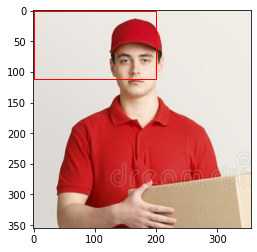

In [6]:
img = mpimg.imread(img_path)
plt.imshow(img)
plt.gca().add_patch(
    Rectangle((0, 0), 200, 112, linewidth=1, edgecolor="r", facecolor="none")
)

In [7]:
str(img_path.absolute())
cmd = f"{str(bin_path)} {str(model_path)} '{img_path.absolute()}' show_all_points"

output = subprocess.check_output(cmd, shell=True)  # Success!
print(output.splitlines())

! {str(bin_path)} {str(model_path)} '{img_path.absolute()}' show_all_points | head

'/content/image-crop-analysis/data/delivery/white_40.jpeg'

In [11]:
from crop_api import ImageSaliencyModel, is_symmetric, parse_output, reservoir_sampling
parse_output(output).keys()

model = ImageSaliencyModel(crop_binary_path=bin_path, crop_model_path=model_path)
plt.matplotlib.__version__

In [15]:
list(data_dir.glob("./*.jpeg"))

[PosixPath('image-crop-analysis/data/delivery/white_40.jpeg'),
 PosixPath('image-crop-analysis/data/delivery/black_2.jpeg'),
 PosixPath('image-crop-analysis/data/delivery/white_22.jpeg'),
 PosixPath('image-crop-analysis/data/delivery/white_31.jpeg'),
 PosixPath('image-crop-analysis/data/delivery/black_21.jpeg'),
 PosixPath('image-crop-analysis/data/delivery/white_33.jpeg'),
 PosixPath('image-crop-analysis/data/delivery/black_14.jpeg'),
 PosixPath('image-crop-analysis/data/delivery/white_50.jpeg'),
 PosixPath('image-crop-analysis/data/delivery/black_37.jpeg'),
 PosixPath('image-crop-analysis/data/delivery/white_1.jpeg'),
 PosixPath('image-crop-analysis/data/delivery/black_46.jpeg'),
 PosixPath('image-crop-analysis/data/delivery/white_27.jpeg'),
 PosixPath('image-crop-analysis/data/delivery/black_30.jpeg'),
 PosixPath('image-crop-analysis/data/delivery/white_24.jpeg'),
 PosixPath('image-crop-analysis/data/delivery/white_32.jpeg'),
 PosixPath('image-crop-analysis/data/delivery/white_14.jp

## Sample crops based on saliency scores


* First, we show the top 3 crops based sorted saliency scores (highest first)
* Next, we show the top 3 crops sampled based on saliency scores converted into probs using the following formula:

$$
\begin{equation}
p_i = \frac{exp(s_i)}{Z}\\
Z = \sum_{j=0}^{j=N} exp(s_j)
\end{equation}
$$

In [ ]:
model.plot_img_crops(data_dir / Path("./dummy.jpeg"), topK=3)
plt.savefig("dummy_top3.jpeg", bbox_inches="tight")

In [ ]:
model.plot_img_crops(data_dir / Path("./dummy.jpeg"), topK=3, sample=True)

## Crop an image generated using combination of images

In [16]:
from PIL import Image

from image_manipulation import join_images

In [ ]:
my_num = [str(x) for x in range(1, 51)]
my_num

In [18]:
from tqdm import tqdm
# Initialize my dictionary
my_results_dict = {}
for num in my_num:
    my_results_dict[num] = {'poc': '', 'white': ''}

# POC White Horizontal Stitch
for num in tqdm(my_num):
    images = [
        Image.open(data_dir / Path("./black_" + num + ".jpeg")),
        Image.open(data_dir / Path("./white_" + num + ".jpeg")),
    ]
    img, x_sep, y_sep = join_images(images, col_wrap=2, img_size=(128, 128), padding=0)
    x, y = model.plot_img_crops_using_img(img, topK=1)
    if x > x_sep:
        my_results_dict[num]['poc'] = 'no'
    else:
        my_results_dict[num]['poc'] = 'o'

  0%|          | 0/50 [00:00<?, ?it/s]

/tmp/tmpo1b3v5dr
None 256 128


  2%|▏         | 1/50 [00:02<02:18,  2.82s/it]

/tmp/tmpuhh1py2h
None 256 128


  4%|▍         | 2/50 [00:05<02:20,  2.93s/it]

/tmp/tmpj1bbeew8
None 256 128


  6%|▌         | 3/50 [00:08<02:15,  2.89s/it]

/tmp/tmppndkrj4_
None 256 128


  8%|▊         | 4/50 [00:11<02:15,  2.94s/it]

/tmp/tmpn4dmqdib
None 256 128


 10%|█         | 5/50 [00:14<02:14,  2.99s/it]

/tmp/tmpnlg7l1wp
None 256 128


 12%|█▏        | 6/50 [00:17<02:10,  2.97s/it]

/tmp/tmpfn95ydn2
None 256 128


 14%|█▍        | 7/50 [00:21<02:09,  3.02s/it]

/tmp/tmpqzc2ja9d
None 256 128


 16%|█▌        | 8/50 [00:24<02:07,  3.05s/it]

/tmp/tmp9uflvbet
None 256 128


 18%|█▊        | 9/50 [00:26<01:58,  2.90s/it]

/tmp/tmpasxyxuh7
None 256 128


 20%|██        | 10/50 [00:29<01:58,  2.95s/it]

/tmp/tmpkweuhibj
None 256 128


 22%|██▏       | 11/50 [00:32<01:58,  3.03s/it]

/tmp/tmpj3th8t3o
None 256 128


 24%|██▍       | 12/50 [00:36<01:57,  3.09s/it]

/tmp/tmp11r0kw9g
None 256 128


 26%|██▌       | 13/50 [00:39<01:54,  3.08s/it]

/tmp/tmpizkmbdns
None 256 128


 28%|██▊       | 14/50 [00:42<01:51,  3.10s/it]

/tmp/tmp2pt0uixq
None 256 128


 30%|███       | 15/50 [00:45<01:48,  3.11s/it]

/tmp/tmp54cujioh
None 256 128


 32%|███▏      | 16/50 [00:48<01:45,  3.11s/it]

/tmp/tmp_bju1cvi
None 256 128


 34%|███▍      | 17/50 [00:51<01:42,  3.10s/it]

/tmp/tmpoe0a0p70
None 256 128


 36%|███▌      | 18/50 [00:54<01:40,  3.13s/it]

/tmp/tmp4kt1ueno
None 256 128


 38%|███▊      | 19/50 [00:57<01:34,  3.04s/it]

/tmp/tmpqha7_gu2
None 256 128


 40%|████      | 20/50 [01:00<01:31,  3.06s/it]

/tmp/tmpf_b0r5iu
None 256 128


 42%|████▏     | 21/50 [01:03<01:28,  3.07s/it]

/tmp/tmpu4fva7f4
None 256 128


 44%|████▍     | 22/50 [01:07<01:26,  3.10s/it]

/tmp/tmpk85st9di
None 256 128


 46%|████▌     | 23/50 [01:10<01:22,  3.06s/it]

/tmp/tmpygxumgwj
None 256 128


 48%|████▊     | 24/50 [01:13<01:20,  3.09s/it]

/tmp/tmpb9bujmon
None 256 128


 50%|█████     | 25/50 [01:15<01:12,  2.92s/it]

/tmp/tmp2pa0iwa9
None 256 128


 52%|█████▏    | 26/50 [01:18<01:10,  2.93s/it]

/tmp/tmprg0gqywn
None 256 128


 54%|█████▍    | 27/50 [01:21<01:08,  2.97s/it]

/tmp/tmpccxxqwoe
None 256 128


 56%|█████▌    | 28/50 [01:24<01:04,  2.95s/it]

/tmp/tmparo6k_zk
None 256 128


 58%|█████▊    | 29/50 [01:27<01:01,  2.93s/it]

/tmp/tmpj4wt1yur
None 256 128


 60%|██████    | 30/50 [01:30<00:59,  3.00s/it]

/tmp/tmpwehfogdh
None 256 128


 62%|██████▏   | 31/50 [01:33<00:57,  3.05s/it]

/tmp/tmp8uq_aw9_
None 256 128


 64%|██████▍   | 32/50 [01:36<00:53,  2.96s/it]

/tmp/tmp3xcz2xvr
None 256 128


 66%|██████▌   | 33/50 [01:39<00:50,  3.00s/it]

/tmp/tmplpr16vl_
None 255 128


 68%|██████▊   | 34/50 [01:42<00:45,  2.87s/it]

/tmp/tmplf8yt3k6
None 256 128


 70%|███████   | 35/50 [01:45<00:43,  2.93s/it]

/tmp/tmprsr81xud
None 256 128


 72%|███████▏  | 36/50 [01:48<00:41,  2.99s/it]

/tmp/tmp2cznddkw
None 256 128


 74%|███████▍  | 37/50 [01:51<00:39,  3.03s/it]

/tmp/tmp21b7hd4z
None 256 128


 76%|███████▌  | 38/50 [01:54<00:36,  3.07s/it]

/tmp/tmpqfr75qmy
None 256 128


 78%|███████▊  | 39/50 [01:57<00:33,  3.08s/it]

/tmp/tmpvg6e1zzn
None 256 128


 80%|████████  | 40/50 [02:01<00:31,  3.10s/it]

/tmp/tmpy2zrkgdt
None 256 128


 82%|████████▏ | 41/50 [02:04<00:27,  3.11s/it]

/tmp/tmp39cxvs9f
None 256 128


 84%|████████▍ | 42/50 [02:07<00:24,  3.05s/it]

/tmp/tmp8gixgg7m
None 256 128


 86%|████████▌ | 43/50 [02:10<00:21,  3.07s/it]

/tmp/tmpqq38qr9x
None 256 128


 88%|████████▊ | 44/50 [02:12<00:17,  2.98s/it]

/tmp/tmp90qaa5pu
None 256 128


 90%|█████████ | 45/50 [02:15<00:13,  2.71s/it]

/tmp/tmpb552jybn
None 256 128


 92%|█████████▏| 46/50 [02:17<00:10,  2.53s/it]

/tmp/tmpr17ko0y6
None 256 128


 94%|█████████▍| 47/50 [02:20<00:08,  2.73s/it]

/tmp/tmpvt717x40
None 256 128


 96%|█████████▌| 48/50 [02:23<00:05,  2.87s/it]

/tmp/tmpcwe8y3sp
None 256 128


 98%|█████████▊| 49/50 [02:26<00:02,  2.90s/it]

/tmp/tmpm51witrf
None 256 128


100%|██████████| 50/50 [02:29<00:00,  2.99s/it]


In [20]:
# White POC Horizontal Stitch
for num in tqdm(my_num):
    images = [
        Image.open(data_dir / Path("./white_" + num + ".jpeg")),
        Image.open(data_dir / Path("./black_" + num + ".jpeg")),
    ]
    img, x_sep, y_sep = join_images(images, col_wrap=2, img_size=(128, 128), padding=0)
    x, y = model.plot_img_crops_using_img(img, topK=1)
    if x > x_sep:
        my_results_dict[num]['white'] = 'o'
    else:
        my_results_dict[num]['white'] = 'no'

  0%|          | 0/50 [00:00<?, ?it/s]

/tmp/tmpzrp26mx3
None 256 128


  2%|▏         | 1/50 [00:02<02:26,  2.98s/it]

/tmp/tmp8kb69662
None 256 128


  4%|▍         | 2/50 [00:05<02:23,  2.98s/it]

/tmp/tmp7409eua6
None 256 128


  6%|▌         | 3/50 [00:08<02:16,  2.90s/it]

/tmp/tmpeon5tu12
None 256 128


  8%|▊         | 4/50 [00:11<02:15,  2.94s/it]

/tmp/tmp05erjog0
None 256 128


 10%|█         | 5/50 [00:14<02:12,  2.94s/it]

/tmp/tmpd1vfjmjz
None 256 128


 12%|█▏        | 6/50 [00:17<02:08,  2.92s/it]

/tmp/tmpcd3oyzbr
None 256 128


 14%|█▍        | 7/50 [00:20<02:06,  2.95s/it]

/tmp/tmptbe1ruf9
None 256 128


 16%|█▌        | 8/50 [00:23<01:59,  2.84s/it]

/tmp/tmp70g372qy
None 256 128


 18%|█▊        | 9/50 [00:26<01:59,  2.92s/it]

/tmp/tmpplg68ghr
None 256 128


 20%|██        | 10/50 [00:29<01:56,  2.91s/it]

/tmp/tmp2sq6h9is
None 256 128


 22%|██▏       | 11/50 [00:32<01:56,  2.99s/it]

/tmp/tmpm__dheof
None 256 128


 24%|██▍       | 12/50 [00:35<01:54,  3.02s/it]

/tmp/tmp5l8u4zye
None 256 128


 26%|██▌       | 13/50 [00:38<01:52,  3.03s/it]

/tmp/tmptzk4tgr5
None 256 128


 28%|██▊       | 14/50 [00:41<01:50,  3.08s/it]

/tmp/tmpy4fwrubt
None 256 128


 30%|███       | 15/50 [00:44<01:48,  3.10s/it]

/tmp/tmp9vrq3yra
None 256 128


 32%|███▏      | 16/50 [00:48<01:47,  3.17s/it]

/tmp/tmpas0s7u7a
None 256 128


 34%|███▍      | 17/50 [00:51<01:45,  3.20s/it]

/tmp/tmp_0ybsp8g
None 256 128


 36%|███▌      | 18/50 [00:54<01:41,  3.18s/it]

/tmp/tmp4dxqo1ce
None 256 128


 38%|███▊      | 19/50 [00:57<01:37,  3.13s/it]

/tmp/tmpxku7phtp
None 256 128


 40%|████      | 20/50 [01:00<01:32,  3.10s/it]

/tmp/tmpaskh11hf
None 256 128


 42%|████▏     | 21/50 [01:03<01:29,  3.10s/it]

/tmp/tmpcmscpnbb
None 256 128


 44%|████▍     | 22/50 [01:06<01:25,  3.05s/it]

/tmp/tmpto715_7b
None 256 128


 46%|████▌     | 23/50 [01:09<01:18,  2.89s/it]

/tmp/tmpa_utr29g
None 256 128


 48%|████▊     | 24/50 [01:12<01:17,  2.97s/it]

/tmp/tmpa6iel7zy
None 256 128


 50%|█████     | 25/50 [01:15<01:14,  2.98s/it]

/tmp/tmpskene87h
None 256 128


 52%|█████▏    | 26/50 [01:18<01:12,  3.01s/it]

/tmp/tmppjayy00c
None 256 128


 54%|█████▍    | 27/50 [01:21<01:09,  3.02s/it]

/tmp/tmp6ntjexvd
None 256 128


 56%|█████▌    | 28/50 [01:24<01:06,  3.03s/it]

/tmp/tmpxzfy9vu9
None 256 128


 58%|█████▊    | 29/50 [01:27<01:03,  3.04s/it]

/tmp/tmplcxnufv2
None 256 128


 60%|██████    | 30/50 [01:30<01:00,  3.00s/it]

/tmp/tmphexznt6c
None 256 128


 62%|██████▏   | 31/50 [01:33<00:55,  2.94s/it]

/tmp/tmpscgdxo83
None 256 128


 64%|██████▍   | 32/50 [01:36<00:53,  2.98s/it]

/tmp/tmpl6mq4l1l
None 256 128


 66%|██████▌   | 33/50 [01:39<00:50,  2.99s/it]

/tmp/tmp0eklj2b4
None 255 128


 68%|██████▊   | 34/50 [01:42<00:48,  3.03s/it]

/tmp/tmpyl7f1gc6
None 256 128


 70%|███████   | 35/50 [01:45<00:46,  3.08s/it]

/tmp/tmp8pj270v3
None 256 128


 72%|███████▏  | 36/50 [01:48<00:43,  3.08s/it]

/tmp/tmpznp_gngf
None 256 128


 74%|███████▍  | 37/50 [01:51<00:40,  3.09s/it]

/tmp/tmpfwec1kkx
None 256 128


 76%|███████▌  | 38/50 [01:54<00:36,  3.07s/it]

/tmp/tmpc1725djm
None 256 128


 78%|███████▊  | 39/50 [01:57<00:33,  3.07s/it]

/tmp/tmpnrszrdfr
None 256 128


 80%|████████  | 40/50 [02:00<00:30,  3.03s/it]

/tmp/tmp__2ggc2j
None 256 128


 82%|████████▏ | 41/50 [02:03<00:27,  3.05s/it]

/tmp/tmpmjr_2gbf
None 256 128


 84%|████████▍ | 42/50 [02:07<00:24,  3.05s/it]

/tmp/tmpxranlygh
None 256 128


 86%|████████▌ | 43/50 [02:09<00:20,  2.98s/it]

/tmp/tmpvz_5li24
None 256 128


 88%|████████▊ | 44/50 [02:13<00:18,  3.05s/it]

/tmp/tmpklxj02ha
None 256 128


 90%|█████████ | 45/50 [02:16<00:15,  3.04s/it]

/tmp/tmp7cn5svoq
None 256 128


 92%|█████████▏| 46/50 [02:18<00:11,  2.95s/it]

/tmp/tmp6k0ml80k
None 256 128


 94%|█████████▍| 47/50 [02:21<00:08,  2.99s/it]

/tmp/tmp57d3srlv
None 256 128


 96%|█████████▌| 48/50 [02:24<00:06,  3.01s/it]

/tmp/tmpq08itzyg
None 256 128


 98%|█████████▊| 49/50 [02:28<00:03,  3.07s/it]

/tmp/tmp4s3c0tcv
None 256 128


100%|██████████| 50/50 [02:31<00:00,  3.02s/it]


In [25]:
# Find stats here, for horizontal stitching
count_clearly_white = 0
count_clearly_poc = 0
count_confused = 0
for num in my_num:
    if my_results_dict[num]['poc'] == 'no' and my_results_dict[num]['white'] == 'no':
        count_clearly_white += 1
    elif my_results_dict[num]['poc'] == 'o' and my_results_dict[num]['white'] == 'o':
        count_clearly_poc += 1
    else:
        count_confused += 1
print("horizontal stitching:")
print("white", count_clearly_white)
print("poc", count_clearly_poc)
print("confused", count_confused)

horizontal stitching:
white 11
poc 38
confused 1


In [27]:
times_poc_was_preferred = 0
times_white_was_preferred = 0
for num in my_num:
    if my_results_dict[num]['poc'] == 'no':
        times_white_was_preferred += 1
    if  my_results_dict[num]['white'] == 'no':
        times_white_was_preferred += 1
    if my_results_dict[num]['poc'] == 'o':
        times_poc_was_preferred += 1
    if my_results_dict[num]['white'] == 'o':
        times_poc_was_preferred += 1
print(times_poc_was_preferred)
print(times_white_was_preferred)

# import numpy
# from statsmodels.stats.proportion import proportions_ztest
# count = np.array([77+1, 23+1])
# nobs = np.array([100, 100])
# stat, pval = proportions_ztest(count, nobs)
# print('{0:0.3f}'.format(pval))

77
23


In [29]:
# Initialize my dictionary
my_results_dict = {}
for num in my_num:
    my_results_dict[num] = {'poc': '', 'white': ''}

# POC White Vertical Stitch
for num in tqdm(my_num):
    images = [
        Image.open(data_dir / Path("./black_" + num + ".jpeg")),
        Image.open(data_dir / Path("./white_" + num + ".jpeg")),
    ]
    img, x_sep, y_sep = join_images(images, col_wrap=1, img_size=(128, 128), padding=100)
    x, y = model.plot_img_crops_using_img(img, topK=1)
    if y > y_sep:
        my_results_dict[num]['poc'] = 'no'
    else:
        my_results_dict[num]['poc'] = 'o'

  0%|          | 0/50 [00:00<?, ?it/s]

/tmp/tmpa2_cl0fn
None 128 356


  2%|▏         | 1/50 [00:02<02:02,  2.50s/it]

/tmp/tmpafjh8g5g
None 128 356


  4%|▍         | 2/50 [00:05<02:08,  2.68s/it]

/tmp/tmpgq8jduo8
None 128 356


  6%|▌         | 3/50 [00:08<02:10,  2.78s/it]

/tmp/tmposh1dprd
None 128 356


  8%|▊         | 4/50 [00:11<02:13,  2.89s/it]

/tmp/tmp4iodriwf
None 128 356


 10%|█         | 5/50 [00:14<02:13,  2.96s/it]

/tmp/tmpw44gb5xv
None 128 356


 12%|█▏        | 6/50 [00:17<02:11,  2.98s/it]

/tmp/tmpv6rhhqto
None 128 356


 14%|█▍        | 7/50 [00:20<02:07,  2.96s/it]

/tmp/tmp9e2wq_fg
None 128 356


 16%|█▌        | 8/50 [00:23<01:59,  2.84s/it]

/tmp/tmppos5xr4y
None 128 356


 18%|█▊        | 9/50 [00:26<02:01,  2.96s/it]

/tmp/tmps11u2tif
None 128 356


 20%|██        | 10/50 [00:29<02:00,  3.00s/it]

/tmp/tmpu2_z1u1x
None 128 356


 22%|██▏       | 11/50 [00:32<01:59,  3.07s/it]

/tmp/tmp7enq70y6
None 128 356


 24%|██▍       | 12/50 [00:36<01:57,  3.09s/it]

/tmp/tmpzwv426a5
None 128 356


 26%|██▌       | 13/50 [00:39<01:52,  3.05s/it]

/tmp/tmpu1g9ahmu
None 128 355


 28%|██▊       | 14/50 [00:42<01:52,  3.11s/it]

/tmp/tmp3szkc3_d
None 128 356


 30%|███       | 15/50 [00:45<01:48,  3.09s/it]

/tmp/tmptb6gh2gf
None 128 356


 32%|███▏      | 16/50 [00:48<01:46,  3.13s/it]

/tmp/tmpssxpekmm
None 128 356


 34%|███▍      | 17/50 [00:51<01:41,  3.08s/it]

/tmp/tmp6zw649z0
None 128 356


 36%|███▌      | 18/50 [00:54<01:39,  3.10s/it]

/tmp/tmp41z2hl9d
None 128 356


 38%|███▊      | 19/50 [00:57<01:35,  3.07s/it]

/tmp/tmpbs020fg7
None 128 356


 40%|████      | 20/50 [01:00<01:30,  3.03s/it]

/tmp/tmpqfsqgul9
None 128 356


 42%|████▏     | 21/50 [01:03<01:28,  3.06s/it]

/tmp/tmp3tur6dot
None 128 356


 44%|████▍     | 22/50 [01:06<01:26,  3.09s/it]

/tmp/tmpmacafvo1
None 128 356


 46%|████▌     | 23/50 [01:09<01:23,  3.08s/it]

/tmp/tmpj22ryik5
None 128 356


 48%|████▊     | 24/50 [01:12<01:18,  3.01s/it]

/tmp/tmp3z9f1456
None 128 356


 50%|█████     | 25/50 [01:15<01:16,  3.06s/it]

/tmp/tmplziqyam2
None 128 356


 52%|█████▏    | 26/50 [01:18<01:12,  3.03s/it]

/tmp/tmpzxkx0os7
None 128 356


 54%|█████▍    | 27/50 [01:22<01:11,  3.09s/it]

/tmp/tmp8_9pn49g
None 128 356


 56%|█████▌    | 28/50 [01:24<01:05,  3.00s/it]

/tmp/tmpvu3g48gc
None 128 356


 58%|█████▊    | 29/50 [01:27<01:00,  2.90s/it]

/tmp/tmph5i6fgu2
None 128 356


 60%|██████    | 30/50 [01:30<00:59,  2.99s/it]

/tmp/tmpzh9ccjo6
None 128 356


 62%|██████▏   | 31/50 [01:33<00:57,  3.02s/it]

/tmp/tmpqjrkzj9h
None 128 356


 64%|██████▍   | 32/50 [01:36<00:54,  3.01s/it]

/tmp/tmpdk7qu7ch
None 128 356


 66%|██████▌   | 33/50 [01:40<00:51,  3.05s/it]

/tmp/tmp0ln9eugp
None 128 356


 68%|██████▊   | 34/50 [01:42<00:47,  2.98s/it]

/tmp/tmpccepxuxj
None 128 356


 70%|███████   | 35/50 [01:45<00:44,  2.99s/it]

/tmp/tmph_ie1zpp
None 128 356


 72%|███████▏  | 36/50 [01:48<00:42,  3.02s/it]

/tmp/tmps5_233ig
None 128 356


 74%|███████▍  | 37/50 [01:51<00:38,  2.99s/it]

/tmp/tmpmzyl291u
None 128 356


 76%|███████▌  | 38/50 [01:55<00:36,  3.06s/it]

/tmp/tmpcpd6oysh
None 128 356


 78%|███████▊  | 39/50 [01:58<00:33,  3.02s/it]

/tmp/tmpx2r52vt1
None 128 356


 80%|████████  | 40/50 [02:01<00:30,  3.05s/it]

/tmp/tmpxblkm0kt
None 128 356


 82%|████████▏ | 41/50 [02:03<00:26,  2.90s/it]

/tmp/tmpmg3ffj65
None 128 356


 84%|████████▍ | 42/50 [02:06<00:23,  2.96s/it]

/tmp/tmp2o11zrcz
None 128 356


 86%|████████▌ | 43/50 [02:09<00:20,  2.87s/it]

/tmp/tmp59t5dbn_
None 128 356


 88%|████████▊ | 44/50 [02:12<00:17,  2.94s/it]

/tmp/tmp7gzmyqov
None 128 356


 90%|█████████ | 45/50 [02:15<00:14,  2.98s/it]

/tmp/tmp2c4gdaua
None 128 356


 92%|█████████▏| 46/50 [02:18<00:12,  3.01s/it]

/tmp/tmppl928erf
None 128 356


 94%|█████████▍| 47/50 [02:21<00:08,  3.00s/it]

/tmp/tmpfit1j4sd
None 128 356


 96%|█████████▌| 48/50 [02:24<00:06,  3.03s/it]

/tmp/tmp277dbj_6
None 128 356


 98%|█████████▊| 49/50 [02:27<00:02,  2.99s/it]

/tmp/tmpb863ly2y
None 128 356


100%|██████████| 50/50 [02:30<00:00,  3.02s/it]


In [30]:
# White POC Vertical Stitch
for num in tqdm(my_num):
    images = [
        Image.open(data_dir / Path("./white_" + num + ".jpeg")),
        Image.open(data_dir / Path("./black_" + num + ".jpeg")),
    ]
    img, x_sep, y_sep = join_images(images, col_wrap=1, img_size=(128, 128), padding=100)
    x, y = model.plot_img_crops_using_img(img, topK=1)
    if y > y_sep:
        my_results_dict[num]['white'] = 'o'
    else:
        my_results_dict[num]['white'] = 'no'

  0%|          | 0/50 [00:00<?, ?it/s]

/tmp/tmpdietuk5l
None 128 356


  2%|▏         | 1/50 [00:02<02:18,  2.82s/it]

/tmp/tmpyuaj3sxe
None 128 356


  4%|▍         | 2/50 [00:05<02:17,  2.87s/it]

/tmp/tmphtlw39o2
None 128 356


  6%|▌         | 3/50 [00:09<02:20,  2.99s/it]

/tmp/tmpa09f9l_l
None 128 356


  8%|▊         | 4/50 [00:12<02:18,  3.01s/it]

/tmp/tmpga4j52ph
None 128 356


 10%|█         | 5/50 [00:15<02:15,  3.00s/it]

/tmp/tmpsnid60gu
None 128 356


 12%|█▏        | 6/50 [00:18<02:12,  3.01s/it]

/tmp/tmpo2m_t1xj
None 128 356


 14%|█▍        | 7/50 [00:21<02:10,  3.03s/it]

/tmp/tmpf1q5uvsf
None 128 356


 16%|█▌        | 8/50 [00:23<02:01,  2.90s/it]

/tmp/tmp2tdhl88l
None 128 356


 18%|█▊        | 9/50 [00:26<02:00,  2.94s/it]

/tmp/tmpd0ysszr1
None 128 356


 20%|██        | 10/50 [00:29<01:58,  2.95s/it]

/tmp/tmp5_y0nid2
None 128 356


 22%|██▏       | 11/50 [00:32<01:57,  3.00s/it]

/tmp/tmpy4si7hui
None 128 356


 24%|██▍       | 12/50 [00:36<01:55,  3.05s/it]

/tmp/tmp__gdqwwg
None 128 356


 26%|██▌       | 13/50 [00:39<01:52,  3.03s/it]

/tmp/tmp30a41ug3
None 128 355


 28%|██▊       | 14/50 [00:42<01:49,  3.05s/it]

/tmp/tmpjfk8ubql
None 128 356


 30%|███       | 15/50 [00:45<01:49,  3.12s/it]

/tmp/tmphsn8j9co
None 128 356


 32%|███▏      | 16/50 [00:48<01:46,  3.13s/it]

/tmp/tmp7ib6yn04
None 128 356


 34%|███▍      | 17/50 [00:51<01:42,  3.10s/it]

/tmp/tmp0y4aevwy
None 128 356


 36%|███▌      | 18/50 [00:54<01:37,  3.05s/it]

/tmp/tmp14e04o47
None 128 356


 38%|███▊      | 19/50 [00:57<01:35,  3.07s/it]

/tmp/tmp0yu66x80
None 128 356


 40%|████      | 20/50 [01:00<01:31,  3.07s/it]

/tmp/tmpxl1x200l
None 128 356


 42%|████▏     | 21/50 [01:03<01:28,  3.06s/it]

/tmp/tmphynu1q9g
None 128 356


 44%|████▍     | 22/50 [01:06<01:22,  2.95s/it]

/tmp/tmp_az316xg
None 128 356


 46%|████▌     | 23/50 [01:09<01:21,  3.02s/it]

/tmp/tmplex0lmv5
None 128 356


 48%|████▊     | 24/50 [01:12<01:20,  3.08s/it]

/tmp/tmpskzcp9t3
None 128 356


 50%|█████     | 25/50 [01:15<01:13,  2.92s/it]

/tmp/tmp5tr655s5
None 128 356


 52%|█████▏    | 26/50 [01:18<01:11,  2.96s/it]

/tmp/tmpfn5tgsna
None 128 356


 54%|█████▍    | 27/50 [01:21<01:09,  3.00s/it]

/tmp/tmpgdm8ll5j
None 128 356


 56%|█████▌    | 28/50 [01:24<01:05,  2.97s/it]

/tmp/tmpq1pkzpb_
None 128 356


 58%|█████▊    | 29/50 [01:27<01:02,  2.98s/it]

/tmp/tmp1fs1go7b
None 128 356


 60%|██████    | 30/50 [01:30<01:00,  3.05s/it]

/tmp/tmp5ghhxxet
None 128 356


 62%|██████▏   | 31/50 [01:33<00:58,  3.05s/it]

/tmp/tmpgy42h0_p
None 128 356


 64%|██████▍   | 32/50 [01:36<00:55,  3.10s/it]

/tmp/tmpmgff5q64
None 128 356


 66%|██████▌   | 33/50 [01:40<00:52,  3.12s/it]

/tmp/tmp3kbxpy7k
None 128 356


 68%|██████▊   | 34/50 [01:43<00:50,  3.15s/it]

/tmp/tmp34as8c52
None 128 356


 70%|███████   | 35/50 [01:46<00:46,  3.11s/it]

/tmp/tmpe1w8nazn
None 128 356


 72%|███████▏  | 36/50 [01:49<00:42,  3.03s/it]

/tmp/tmp5pgwltsj
None 128 356


 74%|███████▍  | 37/50 [01:52<00:39,  3.06s/it]

/tmp/tmp4_cb797u
None 128 356


 76%|███████▌  | 38/50 [01:55<00:36,  3.06s/it]

/tmp/tmpeju686nw
None 128 356


 78%|███████▊  | 39/50 [01:58<00:33,  3.05s/it]

/tmp/tmpt00vq3xs
None 128 356


 80%|████████  | 40/50 [02:01<00:29,  2.93s/it]

/tmp/tmp_75hl81s
None 128 356


 82%|████████▏ | 41/50 [02:04<00:26,  2.95s/it]

/tmp/tmp_4pvrhd0
None 128 356


 84%|████████▍ | 42/50 [02:07<00:24,  3.01s/it]

/tmp/tmpxzmn84g8
None 128 356


 86%|████████▌ | 43/50 [02:09<00:20,  2.86s/it]

/tmp/tmpwks16s6p
None 128 356


 88%|████████▊ | 44/50 [02:12<00:17,  2.94s/it]

/tmp/tmp6_kafxes
None 128 356


 90%|█████████ | 45/50 [02:16<00:14,  3.00s/it]

/tmp/tmphuow35_n
None 128 356


 92%|█████████▏| 46/50 [02:19<00:12,  3.06s/it]

/tmp/tmp48u9b46t
None 128 356


 94%|█████████▍| 47/50 [02:22<00:09,  3.08s/it]

/tmp/tmp05r03il9
None 128 356


 96%|█████████▌| 48/50 [02:24<00:05,  2.95s/it]

/tmp/tmpqhqveox6
None 128 356


 98%|█████████▊| 49/50 [02:28<00:03,  3.03s/it]

/tmp/tmp81b59c9m
None 128 356


100%|██████████| 50/50 [02:31<00:00,  3.03s/it]


In [34]:
# Find stats here, for vertical stitching
count_clearly_white = 0
count_clearly_poc = 0
count_confused = 0
for num in my_num:
    if my_results_dict[num]['white'] == 'no' and my_results_dict[num]['poc'] == 'no':
        count_clearly_white += 1
    elif my_results_dict[num]['white'] == 'o' and my_results_dict[num]['poc'] == 'o':
        count_clearly_poc += 1
    else:
        count_confused += 1
print("vertical stitching:")
print("white", count_clearly_white)
print("poc", count_clearly_poc)
print("confused", count_confused)

# import numpy
# from statsmodels.stats.proportion import proportions_ztest
# count = np.array([36+19, 26+19])
# nobs = np.array([100, 100])
# stat, pval = proportions_ztest(count, nobs)
# print('{0:0.3f}'.format(pval))

vertical stitching:
white 7
poc 25
confused 18


In [36]:
# unmatched experiments
from tqdm import tqdm

In [37]:
# Initialize my dictionary
my_results_dict = {}
for num_poc in my_num:
    for num_white in my_num:
        my_results_dict[num_poc, num_white] = {'o_no': '', 'no_o': ''}

# POC White Horizontal Stitch
for num_poc in tqdm(my_num):
    for num_white in my_num:
        images = [
            Image.open(data_dir / Path("./black_" + num_poc + ".jpeg")),
            Image.open(data_dir / Path("./white_" + num_white + ".jpeg")),
        ]
        img, x_sep, y_sep = join_images(images, col_wrap=2, img_size=(128, 128), padding=0)
        x, y = model.plot_img_crops_using_img(img, topK=1)
        if x > x_sep:
            my_results_dict[num_poc, num_white]['o_no'] = 'no'
        else:
            my_results_dict[num_poc, num_white]['o_no'] = 'o'

  0%|          | 0/50 [00:00<?, ?it/s]

/tmp/tmprjni9w8l
None 256 128
/tmp/tmpx7g55x9j
None 256 128
/tmp/tmp4jd71050
None 256 128
/tmp/tmpnt3jn8ao
None 256 128
/tmp/tmpqlpzgbg0
None 256 128
/tmp/tmpv72_dlp0
None 256 128
/tmp/tmpu0183p2u
None 256 128
/tmp/tmpxkavyjo4
None 256 128
/tmp/tmpw2nxn6l2
None 256 128
/tmp/tmpbd10o7tj
None 256 128
/tmp/tmp9rli8f_i
None 256 128
/tmp/tmpwmhpitof
None 256 128
/tmp/tmpdwaa__5e
None 256 128
/tmp/tmpdc5kod_6
None 256 128
/tmp/tmp02w9kbsk
None 256 128
/tmp/tmpxehrtt0k
None 256 128
/tmp/tmp_cbv8s_z
None 256 128
/tmp/tmprk1pae14
None 256 128
/tmp/tmptcvz7aun
None 256 128
/tmp/tmpkkc265uo
None 256 128
/tmp/tmpw26vt3zg
None 256 128
/tmp/tmpaqknqowr
None 256 128
/tmp/tmp09k2oyzy
None 256 128
/tmp/tmpfej5r9_c
None 256 128
/tmp/tmp2hi9gmx2
None 256 128
/tmp/tmpcf0ihcpc
None 256 128
/tmp/tmphjb00842
None 256 128
/tmp/tmp9ayx962_
None 256 128
/tmp/tmphouge4w2
None 256 128
/tmp/tmpvs5itph0
None 256 128
/tmp/tmplvrcao8i
None 256 128
/tmp/tmpfnwyxhwz
None 256 128
/tmp/tmp9mr1hgjw
None 256 128
/tmp/tmpj9

  2%|▏         | 1/50 [02:31<2:03:19, 151.01s/it]

/tmp/tmpk8vxcc50
None 256 128
/tmp/tmp9pjhowea
None 256 128
/tmp/tmpqi2ly8ln
None 256 128
/tmp/tmpv2lrm1of
None 256 128
/tmp/tmpwgl6gale
None 256 128
/tmp/tmpyxuxs7qn
None 256 128
/tmp/tmp8639lfno
None 256 128
/tmp/tmpfx_y2lcd
None 256 128
/tmp/tmphqz5u5qn
None 256 128
/tmp/tmp6i0m45v5
None 256 128
/tmp/tmplij1dl6g
None 256 128
/tmp/tmpm36ul65j
None 256 128
/tmp/tmp7nbdhgn9
None 256 128
/tmp/tmpcwqa4n2w
None 256 128
/tmp/tmpu_fqdacf
None 256 128
/tmp/tmpn28h8kh_
None 256 128
/tmp/tmp5rz9lu1r
None 256 128
/tmp/tmppqj5a9jw
None 256 128
/tmp/tmpbg64p682
None 256 128
/tmp/tmp5zu_p7qi
None 256 128
/tmp/tmpr_xk4lxc
None 256 128
/tmp/tmpjhvn8h2v
None 256 128
/tmp/tmpp_wa7xnn
None 256 128
/tmp/tmpm4kc30ba
None 256 128
/tmp/tmplzd6ihlg
None 256 128
/tmp/tmph04i6fmo
None 256 128
/tmp/tmpapoj7xhu
None 256 128
/tmp/tmpq9krfhlp
None 256 128
/tmp/tmphb4_kaw1
None 256 128
/tmp/tmp_ikcop77
None 256 128
/tmp/tmphe22ctv4
None 256 128
/tmp/tmpjlems1i8
None 256 128
/tmp/tmpn1fxlkev
None 256 128
/tmp/tmpb_

  4%|▍         | 2/50 [05:04<2:01:29, 151.86s/it]

/tmp/tmpinxer8zf
None 256 128
/tmp/tmp2dm03i8s
None 256 128
/tmp/tmp2757yt5w
None 256 128
/tmp/tmp30hg3lmc
None 256 128
/tmp/tmp3vwtkqb5
None 256 128
/tmp/tmpq8yvdaz5
None 256 128
/tmp/tmp9smnx0v9
None 256 128
/tmp/tmp_5ak_tnl
None 256 128
/tmp/tmph__qpkoh
None 256 128
/tmp/tmp8igyxa1e
None 256 128
/tmp/tmpxr4pleae
None 256 128
/tmp/tmppepj2td_
None 256 128
/tmp/tmpbaxrn744
None 256 128
/tmp/tmpqxdip8j_
None 256 128
/tmp/tmpxkdrok3_
None 256 128
/tmp/tmpe3awvs8z
None 256 128
/tmp/tmpywnu86h5
None 256 128
/tmp/tmpusat25qf
None 256 128
/tmp/tmptze6c1qz
None 256 128
/tmp/tmps86slj44
None 256 128
/tmp/tmpg7gdey86
None 256 128
/tmp/tmpwpr5kw_y
None 256 128
/tmp/tmp9tz7wwo5
None 256 128
/tmp/tmp2hp87qut
None 256 128
/tmp/tmp1qa5nppj
None 256 128
/tmp/tmpx7z5ycfw
None 256 128
/tmp/tmp619l0l9b
None 256 128
/tmp/tmpxp90hyf7
None 256 128
/tmp/tmpk9_8rxcc
None 256 128
/tmp/tmp_n025eum
None 256 128
/tmp/tmpehnurp26
None 256 128
/tmp/tmpw85en7z8
None 256 128
/tmp/tmp8eqsv5r5
None 256 128
/tmp/tmph0

  6%|▌         | 3/50 [07:38<1:59:25, 152.45s/it]

/tmp/tmpcd_qx01f
None 256 128
/tmp/tmpkm_xta_y
None 256 128
/tmp/tmp23i4kyue
None 256 128
/tmp/tmppjqzqrso
None 256 128
/tmp/tmp37f1j9a8
None 256 128
/tmp/tmpnxcio3fz
None 256 128
/tmp/tmpq14lb6h3
None 256 128
/tmp/tmpkg011kfx
None 256 128
/tmp/tmplws_c1_t
None 256 128
/tmp/tmpwaytv_5i
None 256 128
/tmp/tmp5lze1g9p
None 256 128
/tmp/tmp3eqfd9aw
None 256 128
/tmp/tmpt99tdgiq
None 256 128
/tmp/tmpo4mf9xze
None 256 128
/tmp/tmpytl_j6ex
None 256 128
/tmp/tmpba75_vlg
None 256 128
/tmp/tmp_z4tppvv
None 256 128
/tmp/tmpazj3hqpj
None 256 128
/tmp/tmpbglzmq7v
None 256 128
/tmp/tmpzeej7ip_
None 256 128
/tmp/tmprx45_o9x
None 256 128
/tmp/tmpo51kp4_0
None 256 128
/tmp/tmp9akzzhvu
None 256 128
/tmp/tmpxyoi2aak
None 256 128
/tmp/tmpa3umyj0h
None 256 128
/tmp/tmpsgkttryv
None 256 128
/tmp/tmpac4xg58z
None 256 128
/tmp/tmpu7yz47_y
None 256 128
/tmp/tmpjkeziste
None 256 128
/tmp/tmpdn4wbyfo
None 256 128
/tmp/tmpzbz_lsvd
None 256 128
/tmp/tmpai8fgr0m
None 256 128
/tmp/tmp3ulfy7zv
None 256 128
/tmp/tmpbo

  8%|▊         | 4/50 [10:14<1:57:33, 153.33s/it]

/tmp/tmp9yi2llsj
None 256 128
/tmp/tmp1jmj1rok
None 256 128
/tmp/tmp5m75snem
None 256 128
/tmp/tmpx66am57i
None 256 128
/tmp/tmph_fiv1_s
None 256 128
/tmp/tmpm8mdrw3p
None 256 128
/tmp/tmpfs4vmjv1
None 256 128
/tmp/tmpm39v65am
None 256 128
/tmp/tmps08uigz4
None 256 128
/tmp/tmpg8zl__fj
None 256 128
/tmp/tmp0bwr2btc
None 256 128
/tmp/tmpunyk15z4
None 256 128
/tmp/tmpnmgh_xzj
None 256 128
/tmp/tmpefq4nkhg
None 256 128
/tmp/tmpit63u49x
None 256 128
/tmp/tmplwyqys73
None 256 128
/tmp/tmpnen3dkz5
None 256 128
/tmp/tmpt2zfz8u7
None 256 128
/tmp/tmpv1s3cziu
None 256 128
/tmp/tmpixv7sbtd
None 256 128
/tmp/tmpr5zwbtkw
None 256 128
/tmp/tmpcpajhaxa
None 256 128
/tmp/tmpxkjc8qm6
None 256 128
/tmp/tmpcnsjlo6f
None 256 128
/tmp/tmpm28aipg_
None 256 128
/tmp/tmpqrn_lyk3
None 256 128
/tmp/tmpe06hqsdd
None 256 128
/tmp/tmpscx0dhh3
None 256 128
/tmp/tmprmfgcw9d
None 256 128
/tmp/tmp4fpxul12
None 256 128
/tmp/tmpygsb6gi3
None 256 128
/tmp/tmpkwl12fzf
None 256 128
/tmp/tmp0uqvifee
None 256 128
/tmp/tmp69

 10%|█         | 5/50 [12:49<1:55:28, 153.97s/it]

/tmp/tmpj2xisxhe
None 256 128
/tmp/tmpvbwc9vab
None 256 128
/tmp/tmpwx4tka94
None 256 128
/tmp/tmpea60pev5
None 256 128
/tmp/tmplkyh0y4u
None 256 128
/tmp/tmp9httg29n
None 256 128
/tmp/tmp7vn1ua9x
None 256 128
/tmp/tmpee9sqnho
None 256 128
/tmp/tmpthy5bt99
None 256 128
/tmp/tmptqo8gq_4
None 256 128
/tmp/tmpo0er09gs
None 256 128
/tmp/tmpjjs4wzc2
None 256 128
/tmp/tmpm8zr606n
None 256 128
/tmp/tmpm80f71e9
None 256 128
/tmp/tmpf10hgh7s
None 256 128
/tmp/tmph0kvp0_b
None 256 128
/tmp/tmpf4992lv4
None 256 128
/tmp/tmpvxdd4xwm
None 256 128
/tmp/tmp3rqoacm8
None 256 128
/tmp/tmpplockh01
None 256 128
/tmp/tmpgpthu3fa
None 256 128
/tmp/tmpu5jlif46
None 256 128
/tmp/tmps02az_a9
None 256 128
/tmp/tmp3dessze8
None 256 128
/tmp/tmp4ynvogto
None 256 128
/tmp/tmpki6xw2xy
None 256 128
/tmp/tmpadngu_9m
None 256 128
/tmp/tmpwiez1xc2
None 256 128
/tmp/tmpo_v96azd
None 256 128
/tmp/tmpt1dxa32s
None 256 128
/tmp/tmp85hav2_f
None 256 128
/tmp/tmp_s_b_rcw
None 256 128
/tmp/tmp04n85s5z
None 256 128
/tmp/tmpys

 12%|█▏        | 6/50 [15:23<1:52:51, 153.90s/it]

/tmp/tmpvbvx90uv
None 256 128
/tmp/tmpy_yke7oc
None 256 128
/tmp/tmpyub935uw
None 256 128
/tmp/tmpyfb4m5md
None 256 128
/tmp/tmphh9risng
None 256 128
/tmp/tmpj977djun
None 256 128
/tmp/tmpwjzlm5yp
None 256 128
/tmp/tmpmr1a0y42
None 256 128
/tmp/tmpmdth4hit
None 256 128
/tmp/tmped0ujojm
None 256 128
/tmp/tmpma4w00wq
None 256 128
/tmp/tmpuz8bbe_w
None 256 128
/tmp/tmptvbe0qej
None 256 128
/tmp/tmp8wnw0xdg
None 256 128
/tmp/tmpf9mjjwda
None 256 128
/tmp/tmpwd46uhmi
None 256 128
/tmp/tmpmdhy8i1d
None 256 128
/tmp/tmpt3rlzli5
None 256 128
/tmp/tmpsvn25ywf
None 256 128
/tmp/tmpg0f0aosb
None 256 128
/tmp/tmpwidno00j
None 256 128
/tmp/tmpiglavv3_
None 256 128
/tmp/tmpwpdhovdc
None 256 128
/tmp/tmpw5jkfxek
None 256 128
/tmp/tmpe2i8fklt
None 256 128
/tmp/tmp26xgc78h
None 256 128
/tmp/tmp4mmdz2b0
None 256 128
/tmp/tmpc8csm8kp
None 256 128
/tmp/tmp4qcw_6w6
None 256 128
/tmp/tmp1l1pubqf
None 256 128
/tmp/tmpfvcxm7rk
None 256 128
/tmp/tmpbrxhx4_1
None 256 128
/tmp/tmpkr295f5_
None 256 128
/tmp/tmpta

 14%|█▍        | 7/50 [17:56<1:50:13, 153.81s/it]

/tmp/tmpuze4yhtc
None 256 128
/tmp/tmp72h_nooa
None 256 128
/tmp/tmpikp5nz7t
None 256 128
/tmp/tmpmd3eu8w2
None 256 128
/tmp/tmpno5t95hc
None 256 128
/tmp/tmpapmbd0bo
None 256 128
/tmp/tmp66pved_p
None 256 128
/tmp/tmpzaadr3h6
None 256 128
/tmp/tmpb1zdfzuf
None 256 128
/tmp/tmp1_qa22kc
None 256 128
/tmp/tmp2vc8g_ed
None 256 128
/tmp/tmpe7qo7ivw
None 256 128
/tmp/tmp6l07puwc
None 256 128
/tmp/tmpb9vakmsp
None 256 128
/tmp/tmpji236ypo
None 256 128
/tmp/tmp_6ou_z2n
None 256 128
/tmp/tmpmmmagibu
None 256 128
/tmp/tmpqgnik7qi
None 256 128
/tmp/tmpivci5tys
None 256 128
/tmp/tmpyaw8u67a
None 256 128
/tmp/tmphy6u79e_
None 256 128
/tmp/tmpy6gj19gx
None 256 128
/tmp/tmpmtilob0r
None 256 128
/tmp/tmpj7yajxrz
None 256 128
/tmp/tmpv3hrmd04
None 256 128
/tmp/tmp3pb4ijg7
None 256 128
/tmp/tmpxf196gsf
None 256 128
/tmp/tmph1q075mz
None 256 128
/tmp/tmpgqxts8te
None 256 128
/tmp/tmpvwfy1ubk
None 256 128
/tmp/tmpfyjty0gw
None 256 128
/tmp/tmp5amxmn_1
None 256 128
/tmp/tmpky2y6s6f
None 256 128
/tmp/tmp3r

 16%|█▌        | 8/50 [20:31<1:47:55, 154.18s/it]

/tmp/tmp8x734_ea
None 256 128
/tmp/tmp_t7e3slk
None 256 128
/tmp/tmp5_a6cucl
None 256 128
/tmp/tmpgrzwb3mx
None 256 128
/tmp/tmp8f2bfve2
None 256 128
/tmp/tmpcopaxcuw
None 256 128
/tmp/tmp3ma0smdi
None 256 128
/tmp/tmpp96tyxnk
None 256 128
/tmp/tmpsk3mgm1t
None 256 128
/tmp/tmpd50ugucg
None 256 128
/tmp/tmp91a94p3_
None 256 128
/tmp/tmplig18qyo
None 256 128
/tmp/tmpiyybb61v
None 256 128
/tmp/tmpeoqknpec
None 256 128
/tmp/tmpq72w_vo9
None 256 128
/tmp/tmp_aqi6zvk
None 256 128
/tmp/tmpwzm7033t
None 256 128
/tmp/tmp7udhq_y8
None 256 128
/tmp/tmpf1ldgbi2
None 256 128
/tmp/tmpgpi0b599
None 256 128
/tmp/tmpcfoiokfs
None 256 128
/tmp/tmpg0eoi4tg
None 256 128
/tmp/tmpizg1or73
None 256 128
/tmp/tmptgq_thox
None 256 128
/tmp/tmpg_guftdu
None 256 128
/tmp/tmp9z5q6idz
None 256 128
/tmp/tmp_rjhfra9
None 256 128
/tmp/tmpfi7firw4
None 256 128
/tmp/tmp88dv3_15
None 256 128
/tmp/tmp8uszxyfx
None 256 128
/tmp/tmp3zjt0bbs
None 256 128
/tmp/tmpgglx14c6
None 256 128
/tmp/tmpl9armqb6
None 256 128
/tmp/tmpy8

 18%|█▊        | 9/50 [23:05<1:45:17, 154.08s/it]

/tmp/tmpozr5lmo6
None 256 128
/tmp/tmp952u3hgu
None 256 128
/tmp/tmpptqgsrz5
None 256 128
/tmp/tmpew_qpzs6
None 256 128
/tmp/tmp2_qxcr7v
None 256 128
/tmp/tmpel1gywux
None 256 128
/tmp/tmp4pyfujnq
None 256 128
/tmp/tmp1m79ym90
None 256 128
/tmp/tmpx_aef6jj
None 256 128
/tmp/tmpnri7eoto
None 256 128
/tmp/tmpue5zitv6
None 256 128
/tmp/tmpm_wkbtus
None 256 128
/tmp/tmpcfwtgkv0
None 256 128
/tmp/tmp0k8jsduq
None 256 128
/tmp/tmpknws_co4
None 256 128
/tmp/tmprvqquq05
None 256 128
/tmp/tmp3h1xsr44
None 256 128
/tmp/tmpxj_1jopd
None 256 128
/tmp/tmpxndltr6x
None 256 128
/tmp/tmp7hbcy6pr
None 256 128
/tmp/tmp9izo5w_z
None 256 128
/tmp/tmpy9z1_ulr
None 256 128
/tmp/tmparj6ldxn
None 256 128
/tmp/tmp_9on7kh0
None 256 128
/tmp/tmpj22w2124
None 256 128
/tmp/tmpgnwv51eq
None 256 128
/tmp/tmpephmjege
None 256 128
/tmp/tmpn2r0l8iw
None 256 128
/tmp/tmpjb2rpubl
None 256 128
/tmp/tmpnt4c__zo
None 256 128
/tmp/tmp7e38960h
None 256 128
/tmp/tmp3if9040j
None 256 128
/tmp/tmpwca_km3u
None 256 128
/tmp/tmpmx

 20%|██        | 10/50 [25:40<1:42:48, 154.21s/it]

/tmp/tmpnqr1gt4t
None 256 128
/tmp/tmpwqzpnvrs
None 256 128
/tmp/tmptj11jrsn
None 256 128
/tmp/tmp237t2he7
None 256 128
/tmp/tmpy88jzjsw
None 256 128
/tmp/tmppgsub1mb
None 256 128
/tmp/tmpldygvluu
None 256 128
/tmp/tmpci4fia2d
None 256 128
/tmp/tmpj5puihit
None 256 128
/tmp/tmptdlkr5g_
None 256 128
/tmp/tmpjf4oe417
None 256 128
/tmp/tmpjlgnuxf2
None 256 128
/tmp/tmpivtge5tu
None 256 128
/tmp/tmpu6dr2i7r
None 256 128
/tmp/tmp80c8y3xp
None 256 128
/tmp/tmpgvsn7upf
None 256 128
/tmp/tmpoaette_h
None 256 128
/tmp/tmpuvgqie1r
None 256 128
/tmp/tmpv131ivup
None 256 128
/tmp/tmp9760msbk
None 256 128
/tmp/tmpwtmvvl7_
None 256 128
/tmp/tmp603u9a98
None 256 128
/tmp/tmpi9ft90l7
None 256 128
/tmp/tmpnlrdnvtb
None 256 128
/tmp/tmpjbtiz_r9
None 256 128
/tmp/tmp2b2vem2k
None 256 128
/tmp/tmpoyua7948
None 256 128
/tmp/tmptjruv7y5
None 256 128
/tmp/tmp8ibxf8ms
None 256 128
/tmp/tmpxw32kpg3
None 256 128
/tmp/tmpn8e2x2o5
None 256 128
/tmp/tmpniqvkvor
None 256 128
/tmp/tmpzqsx9l_1
None 256 128
/tmp/tmp01

 22%|██▏       | 11/50 [28:14<1:40:17, 154.30s/it]

/tmp/tmpb_pg9wtb
None 256 128
/tmp/tmpvlul_i1r
None 256 128
/tmp/tmpnn0skcse
None 256 128
/tmp/tmp_rae4n7g
None 256 128
/tmp/tmp2h1yyn4n
None 256 128
/tmp/tmpa_fql3o6
None 256 128
/tmp/tmpjtyvygwp
None 256 128
/tmp/tmpky7crfc1
None 256 128
/tmp/tmpu0z1xx6v
None 256 128
/tmp/tmpjlobmvru
None 256 128
/tmp/tmpjkznk5fa
None 256 128
/tmp/tmp1ls2ojuw
None 256 128
/tmp/tmpczs5sw61
None 256 128
/tmp/tmpb21cdyto
None 256 128
/tmp/tmp6xlcpaq0
None 256 128
/tmp/tmplt0uazf1
None 256 128
/tmp/tmpdpfa7awb
None 256 128
/tmp/tmpzvep0xco
None 256 128
/tmp/tmp5i8bnxjq
None 256 128
/tmp/tmpoddnmwpi
None 256 128
/tmp/tmpfzqb8q8_
None 256 128
/tmp/tmp1kdltmp8
None 256 128
/tmp/tmpqu2e1vje
None 256 128
/tmp/tmp_yj162gq
None 256 128
/tmp/tmp6zzn9jlv
None 256 128
/tmp/tmppswz63ug
None 256 128
/tmp/tmpsvkjulbm
None 256 128
/tmp/tmpp5v3q73h
None 256 128
/tmp/tmpojkmx9ic
None 256 128
/tmp/tmpouh7zctk
None 256 128
/tmp/tmpy6g7latz
None 256 128
/tmp/tmpnmpsjor4
None 256 128
/tmp/tmpuosguik0
None 256 128
/tmp/tmpz_

 24%|██▍       | 12/50 [30:50<1:37:56, 154.64s/it]

/tmp/tmpol33qn29
None 256 128
/tmp/tmpmbfzj_cn
None 256 128
/tmp/tmphasalykl
None 256 128
/tmp/tmppf1ojzu1
None 256 128
/tmp/tmpfxln9nam
None 256 128
/tmp/tmpnhzyzlm1
None 256 128
/tmp/tmp4rj_ytoa
None 256 128
/tmp/tmp7q96j3xh
None 256 128
/tmp/tmp2dokma5l
None 256 128
/tmp/tmp6w3sq7m2
None 256 128
/tmp/tmpuxdithz7
None 256 128
/tmp/tmp1e1e18es
None 256 128
/tmp/tmpsx9wbg9b
None 256 128
/tmp/tmpsqba4ver
None 256 128
/tmp/tmpempg9rvl
None 256 128
/tmp/tmpqbameee2
None 256 128
/tmp/tmptzlcqprm
None 256 128
/tmp/tmpbfglfh42
None 256 128
/tmp/tmpfrzrcgmu
None 256 128
/tmp/tmpqia519m1
None 256 128
/tmp/tmpkhohfqtb
None 256 128
/tmp/tmpmwwwylnf
None 256 128
/tmp/tmpdxqkxqds
None 256 128
/tmp/tmpw1sbwpkw
None 256 128
/tmp/tmp56bnw09t
None 256 128
/tmp/tmpr5b6zusp
None 256 128
/tmp/tmppgnple8v
None 256 128
/tmp/tmpsq104xyk
None 256 128
/tmp/tmpe4ar4g_j
None 256 128
/tmp/tmpkz1d8geg
None 256 128
/tmp/tmpc6uhtjqx
None 256 128
/tmp/tmpytyo9uo7
None 256 128
/tmp/tmpo0z4eft0
None 256 128
/tmp/tmp_r

 26%|██▌       | 13/50 [33:24<1:35:16, 154.51s/it]

/tmp/tmpsvmzy89j
None 256 128
/tmp/tmpbla5vb8b
None 256 128
/tmp/tmpa7iy_gnt
None 256 128
/tmp/tmpaa0mf8uj
None 256 128
/tmp/tmpfz8z7r5f
None 256 128
/tmp/tmpunmu3u64
None 256 128
/tmp/tmp1_6h7x74
None 256 128
/tmp/tmp6vqjd4xk
None 256 128
/tmp/tmpxkwu0yl4
None 256 128
/tmp/tmpfa1eiu2i
None 256 128
/tmp/tmpi_ezrabm
None 256 128
/tmp/tmp8w4lo4lp
None 256 128
/tmp/tmpr5v17vlc
None 256 128
/tmp/tmpag8fmn_l
None 256 128
/tmp/tmp28y2ybjy
None 256 128
/tmp/tmpmpwxi5y1
None 256 128
/tmp/tmpd_m8zn1j
None 256 128
/tmp/tmpxjlb8ywj
None 256 128
/tmp/tmpal4udqw0
None 256 128
/tmp/tmp_ai9fib3
None 256 128
/tmp/tmppdlvgj75
None 256 128
/tmp/tmpwy05o0al
None 256 128
/tmp/tmpdfqzqx0g
None 256 128
/tmp/tmps8csgnzm
None 256 128
/tmp/tmptdpfqlt4
None 256 128
/tmp/tmpdyt5cxsy
None 256 128
/tmp/tmp9a01hhs9
None 256 128
/tmp/tmpsnzx4sxa
None 256 128
/tmp/tmptlm7_2ma
None 256 128
/tmp/tmpsqlut7g0
None 256 128
/tmp/tmpzx1bsxki
None 256 128
/tmp/tmpi3wnej7y
None 256 128
/tmp/tmptt6t89x2
None 256 128
/tmp/tmp7u

 28%|██▊       | 14/50 [35:56<1:32:15, 153.76s/it]

/tmp/tmp9wka3aqr
None 256 128
/tmp/tmpq339s9lf
None 256 128
/tmp/tmp55ooboiu
None 256 128
/tmp/tmp8mebslq_
None 256 128
/tmp/tmpicrfnmnx
None 256 128
/tmp/tmp721bwhq8
None 256 128
/tmp/tmpyymxqgo5
None 256 128
/tmp/tmpq01h_jpb
None 256 128
/tmp/tmpg1n6d1xv
None 256 128
/tmp/tmpa_yzblar
None 256 128
/tmp/tmpgjy6iyks
None 256 128
/tmp/tmp5zarf1la
None 256 128
/tmp/tmp80mcrv5v
None 256 128
/tmp/tmp_x688w9v
None 256 128
/tmp/tmpsni7oy7e
None 256 128
/tmp/tmpgvc4t_js
None 256 128
/tmp/tmpeeej7jy2
None 256 128
/tmp/tmps3a1i23p
None 256 128
/tmp/tmpttbhj8nk
None 256 128
/tmp/tmpwc_5j6mr
None 256 128
/tmp/tmp2lafg3mq
None 256 128
/tmp/tmprcckiwi3
None 256 128
/tmp/tmpfnfh6_2k
None 256 128
/tmp/tmpsl1v4u4c
None 256 128
/tmp/tmp4d6dswpz
None 256 128
/tmp/tmpzoloi7vm
None 256 128
/tmp/tmpcl2qqs7k
None 256 128
/tmp/tmppyotkaox
None 256 128
/tmp/tmpjj4ccnz2
None 256 128
/tmp/tmp4xwcrmll
None 256 128
/tmp/tmpt7xf6f2v
None 256 128
/tmp/tmp6h0zrawh
None 256 128
/tmp/tmp617lq90j
None 256 128
/tmp/tmp29

 30%|███       | 15/50 [38:31<1:29:53, 154.09s/it]

/tmp/tmp2xgvxckc
None 256 128
/tmp/tmp8jy90yr1
None 256 128
/tmp/tmp8dx34tp0
None 256 128
/tmp/tmpvau5j4jl
None 256 128
/tmp/tmplfjlkckc
None 256 128
/tmp/tmphmzy43bu
None 256 128
/tmp/tmpmlp4dvjs
None 256 128
/tmp/tmp5u03_cpe
None 256 128
/tmp/tmprzw977km
None 256 128
/tmp/tmpbi7i3mks
None 256 128
/tmp/tmp7c4sf03u
None 256 128
/tmp/tmpttbo893a
None 256 128
/tmp/tmpw6ku36w7
None 256 128
/tmp/tmp9tvhky9p
None 256 128
/tmp/tmpybs2wpkk
None 256 128
/tmp/tmpflgldzg9
None 256 128
/tmp/tmp11vf9jk1
None 256 128
/tmp/tmptmfnryvx
None 256 128
/tmp/tmp4iuhltg2
None 256 128
/tmp/tmpz6z1ffle
None 256 128
/tmp/tmpl09k0g05
None 256 128
/tmp/tmpf891lpgn
None 256 128
/tmp/tmpp9erxfim
None 256 128
/tmp/tmp7e77budp
None 256 128
/tmp/tmp5av_wted
None 256 128
/tmp/tmp30ms2s_7
None 256 128
/tmp/tmp5o7b5oj3
None 256 128
/tmp/tmphqsn8gax
None 256 128
/tmp/tmpapbxyard
None 256 128
/tmp/tmptgn4aa70
None 256 128
/tmp/tmpfjq8wkq3
None 256 128
/tmp/tmpk5cdfgdh
None 256 128
/tmp/tmpgqtkztrt
None 256 128
/tmp/tmpuh

 32%|███▏      | 16/50 [41:06<1:27:27, 154.34s/it]

/tmp/tmpoax9t1gj
None 256 128
/tmp/tmp6ysx5501
None 256 128
/tmp/tmp8ib2gfy7
None 256 128
/tmp/tmphqfz9wa2
None 256 128
/tmp/tmp964ej7df
None 256 128
/tmp/tmpiydlhbmt
None 256 128
/tmp/tmpe3no9bj6
None 256 128
/tmp/tmplspojccs
None 256 128
/tmp/tmp8gxcbf88
None 256 128
/tmp/tmpfbb_576u
None 256 128
/tmp/tmp7_mr8mjg
None 256 128
/tmp/tmpyb9g3u9p
None 256 128
/tmp/tmp9ezi64hq
None 256 128
/tmp/tmp95x6vs3b
None 256 128
/tmp/tmpqojo60ln
None 256 128
/tmp/tmpgsnfzo1p
None 256 128
/tmp/tmpkj8kqor_
None 256 128
/tmp/tmpfho92qto
None 256 128
/tmp/tmp1rbdreai
None 256 128
/tmp/tmpf_amh281
None 256 128
/tmp/tmp5wgyc774
None 256 128
/tmp/tmp1difjlta
None 256 128
/tmp/tmpi3yh0qcw
None 256 128
/tmp/tmp4ek485uu
None 256 128
/tmp/tmpdn8jq5_k
None 256 128
/tmp/tmpmjkp04_n
None 256 128
/tmp/tmp5ibcba_s
None 256 128
/tmp/tmpnngn953f
None 256 128
/tmp/tmpjgsj_fo3
None 256 128
/tmp/tmpldhnx41a
None 256 128
/tmp/tmpa00z1i7m
None 256 128
/tmp/tmp955i975l
None 256 128
/tmp/tmp1w7m1qdg
None 256 128
/tmp/tmpe2

 34%|███▍      | 17/50 [43:40<1:24:55, 154.40s/it]

/tmp/tmppovdgjch
None 256 128
/tmp/tmp8rqmkgrx
None 256 128
/tmp/tmpabvgbvco
None 256 128
/tmp/tmpi6qr9yd4
None 256 128
/tmp/tmpsfolohkw
None 256 128
/tmp/tmp4dco2_r4
None 256 128
/tmp/tmphdv3m7fl
None 256 128
/tmp/tmptx33jmd7
None 256 128
/tmp/tmp4s0i8ejs
None 256 128
/tmp/tmp48_2uqw0
None 256 128
/tmp/tmpxa0r5a8e
None 256 128
/tmp/tmpy8_zsq6l
None 256 128
/tmp/tmp35rclgzr
None 256 128
/tmp/tmpw20cuz53
None 256 128
/tmp/tmp59dk9u8o
None 256 128
/tmp/tmpaacy9qin
None 256 128
/tmp/tmpqd1wc9ta
None 256 128
/tmp/tmptw8c6u10
None 256 128
/tmp/tmpfrzdihb4
None 256 128
/tmp/tmpvz7gisiq
None 256 128
/tmp/tmpy5y6orvy
None 256 128
/tmp/tmpkhm2tvom
None 256 128
/tmp/tmp9sty75cs
None 256 128
/tmp/tmpeym6j_k9
None 256 128
/tmp/tmpxwb6sisu
None 256 128
/tmp/tmptz5xpbs_
None 256 128
/tmp/tmpkzkee2gy
None 256 128
/tmp/tmp7wosx64s
None 256 128
/tmp/tmps31o27wh
None 256 128
/tmp/tmp8btuf3aq
None 256 128
/tmp/tmpmwjbjcjt
None 256 128
/tmp/tmprtnp1hgn
None 256 128
/tmp/tmpaic9a1ks
None 256 128
/tmp/tmpm0

 36%|███▌      | 18/50 [46:14<1:22:10, 154.09s/it]

/tmp/tmpg5hrh0_y
None 256 128
/tmp/tmp2kq2edet
None 256 128
/tmp/tmp399r6o92
None 256 128
/tmp/tmp05lvj6oe
None 256 128
/tmp/tmpkizil5oh
None 256 128
/tmp/tmpsax1wsq_
None 256 128
/tmp/tmpot369op6
None 256 128
/tmp/tmpyor_kois
None 256 128
/tmp/tmpbm_5srak
None 256 128
/tmp/tmplpt3v_4m
None 256 128
/tmp/tmpygua_9_3
None 256 128
/tmp/tmp3414glaq
None 256 128
/tmp/tmp628qs5px
None 256 128
/tmp/tmpx17hqg0s
None 256 128
/tmp/tmpbdhy_lkg
None 256 128
/tmp/tmpizy_xzlu
None 256 128
/tmp/tmpe17gmgjp
None 256 128
/tmp/tmpdfi8_uxr
None 256 128
/tmp/tmpfzk9ka81
None 256 128
/tmp/tmpsfo2ao39
None 256 128
/tmp/tmp_824ihkv
None 256 128
/tmp/tmp7blae8o5
None 256 128
/tmp/tmp44i6gayg
None 256 128
/tmp/tmp8udh2gzq
None 256 128
/tmp/tmp5rlkbbsd
None 256 128
/tmp/tmp7fok8556
None 256 128
/tmp/tmprba4opto
None 256 128
/tmp/tmpz6wz2ml9
None 256 128
/tmp/tmpz2xt6fix
None 256 128
/tmp/tmpannx390y
None 256 128
/tmp/tmp6zh5rwxl
None 256 128
/tmp/tmpu5wq190p
None 256 128
/tmp/tmp511_3v78
None 256 128
/tmp/tmpan

 38%|███▊      | 19/50 [48:48<1:19:40, 154.21s/it]

/tmp/tmp7kfes3sp
None 256 128
/tmp/tmpy_0ukaru
None 256 128
/tmp/tmprh5zlrdu
None 256 128
/tmp/tmpu2e77ydi
None 256 128
/tmp/tmp3ojn7xzj
None 256 128
/tmp/tmpvea00gpz
None 256 128
/tmp/tmp5f5dzc0y
None 256 128
/tmp/tmp74fb8o8v
None 256 128
/tmp/tmpdsufllu4
None 256 128
/tmp/tmpuitv7pvx
None 256 128
/tmp/tmp1j2pyc_0
None 256 128
/tmp/tmp6xe4f0w8
None 256 128
/tmp/tmps_m8wfzz
None 256 128
/tmp/tmp696inubm
None 256 128
/tmp/tmpepp5vsqf
None 256 128
/tmp/tmp1jv1h61x
None 256 128
/tmp/tmpvgjtr213
None 256 128
/tmp/tmp82gdyhle
None 256 128
/tmp/tmpkc6rg1z6
None 256 128
/tmp/tmp6qkm5ymn
None 256 128
/tmp/tmpwbfmk79x
None 256 128
/tmp/tmpht7qefov
None 256 128
/tmp/tmpc6cplrud
None 256 128
/tmp/tmpxqmlgjgo
None 256 128
/tmp/tmp11kpntqf
None 256 128
/tmp/tmp93d6obth
None 256 128
/tmp/tmpa9rmhz9x
None 256 128
/tmp/tmp1e_7t587
None 256 128
/tmp/tmpgc3utewf
None 256 128
/tmp/tmpnd21g9d_
None 256 128
/tmp/tmp9wv0wycn
None 256 128
/tmp/tmpotzxm_ld
None 256 128
/tmp/tmp_wz58xvo
None 256 128
/tmp/tmp93

 40%|████      | 20/50 [51:21<1:16:58, 153.94s/it]

/tmp/tmpb0ezikgj
None 256 128
/tmp/tmppia0cozn
None 256 128
/tmp/tmp603zc6tr
None 256 128
/tmp/tmp5n2_5ulh
None 256 128
/tmp/tmponn85vk1
None 256 128
/tmp/tmp1wz9fatx
None 256 128
/tmp/tmpvp33ngsk
None 256 128
/tmp/tmp3hy6btf9
None 256 128
/tmp/tmpv7jehhk3
None 256 128
/tmp/tmpp36x0el_
None 256 128
/tmp/tmpkfzfjudk
None 256 128
/tmp/tmp2h0od4nn
None 256 128
/tmp/tmpvy8t1gk5
None 256 128
/tmp/tmpsm5pq5jr
None 256 128
/tmp/tmpkalrjbiw
None 256 128
/tmp/tmp7ozjd2f4
None 256 128
/tmp/tmpf8cwbsm5
None 256 128
/tmp/tmp4qvdivoq
None 256 128
/tmp/tmpezjhl1hz
None 256 128
/tmp/tmp3khk_tdu
None 256 128
/tmp/tmpt0lylnvk
None 256 128
/tmp/tmpqyyuionh
None 256 128
/tmp/tmpedieuueo
None 256 128
/tmp/tmpq_z1_czq
None 256 128
/tmp/tmpwui58upa
None 256 128
/tmp/tmpds8cq63d
None 256 128
/tmp/tmpki3z1zv7
None 256 128
/tmp/tmp6xnbnxr7
None 256 128
/tmp/tmp6f1x9vx7
None 256 128
/tmp/tmpyfgxjd73
None 256 128
/tmp/tmpweut_94x
None 256 128
/tmp/tmp6ils490s
None 256 128
/tmp/tmpja4mdrqs
None 256 128
/tmp/tmpt1

 42%|████▏     | 21/50 [53:55<1:14:18, 153.76s/it]

/tmp/tmp02w_1kga
None 256 128
/tmp/tmp24oq4czj
None 256 128
/tmp/tmp7tx0x1dt
None 256 128
/tmp/tmp0ctxryk2
None 256 128
/tmp/tmptkaczaap
None 256 128
/tmp/tmpvmcr0yau
None 256 128
/tmp/tmpeourc3_7
None 256 128
/tmp/tmpr9fag3tx
None 256 128
/tmp/tmpaizv5r1j
None 256 128
/tmp/tmpdgm47jzm
None 256 128
/tmp/tmpeqj7e80t
None 256 128
/tmp/tmpu65vkww1
None 256 128
/tmp/tmp1z0lvlzt
None 256 128
/tmp/tmpljq2xyqw
None 256 128
/tmp/tmprjflgle2
None 256 128
/tmp/tmpz1j4htjh
None 256 128
/tmp/tmp7k9zyx8e
None 256 128
/tmp/tmpy5eofqi4
None 256 128
/tmp/tmpijgrlbn6
None 256 128
/tmp/tmpkx5kkjpk
None 256 128
/tmp/tmpt5urmnt6
None 256 128
/tmp/tmpahyo6xg4
None 256 128
/tmp/tmpigp2ploc
None 256 128
/tmp/tmpf2pk1ne3
None 256 128
/tmp/tmp79_f15kf
None 256 128
/tmp/tmpig5239xl
None 256 128
/tmp/tmpwl2w_6ei
None 256 128
/tmp/tmpyc41wotz
None 256 128
/tmp/tmpatrloa6g
None 256 128
/tmp/tmpj8f3oitp
None 256 128
/tmp/tmpmncrdjhd
None 256 128
/tmp/tmpjb10vp4_
None 256 128
/tmp/tmp9gh0gcj_
None 256 128
/tmp/tmp30

 44%|████▍     | 22/50 [56:27<1:11:31, 153.25s/it]

/tmp/tmphzcqw107
None 256 128
/tmp/tmp2bxfu1e4
None 256 128
/tmp/tmpd_ihsa6t
None 256 128
/tmp/tmp7u6cwaoy
None 256 128
/tmp/tmpdmy1ongf
None 256 128
/tmp/tmp7ncv79n_
None 256 128
/tmp/tmp09n_ivlu
None 256 128
/tmp/tmplu2sq1db
None 256 128
/tmp/tmp_25cj2tg
None 256 128
/tmp/tmpqayasn4s
None 256 128
/tmp/tmperi4rru2
None 256 128
/tmp/tmp0uvosnsf
None 256 128
/tmp/tmppjtls8hr
None 256 128
/tmp/tmpr9frtmnq
None 256 128
/tmp/tmppndttn_r
None 256 128
/tmp/tmp1tucx9kn
None 256 128
/tmp/tmp9is6h4pp
None 256 128
/tmp/tmpzz90l2i7
None 256 128
/tmp/tmpll46nqk1
None 256 128
/tmp/tmpnbuody3y
None 256 128
/tmp/tmpe7o7qjmf
None 256 128
/tmp/tmpo7on91d5
None 256 128
/tmp/tmpijel0hqs
None 256 128
/tmp/tmpncutbegc
None 256 128
/tmp/tmp2iku3th5
None 256 128
/tmp/tmp9448az1a
None 256 128
/tmp/tmplsuas5e4
None 256 128
/tmp/tmpf8xxp_cl
None 256 128
/tmp/tmpex9s0efh
None 256 128
/tmp/tmp0r0d_fel
None 256 128
/tmp/tmpb9672pvn
None 256 128
/tmp/tmppzmjhzsp
None 256 128
/tmp/tmpgg1kro1o
None 256 128
/tmp/tmps4

 46%|████▌     | 23/50 [59:01<1:09:02, 153.42s/it]

/tmp/tmp8v8izh_d
None 256 128
/tmp/tmp0ae9x74i
None 256 128
/tmp/tmp2m8j45hr
None 256 128
/tmp/tmpchrpxaup
None 256 128
/tmp/tmpwsbasry_
None 256 128
/tmp/tmpa15mcawe
None 256 128
/tmp/tmpau3ic36t
None 256 128
/tmp/tmp94921awv
None 256 128
/tmp/tmp89dpt_92
None 256 128
/tmp/tmp0e3p6krm
None 256 128
/tmp/tmpwimt00zm
None 256 128
/tmp/tmp9khjk4g5
None 256 128
/tmp/tmpy7lfhne7
None 256 128
/tmp/tmpkhcwenve
None 256 128
/tmp/tmpdd147j0c
None 256 128
/tmp/tmpi_sm79d6
None 256 128
/tmp/tmpe3s78mim
None 256 128
/tmp/tmpw_4t3kxl
None 256 128
/tmp/tmpmfle3n_o
None 256 128
/tmp/tmpk0zc2vfv
None 256 128
/tmp/tmpwlezkk07
None 256 128
/tmp/tmpajhevrdd
None 256 128
/tmp/tmpzzur72yr
None 256 128
/tmp/tmp9nt3wdrh
None 256 128
/tmp/tmpsmxbetfo
None 256 128
/tmp/tmp1hv3i5ec
None 256 128
/tmp/tmplw0apzh5
None 256 128
/tmp/tmpghiso9wl
None 256 128
/tmp/tmpsri51jsm
None 256 128
/tmp/tmprkn83kfy
None 256 128
/tmp/tmpe1v3iex7
None 256 128
/tmp/tmps7kpb69w
None 256 128
/tmp/tmp70r6y2u9
None 256 128
/tmp/tmpki

 48%|████▊     | 24/50 [1:01:34<1:06:31, 153.54s/it]

/tmp/tmpj1dpwwfr
None 256 128
/tmp/tmph4vye875
None 256 128
/tmp/tmpl7n9ok3h
None 256 128
/tmp/tmpk_8lavhl
None 256 128
/tmp/tmp6uodmg61
None 256 128
/tmp/tmp9xsr28lx
None 256 128
/tmp/tmpsqys9pwb
None 256 128
/tmp/tmpfc62aubx
None 256 128
/tmp/tmplyluiqow
None 256 128
/tmp/tmp_pdzvbfw
None 256 128
/tmp/tmpjaww9fdr
None 256 128
/tmp/tmpn3a57egf
None 256 128
/tmp/tmpgdrmmv6y
None 256 128
/tmp/tmp7hbc1lr6
None 256 128
/tmp/tmpmvawxslv
None 256 128
/tmp/tmp79e_8jqi
None 256 128
/tmp/tmprt49cw9u
None 256 128
/tmp/tmphy7d63xn
None 256 128
/tmp/tmppwmnk1ou
None 256 128
/tmp/tmpk5t5jg94
None 256 128
/tmp/tmpurd3o48g
None 256 128
/tmp/tmpuaej5nl2
None 256 128
/tmp/tmp72q4gw26
None 256 128
/tmp/tmppanoqvs_
None 256 128
/tmp/tmp7jumhdi2
None 256 128
/tmp/tmplg62zwx7
None 256 128
/tmp/tmpl7yn5b59
None 256 128
/tmp/tmpiy71k754
None 256 128
/tmp/tmpq3tblzbw
None 256 128
/tmp/tmpo_16zooj
None 256 128
/tmp/tmpsa0cw618
None 256 128
/tmp/tmp0o9qx4fw
None 256 128
/tmp/tmphorac_w0
None 256 128
/tmp/tmpdf

 50%|█████     | 25/50 [1:04:08<1:03:58, 153.52s/it]

/tmp/tmpto538mz3
None 256 128
/tmp/tmpv5vv64wj
None 256 128
/tmp/tmpq23gp5vt
None 256 128
/tmp/tmpmvm08ksb
None 256 128
/tmp/tmp9v1jw6gn
None 256 128
/tmp/tmpzfzuphio
None 256 128
/tmp/tmp0dfi990y
None 256 128
/tmp/tmp7uooqe3e
None 256 128
/tmp/tmpdy6752oz
None 256 128
/tmp/tmpdw9huhj9
None 256 128
/tmp/tmp0aslz8qt
None 256 128
/tmp/tmp90rduik5
None 256 128
/tmp/tmpl6c3tqw3
None 256 128
/tmp/tmpqpptalu9
None 256 128
/tmp/tmpw1br7fp9
None 256 128
/tmp/tmpiziqgmpq
None 256 128
/tmp/tmpvpxfvk3s
None 256 128
/tmp/tmpjbxekrlb
None 256 128
/tmp/tmpcrkpawih
None 256 128
/tmp/tmpnqxtm_v9
None 256 128
/tmp/tmpvfh0y6if
None 256 128
/tmp/tmpe_pspuj7
None 256 128
/tmp/tmpljzp64tn
None 256 128
/tmp/tmpzm3y4sxn
None 256 128
/tmp/tmp9yvhszeb
None 256 128
/tmp/tmp6nrr25ru
None 256 128
/tmp/tmproi1pvxw
None 256 128
/tmp/tmpua17sfc7
None 256 128
/tmp/tmpzsldrn7o
None 256 128
/tmp/tmp1y6qqoa7
None 256 128
/tmp/tmprse2vwdj
None 256 128
/tmp/tmpb2z3qke6
None 256 128
/tmp/tmp8j55luol
None 256 128
/tmp/tmp4y

 52%|█████▏    | 26/50 [1:06:41<1:01:23, 153.49s/it]

/tmp/tmp3lzi_s2e
None 256 128
/tmp/tmpsqnbdupr
None 256 128
/tmp/tmpf2lfwswj
None 256 128
/tmp/tmpjx4ijhqf
None 256 128
/tmp/tmpuf5eo_fx
None 256 128
/tmp/tmpg1zkq6sm
None 256 128
/tmp/tmpc5s27k24
None 256 128
/tmp/tmpive6_rz3
None 256 128
/tmp/tmp2e9om6x6
None 256 128
/tmp/tmpn7j194an
None 256 128
/tmp/tmp8gm6i7yz
None 256 128
/tmp/tmpa1pj5d42
None 256 128
/tmp/tmph72ogj8b
None 256 128
/tmp/tmpo47irola
None 256 128
/tmp/tmpsa4wg87x
None 256 128
/tmp/tmp_1rm3045
None 256 128
/tmp/tmp8mz1d1kc
None 256 128
/tmp/tmp6nyyrcyg
None 256 128
/tmp/tmp568r6rqr
None 256 128
/tmp/tmpc_hmzzvh
None 256 128
/tmp/tmp8z4o641j
None 256 128
/tmp/tmp5c572l59
None 256 128
/tmp/tmph0o7qaih
None 256 128
/tmp/tmpeod4fl4e
None 256 128
/tmp/tmpfg0tj_bn
None 256 128
/tmp/tmpguaao2lp
None 256 128
/tmp/tmpsnndnab3
None 256 128
/tmp/tmpcbp890h3
None 256 128
/tmp/tmp1lwxn37y
None 256 128
/tmp/tmpx3h_ygjc
None 256 128
/tmp/tmppwgsaflf
None 256 128
/tmp/tmpuftmqsln
None 256 128
/tmp/tmpgbpavya3
None 256 128
/tmp/tmpht

 54%|█████▍    | 27/50 [1:09:17<59:02, 154.04s/it]  

/tmp/tmp_i_6iygd
None 256 128
/tmp/tmpschyqbaa
None 256 128
/tmp/tmp51v_7agx
None 256 128
/tmp/tmphsxjhw9e
None 256 128
/tmp/tmp_04cyxtn
None 256 128
/tmp/tmp0bxug8hq
None 256 128
/tmp/tmpivtw3mde
None 256 128
/tmp/tmpynmfekj9
None 256 128
/tmp/tmpz6230bok
None 256 128
/tmp/tmp1hncw1my
None 256 128
/tmp/tmp8vht1iam
None 256 128
/tmp/tmpfa6rd9xb
None 256 128
/tmp/tmpevaja1t6
None 256 128
/tmp/tmptbcp7f0w
None 256 128
/tmp/tmpdfjd4hr4
None 256 128
/tmp/tmp0za4cop5
None 256 128
/tmp/tmpyze0yivs
None 256 128
/tmp/tmpf9sp3k_d
None 256 128
/tmp/tmpm2twl1zt
None 256 128
/tmp/tmpj6kd0p2k
None 256 128
/tmp/tmp1owal779
None 256 128
/tmp/tmp22phfags
None 256 128
/tmp/tmp0izlzptn
None 256 128
/tmp/tmp5ssce3tu
None 256 128
/tmp/tmp4oat94yu
None 256 128
/tmp/tmpbr302ye9
None 256 128
/tmp/tmpmck88n54
None 256 128
/tmp/tmp9dt3ofby
None 256 128
/tmp/tmpnd3bbx4l
None 256 128
/tmp/tmpme6ymgem
None 256 128
/tmp/tmpogadjhvg
None 256 128
/tmp/tmp5me_0_kz
None 256 128
/tmp/tmp965odt7i
None 256 128
/tmp/tmp5n

 56%|█████▌    | 28/50 [1:11:48<56:13, 153.34s/it]

/tmp/tmpsgoj89__
None 256 128
/tmp/tmpwf_3nzyp
None 256 128
/tmp/tmp02qe_6wd
None 256 128
/tmp/tmp_j60m6f7
None 256 128
/tmp/tmpase7unb5
None 256 128
/tmp/tmpi4m0v7j1
None 256 128
/tmp/tmpufl4fqmx
None 256 128
/tmp/tmpfxhqq584
None 256 128
/tmp/tmpo60x2ohy
None 256 128
/tmp/tmpx0o154fx
None 256 128
/tmp/tmptocjnkq5
None 256 128
/tmp/tmpzx4kauoe
None 256 128
/tmp/tmpc19j443q
None 256 128
/tmp/tmppz61yk4k
None 256 128
/tmp/tmp0xa5o6ud
None 256 128
/tmp/tmphsu44y6s
None 256 128
/tmp/tmpqms5533a
None 256 128
/tmp/tmpgbwuofry
None 256 128
/tmp/tmppf7dm2g6
None 256 128
/tmp/tmpcaho2oyi
None 256 128
/tmp/tmp5q6f7aug
None 256 128
/tmp/tmpj9lrvd5d
None 256 128
/tmp/tmpe8m4z207
None 256 128
/tmp/tmphs4dyr96
None 256 128
/tmp/tmp7ja1fvic
None 256 128
/tmp/tmpgo75hs_3
None 256 128
/tmp/tmpxbv7tj97
None 256 128
/tmp/tmp756csj4b
None 256 128
/tmp/tmpsu38a9hm
None 256 128
/tmp/tmpi01kc25j
None 256 128
/tmp/tmpy2joxa99
None 256 128
/tmp/tmp9rc2fn4l
None 256 128
/tmp/tmpowwtttsu
None 256 128
/tmp/tmpxy

 58%|█████▊    | 29/50 [1:14:22<53:42, 153.47s/it]

/tmp/tmpzsbjdfkt
None 256 128
/tmp/tmpcsjkcp5x
None 256 128
/tmp/tmp6n73ybxl
None 256 128
/tmp/tmp_dd1clj7
None 256 128
/tmp/tmp6sfpp6v9
None 256 128
/tmp/tmpnnvydjfq
None 256 128
/tmp/tmp686omtld
None 256 128
/tmp/tmp49tkcrp2
None 256 128
/tmp/tmp0i1l1yxo
None 256 128
/tmp/tmp60n0_b9s
None 256 128
/tmp/tmpks0jgapo
None 256 128
/tmp/tmp9_xd84cg
None 256 128
/tmp/tmpmsndwe8c
None 256 128
/tmp/tmp0m2gzkus
None 256 128
/tmp/tmp171fycnp
None 256 128
/tmp/tmp4tb9m00t
None 256 128
/tmp/tmp5z3_iusm
None 256 128
/tmp/tmpya9hlivi
None 256 128
/tmp/tmpd_91aakw
None 256 128
/tmp/tmps13cj22e
None 256 128
/tmp/tmp8wwk8t3_
None 256 128
/tmp/tmpsj3zw9yu
None 256 128
/tmp/tmp_6z_mwgb
None 256 128
/tmp/tmpv3gyvmqo
None 256 128
/tmp/tmpvsyugxom
None 256 128
/tmp/tmpm0j282ge
None 256 128
/tmp/tmp8ovfqycd
None 256 128
/tmp/tmp7vo063pq
None 256 128
/tmp/tmprz4mer8l
None 256 128
/tmp/tmpiykbvxws
None 256 128
/tmp/tmps1j2zqit
None 256 128
/tmp/tmpbt6zn3rq
None 256 128
/tmp/tmpfw9kx84u
None 256 128
/tmp/tmpjo

 60%|██████    | 30/50 [1:16:55<51:04, 153.22s/it]

/tmp/tmp1q90bkmw
None 256 128
/tmp/tmp9jzkvhnk
None 256 128
/tmp/tmpc84cym0v
None 256 128
/tmp/tmp24x2mk78
None 256 128
/tmp/tmp4cu90obt
None 256 128
/tmp/tmp81vr9c76
None 256 128
/tmp/tmp2w4bsdcn
None 256 128
/tmp/tmpr9d54hll
None 256 128
/tmp/tmp_99q_wg9
None 256 128
/tmp/tmppkjpialk
None 256 128
/tmp/tmpggw0wl0q
None 256 128
/tmp/tmpeny879bl
None 256 128
/tmp/tmpujm8gf5q
None 256 128
/tmp/tmpkuqlcywq
None 256 128
/tmp/tmp1maa2e6m
None 256 128
/tmp/tmplxbk42ep
None 256 128
/tmp/tmpb1gg88li
None 256 128
/tmp/tmpryx2n40r
None 256 128
/tmp/tmpicyg_vbx
None 256 128
/tmp/tmpbme2pjq7
None 256 128
/tmp/tmpo6l5d_0l
None 256 128
/tmp/tmp1005u_29
None 256 128
/tmp/tmpcn2ry2z_
None 256 128
/tmp/tmph26qfdzh
None 256 128
/tmp/tmp67gpatxd
None 256 128
/tmp/tmpg7_pm1dh
None 256 128
/tmp/tmpr5vxq0jx
None 256 128
/tmp/tmpiujbip6n
None 256 128
/tmp/tmpt8a7kmgd
None 256 128
/tmp/tmp71sikuhq
None 256 128
/tmp/tmp6omkpxep
None 256 128
/tmp/tmp5sg1s8ir
None 256 128
/tmp/tmpadzwo8qd
None 256 128
/tmp/tmp5q

 62%|██████▏   | 31/50 [1:19:26<48:18, 152.56s/it]

/tmp/tmpp14x0d1v
None 256 128
/tmp/tmp2o1a255b
None 256 128
/tmp/tmp8g2_pr37
None 256 128
/tmp/tmp39myotnh
None 256 128
/tmp/tmpf3uvqio3
None 256 128
/tmp/tmp9lwo6r29
None 256 128
/tmp/tmp3fpqzqtn
None 256 128
/tmp/tmp0_s8btnr
None 256 128
/tmp/tmpn7w9mc93
None 256 128
/tmp/tmpznsj90q9
None 256 128
/tmp/tmp9sjgh7jg
None 256 128
/tmp/tmp_pfhhjqp
None 256 128
/tmp/tmph1j7_j0e
None 256 128
/tmp/tmp0u_ewvji
None 256 128
/tmp/tmppb4bnzop
None 256 128
/tmp/tmpt8qr1j4j
None 256 128
/tmp/tmpysfvl2fd
None 256 128
/tmp/tmpmd6gdtuf
None 256 128
/tmp/tmpz4ay00m3
None 256 128
/tmp/tmpd_kevvqa
None 256 128
/tmp/tmpfols1kx5
None 256 128
/tmp/tmpqqby_5ii
None 256 128
/tmp/tmpwqj8yuo8
None 256 128
/tmp/tmpdp938e2e
None 256 128
/tmp/tmpqbsyljhm
None 256 128
/tmp/tmpqhf2gnd3
None 256 128
/tmp/tmp03hdvwk6
None 256 128
/tmp/tmpd9trsonc
None 256 128
/tmp/tmp_m3dqjob
None 256 128
/tmp/tmp6co77e4n
None 256 128
/tmp/tmp4rxwb9og
None 256 128
/tmp/tmp4uiqz7zc
None 256 128
/tmp/tmp67aac0xu
None 256 128
/tmp/tmpcd

 64%|██████▍   | 32/50 [1:22:00<45:54, 153.01s/it]

/tmp/tmpfml_tzhb
None 256 128
/tmp/tmp1x3gz2if
None 256 128
/tmp/tmp7i4gi7fr
None 256 128
/tmp/tmpje7hhlqv
None 256 128
/tmp/tmpzbve2x1b
None 256 128
/tmp/tmprdlikiyh
None 256 128
/tmp/tmpacu6wkr2
None 256 128
/tmp/tmp28znvg1t
None 256 128
/tmp/tmp7ttihi0o
None 256 128
/tmp/tmpd9ae2mod
None 256 128
/tmp/tmppayy1zwd
None 256 128
/tmp/tmp284qt858
None 256 128
/tmp/tmpnnyols7i
None 256 128
/tmp/tmptzqefiec
None 256 128
/tmp/tmpz2sqkf59
None 256 128
/tmp/tmpovyjfmc_
None 256 128
/tmp/tmpylkzf_2_
None 256 128
/tmp/tmp7gb1zyak
None 256 128
/tmp/tmplktcgusz
None 256 128
/tmp/tmphemq7iz7
None 256 128
/tmp/tmphjdnpze4
None 256 128
/tmp/tmp429b4182
None 256 128
/tmp/tmpoc0tufug
None 256 128
/tmp/tmpg7f6_iiu
None 256 128
/tmp/tmpx2laeosp
None 256 128
/tmp/tmpswe0t2eg
None 256 128
/tmp/tmpp588qzjo
None 256 128
/tmp/tmp_euwqgku
None 256 128
/tmp/tmpk_yvat6q
None 256 128
/tmp/tmpxr76w79p
None 256 128
/tmp/tmpab4kfav6
None 256 128
/tmp/tmpgo7se6h1
None 256 128
/tmp/tmpoa43nbrq
None 256 128
/tmp/tmp69

 66%|██████▌   | 33/50 [1:24:33<43:22, 153.07s/it]

/tmp/tmpd80ckd92
None 256 128
/tmp/tmp3dgyfeh5
None 256 128
/tmp/tmpns5xc3jz
None 256 128
/tmp/tmpiizg_937
None 256 128
/tmp/tmp48jc1xjo
None 256 128
/tmp/tmpq4q908br
None 256 128
/tmp/tmpg_qllui_
None 256 128
/tmp/tmpiy5rpw1f
None 256 128
/tmp/tmp0ndkasx0
None 256 128
/tmp/tmptnrz3d3r
None 256 128
/tmp/tmpkunp62g3
None 256 128
/tmp/tmp7rhbbsja
None 256 128
/tmp/tmp5cu912fc
None 256 128
/tmp/tmpj6pmvvee
None 256 128
/tmp/tmp8hlji560
None 256 128
/tmp/tmp_hhpenaa
None 256 128
/tmp/tmpwg6d2onj
None 256 128
/tmp/tmp7lmwijhu
None 256 128
/tmp/tmp4zx95ao6
None 256 128
/tmp/tmp7zi707fn
None 256 128
/tmp/tmp2d8znsvf
None 256 128
/tmp/tmpjw5rt_f4
None 256 128
/tmp/tmpquk__p1l
None 256 128
/tmp/tmp5vfdlkvy
None 256 128
/tmp/tmp3iuq45vj
None 256 128
/tmp/tmpqxhh1xn1
None 256 128
/tmp/tmpb0sgekje
None 256 128
/tmp/tmp1pvvovi3
None 256 128
/tmp/tmp_z_o0l0g
None 256 128
/tmp/tmpi3qu217y
None 256 128
/tmp/tmpr1l60gxp
None 256 128
/tmp/tmp5ihxjpv2
None 256 128
/tmp/tmp2620ff1r
None 256 128
/tmp/tmpg8

 68%|██████▊   | 34/50 [1:27:08<40:56, 153.52s/it]

/tmp/tmpxlukag44
None 256 128
/tmp/tmps4rntfre
None 256 128
/tmp/tmpm1_p05h0
None 256 128
/tmp/tmp4llsvnb5
None 256 128
/tmp/tmp7xw8xwgf
None 256 128
/tmp/tmpbnttbynh
None 256 128
/tmp/tmpju2o9e55
None 256 128
/tmp/tmp9s8uyn34
None 256 128
/tmp/tmpb5hiecxo
None 256 128
/tmp/tmp0xoq4j3i
None 256 128
/tmp/tmpjhcf_zwl
None 256 128
/tmp/tmpwctjhc1h
None 256 128
/tmp/tmp8ah5hr5_
None 256 128
/tmp/tmpmergyb3m
None 256 128
/tmp/tmplimxph36
None 256 128
/tmp/tmpqctztki_
None 256 128
/tmp/tmpx8mrakf_
None 256 128
/tmp/tmp2q573j5p
None 256 128
/tmp/tmphosppy30
None 256 128
/tmp/tmpmnewrl0p
None 256 128
/tmp/tmpryovje35
None 256 128
/tmp/tmp993do69p
None 256 128
/tmp/tmpwptf1x8g
None 256 128
/tmp/tmpqq5ykxqy
None 256 128
/tmp/tmprawxtggh
None 256 128
/tmp/tmphbltr2n5
None 256 128
/tmp/tmpoumcrd2g
None 256 128
/tmp/tmp_y_ddxj0
None 256 128
/tmp/tmpku9jfgxp
None 256 128
/tmp/tmpoma8ojbx
None 256 128
/tmp/tmpb0gglnul
None 256 128
/tmp/tmpomyw4oq2
None 256 128
/tmp/tmpvkvc2sc3
None 256 128
/tmp/tmpg4

 70%|███████   | 35/50 [1:29:42<38:25, 153.73s/it]

/tmp/tmphgl15a0p
None 256 128
/tmp/tmpnvzinfq_
None 256 128
/tmp/tmpy_w5es68
None 256 128
/tmp/tmp6y9s26s1
None 256 128
/tmp/tmp_ik7np_k
None 256 128
/tmp/tmpaafg53au
None 256 128
/tmp/tmp84s3_viw
None 256 128
/tmp/tmpy7tfigd1
None 256 128
/tmp/tmp06xbt6cn
None 256 128
/tmp/tmprvaypvva
None 256 128
/tmp/tmpyzghks53
None 256 128
/tmp/tmp20wfcm64
None 256 128
/tmp/tmpchzmrqkc
None 256 128
/tmp/tmp18ilvg26
None 256 128
/tmp/tmp7is6c051
None 256 128
/tmp/tmpi2zbq1ps
None 256 128
/tmp/tmp95voxz9n
None 256 128
/tmp/tmpdx4svnuk
None 256 128
/tmp/tmpbbkmf5uz
None 256 128
/tmp/tmp4xs4317z
None 256 128
/tmp/tmpct250wui
None 256 128
/tmp/tmpdnoj40yu
None 256 128
/tmp/tmp42kdch35
None 256 128
/tmp/tmpoglf5pkj
None 256 128
/tmp/tmpf65qj870
None 256 128
/tmp/tmplx5urt4w
None 256 128
/tmp/tmpobr70ys6
None 256 128
/tmp/tmp_k7p1754
None 256 128
/tmp/tmpdh91tsr9
None 256 128
/tmp/tmpyulstzye
None 256 128
/tmp/tmpfhbqzn9o
None 256 128
/tmp/tmpp4bowy1y
None 256 128
/tmp/tmp66jw65zn
None 256 128
/tmp/tmpi3

 72%|███████▏  | 36/50 [1:32:15<35:50, 153.62s/it]

/tmp/tmpvdr2r66p
None 256 128
/tmp/tmpbqh7eqhw
None 256 128
/tmp/tmp6m1v448f
None 256 128
/tmp/tmprwj8gc35
None 256 128
/tmp/tmpd6mesv4k
None 256 128
/tmp/tmp5ykenjt8
None 256 128
/tmp/tmpprfjhzz9
None 256 128
/tmp/tmpk0rk_ib2
None 256 128
/tmp/tmpmxipfdxx
None 256 128
/tmp/tmpbl_tyz9o
None 256 128
/tmp/tmplwopvps0
None 256 128
/tmp/tmpcxz9zbbs
None 256 128
/tmp/tmpidecsgw6
None 256 128
/tmp/tmpfff6u8cc
None 256 128
/tmp/tmpoue31_qr
None 256 128
/tmp/tmpyi4qljau
None 256 128
/tmp/tmpvx4qeshq
None 256 128
/tmp/tmpcmrvvszm
None 256 128
/tmp/tmp0moufl_z
None 256 128
/tmp/tmpgn2c9ewt
None 256 128
/tmp/tmpmakvcygj
None 256 128
/tmp/tmpnv0pbuiu
None 256 128
/tmp/tmplp41dlqo
None 256 128
/tmp/tmp1ulfzhhp
None 256 128
/tmp/tmp6q4jw0b5
None 256 128
/tmp/tmpwqjhcsq5
None 256 128
/tmp/tmpzn2zrdtm
None 256 128
/tmp/tmpl4o6_aea
None 256 128
/tmp/tmpk7q5368q
None 256 128
/tmp/tmpq3t_qr1q
None 256 128
/tmp/tmpvlvu5gnc
None 256 128
/tmp/tmpog2j2f00
None 256 128
/tmp/tmpvbgzw_tx
None 256 128
/tmp/tmpro

 74%|███████▍  | 37/50 [1:34:49<33:18, 153.76s/it]

/tmp/tmpeuww328m
None 256 128
/tmp/tmp1qx5tfox
None 256 128
/tmp/tmpd4inlbmg
None 256 128
/tmp/tmpv5q11p7y
None 256 128
/tmp/tmpuq_6g3bf
None 256 128
/tmp/tmprmmx7rjs
None 256 128
/tmp/tmp3niv3rro
None 256 128
/tmp/tmp5yxhddkd
None 256 128
/tmp/tmpk7ojvhr4
None 256 128
/tmp/tmpa0f9jlfi
None 256 128
/tmp/tmp508ccksm
None 256 128
/tmp/tmpjyi49acb
None 256 128
/tmp/tmpo4puawnu
None 256 128
/tmp/tmp1onqouvk
None 256 128
/tmp/tmpcaaopozm
None 256 128
/tmp/tmplu6x9ly8
None 256 128
/tmp/tmphc2x40tg
None 256 128
/tmp/tmp79k_jbtm
None 256 128
/tmp/tmptzrjmu5h
None 256 128
/tmp/tmpgm6p8g9o
None 256 128
/tmp/tmpaqqn815v
None 256 128
/tmp/tmph9jarpup
None 256 128
/tmp/tmp2qyvg35b
None 256 128
/tmp/tmpgv7untfg
None 256 128
/tmp/tmpjtxs1hkt
None 256 128
/tmp/tmpn21lzo02
None 256 128
/tmp/tmpknykthk_
None 256 128
/tmp/tmp4m2o11ua
None 256 128
/tmp/tmplzun77jq
None 256 128
/tmp/tmprboq0j6q
None 256 128
/tmp/tmp4edho7cf
None 256 128
/tmp/tmp4nqttm2q
None 256 128
/tmp/tmpo5ikxpqh
None 256 128
/tmp/tmp2x

 76%|███████▌  | 38/50 [1:37:22<30:42, 153.53s/it]

/tmp/tmpyngz5p1s
None 256 128
/tmp/tmphjpw_qhx
None 256 128
/tmp/tmpnd3vjoyd
None 256 128
/tmp/tmp10xsidyq
None 256 128
/tmp/tmp0dps1lix
None 256 128
/tmp/tmpnb8_78ik
None 256 128
/tmp/tmp_ce5ym4t
None 256 128
/tmp/tmp1gzyctjz
None 256 128
/tmp/tmp2h7mhand
None 256 128
/tmp/tmpds7wl_vu
None 256 128
/tmp/tmpfv8eki6d
None 256 128
/tmp/tmpbuok2i8w
None 256 128
/tmp/tmpn_vp_2kp
None 256 128
/tmp/tmpbv7x8fqp
None 256 128
/tmp/tmpvev9jcp8
None 256 128
/tmp/tmpyuvzcl5z
None 256 128
/tmp/tmpov1hmlrt
None 256 128
/tmp/tmpeuv5kamm
None 256 128
/tmp/tmpp5wrne2m
None 256 128
/tmp/tmp0hc909xv
None 256 128
/tmp/tmpia8qxphp
None 256 128
/tmp/tmpznzefyao
None 256 128
/tmp/tmpkfubuehq
None 256 128
/tmp/tmp0pqw16__
None 256 128
/tmp/tmpdhsqsofb
None 256 128
/tmp/tmpb4zdskm8
None 256 128
/tmp/tmp5aflrxjq
None 256 128
/tmp/tmpoub0hqq9
None 256 128
/tmp/tmp1k5zuurb
None 256 128
/tmp/tmpp_sl82hj
None 256 128
/tmp/tmpf82gedz8
None 256 128
/tmp/tmpcjysslow
None 256 128
/tmp/tmppkrqz6ia
None 256 128
/tmp/tmphb

 78%|███████▊  | 39/50 [1:39:55<28:06, 153.35s/it]

/tmp/tmpg4vr635z
None 256 128
/tmp/tmphmuwen__
None 256 128
/tmp/tmpgqfseiun
None 256 128
/tmp/tmpyjopyn7j
None 256 128
/tmp/tmp3ucq123s
None 256 128
/tmp/tmpqd5940ky
None 256 128
/tmp/tmp187soy71
None 256 128
/tmp/tmp69_aiptj
None 256 128
/tmp/tmppeqro74d
None 256 128
/tmp/tmp1hilmw_h
None 256 128
/tmp/tmpo1np6ueq
None 256 128
/tmp/tmpgeylksg7
None 256 128
/tmp/tmpcncm75e_
None 256 128
/tmp/tmpwrctk_53
None 256 128
/tmp/tmp2cwd5y59
None 256 128
/tmp/tmpxy8q8892
None 256 128
/tmp/tmprzn59fvk
None 256 128
/tmp/tmp1kc9sie6
None 256 128
/tmp/tmpp2ytzdep
None 256 128
/tmp/tmplh4rlv5p
None 256 128
/tmp/tmp5qen088_
None 256 128
/tmp/tmpan9tbb_8
None 256 128
/tmp/tmp9xfhikis
None 256 128
/tmp/tmpugmk6t2m
None 256 128
/tmp/tmpozn2p7ym
None 256 128
/tmp/tmpmzcty_2r
None 256 128
/tmp/tmpbgirc8h7
None 256 128
/tmp/tmpbts4xenn
None 256 128
/tmp/tmpkdeuj0w6
None 256 128
/tmp/tmpdby4opww
None 256 128
/tmp/tmpgd3vej4q
None 256 128
/tmp/tmp8vbdrkbi
None 256 128
/tmp/tmpna_8rk0z
None 256 128
/tmp/tmpnb

 80%|████████  | 40/50 [1:42:30<25:37, 153.74s/it]

/tmp/tmpjfw1vz9f
None 256 128
/tmp/tmpqco__pgb
None 256 128
/tmp/tmpuoveo_fk
None 256 128
/tmp/tmpt_jrm8jq
None 256 128
/tmp/tmpp9efnp1s
None 256 128
/tmp/tmp87e7v6ei
None 256 128
/tmp/tmpac7waq5a
None 256 128
/tmp/tmpy_52ldy6
None 256 128
/tmp/tmpdfneb_0j
None 256 128
/tmp/tmpx6766h8d
None 256 128
/tmp/tmpvdrh5ccl
None 256 128
/tmp/tmpypivjfy6
None 256 128
/tmp/tmp2e5cwcbg
None 256 128
/tmp/tmpegyypne9
None 256 128
/tmp/tmpplcpwqsi
None 256 128
/tmp/tmp0gn8q9fs
None 256 128
/tmp/tmp89wiaqax
None 256 128
/tmp/tmpd_aphp7x
None 256 128
/tmp/tmp6p6o5tew
None 256 128
/tmp/tmpcnndcout
None 256 128
/tmp/tmppdmxo5oo
None 256 128
/tmp/tmp569xtbna
None 256 128
/tmp/tmprapvxv01
None 256 128
/tmp/tmpz2_5_ms0
None 256 128
/tmp/tmp95rjuoz5
None 256 128
/tmp/tmp1kabfcmm
None 256 128
/tmp/tmp2rusj6c9
None 256 128
/tmp/tmpp9f5e1md
None 256 128
/tmp/tmp5p62rx1w
None 256 128
/tmp/tmpcb_5_q6c
None 256 128
/tmp/tmpbi2kuouo
None 256 128
/tmp/tmpwcjhce94
None 256 128
/tmp/tmp3bzz0g7x
None 256 128
/tmp/tmpqs

 82%|████████▏ | 41/50 [1:45:05<23:07, 154.21s/it]

/tmp/tmphsvb4awq
None 256 128
/tmp/tmpbjy3teaa
None 256 128
/tmp/tmp4g8szxa4
None 256 128
/tmp/tmp1vdmzk30
None 256 128
/tmp/tmpt49y_mzc
None 256 128
/tmp/tmpfp7vjtj3
None 256 128
/tmp/tmp8oqofg9s
None 256 128
/tmp/tmpu1zi4xl9
None 256 128
/tmp/tmpw4t5uy6q
None 256 128
/tmp/tmpjtd_5353
None 256 128
/tmp/tmpt_pk8jmb
None 256 128
/tmp/tmpgdd2jvwq
None 256 128
/tmp/tmplv9a_77n
None 256 128
/tmp/tmp8_vtyand
None 256 128
/tmp/tmpd91ryavt
None 256 128
/tmp/tmp6hnl9e40
None 256 128
/tmp/tmpuirjb2wu
None 256 128
/tmp/tmps6pr8ekd
None 256 128
/tmp/tmpo6d8goxl
None 256 128
/tmp/tmpm9v1a0cp
None 256 128
/tmp/tmpq1lu6ajs
None 256 128
/tmp/tmpdo62sf7p
None 256 128
/tmp/tmpy3eonx5k
None 256 128
/tmp/tmpzunkdgsq
None 256 128
/tmp/tmpfogga14c
None 256 128
/tmp/tmp7dnsyrpc
None 256 128
/tmp/tmp_m2q2u5w
None 256 128
/tmp/tmp5qc69gi4
None 256 128
/tmp/tmpxz8gd510
None 256 128
/tmp/tmpp7swxq70
None 256 128
/tmp/tmpxc8tgjjg
None 256 128
/tmp/tmpe9fpju4x
None 256 128
/tmp/tmpz9c9bos6
None 256 128
/tmp/tmpbc

 84%|████████▍ | 42/50 [1:47:37<20:27, 153.42s/it]

/tmp/tmpr2w_kxy4
None 256 128
/tmp/tmp8wz75tyv
None 256 128
/tmp/tmp9i6nqjtr
None 256 128
/tmp/tmpkdj8gzqs
None 256 128
/tmp/tmp1edabnxu
None 256 128
/tmp/tmpgnudmqfc
None 256 128
/tmp/tmp5r5g7urf
None 256 128
/tmp/tmpqkre6jsa
None 256 128
/tmp/tmpt8r01sj5
None 256 128
/tmp/tmp5mniqd2p
None 256 128
/tmp/tmpjj9yn4sp
None 256 128
/tmp/tmpe0jnz9zm
None 256 128
/tmp/tmpwehitq74
None 256 128
/tmp/tmpg56rztkk
None 256 128
/tmp/tmpiemad2jr
None 256 128
/tmp/tmp05315klc
None 256 128
/tmp/tmprkyl94oe
None 256 128
/tmp/tmp0d47rwom
None 256 128
/tmp/tmp9s10ts2r
None 256 128
/tmp/tmp2nom08_5
None 256 128
/tmp/tmp5c88y5lx
None 256 128
/tmp/tmp26hto3s8
None 256 128
/tmp/tmpvz8q2l08
None 256 128
/tmp/tmpsdn82cwv
None 256 128
/tmp/tmp86ps6u6l
None 256 128
/tmp/tmphnfih_kz
None 256 128
/tmp/tmpc9zdct9o
None 256 128
/tmp/tmp4s021gxf
None 256 128
/tmp/tmpxslkpf_j
None 256 128
/tmp/tmp386if7vy
None 256 128
/tmp/tmpax6sn73d
None 256 128
/tmp/tmpxsiucxsa
None 256 128
/tmp/tmpcz6bmnah
None 256 128
/tmp/tmpnu

 86%|████████▌ | 43/50 [1:50:10<17:53, 153.30s/it]

/tmp/tmpqf09v8pq
None 256 128
/tmp/tmpwr1mkzq_
None 256 128
/tmp/tmpjj_6maqh
None 256 128
/tmp/tmp3ao11vkq
None 256 128
/tmp/tmpft7fjags
None 256 128
/tmp/tmp0ptw1n2q
None 256 128
/tmp/tmp7p5oqj94
None 256 128
/tmp/tmp3jsfkna6
None 256 128
/tmp/tmp7u6r9z95
None 256 128
/tmp/tmpz6xk4ih_
None 256 128
/tmp/tmpjiw2wzwj
None 256 128
/tmp/tmpywg1wlsr
None 256 128
/tmp/tmp1u23sjay
None 256 128
/tmp/tmp4q3g3h77
None 256 128
/tmp/tmpk355d9em
None 256 128
/tmp/tmpzyllr1gt
None 256 128
/tmp/tmp4_4_uyy_
None 256 128
/tmp/tmp8xakeav1
None 256 128
/tmp/tmpx9ga70pc
None 256 128
/tmp/tmpo4ut1rln
None 256 128
/tmp/tmpeu4_n1zi
None 256 128
/tmp/tmpz4i5ii7c
None 256 128
/tmp/tmpcqqvqvca
None 256 128
/tmp/tmp_usb9pjf
None 256 128
/tmp/tmp8a7h10wb
None 256 128
/tmp/tmpizn4ytu5
None 256 128
/tmp/tmphqjjq9on
None 256 128
/tmp/tmp718llj0_
None 256 128
/tmp/tmp2weet9wa
None 256 128
/tmp/tmpu9m13610
None 256 128
/tmp/tmp1m4p90t2
None 256 128
/tmp/tmpum_l0zlc
None 256 128
/tmp/tmpaw6rtgul
None 256 128
/tmp/tmpf8

 88%|████████▊ | 44/50 [1:52:43<15:19, 153.29s/it]

/tmp/tmp5ff3jecc
None 256 128
/tmp/tmpchyu_jbs
None 256 128
/tmp/tmpndxjb_ms
None 256 128
/tmp/tmpf_tgjpc9
None 256 128
/tmp/tmpkjh0tcns
None 256 128
/tmp/tmpv_7cw34e
None 256 128
/tmp/tmp2fz5o26e
None 256 128
/tmp/tmpa2v30p2h
None 256 128
/tmp/tmp525054un
None 256 128
/tmp/tmpr6krcjmu
None 256 128
/tmp/tmpv5kzgo6b
None 256 128
/tmp/tmp92j8c9_a
None 256 128
/tmp/tmpi1enrpy9
None 256 128
/tmp/tmpipm3og67
None 256 128
/tmp/tmpatmdl3yz
None 256 128
/tmp/tmp5t400ufp
None 256 128
/tmp/tmp42y1bltl
None 256 128
/tmp/tmpz1m3pz2j
None 256 128
/tmp/tmpdihvdw52
None 256 128
/tmp/tmpn0z3t548
None 256 128
/tmp/tmpifwohix_
None 256 128
/tmp/tmpa4fcg087
None 256 128
/tmp/tmp7_6avw8o
None 256 128
/tmp/tmpaxzqqkfz
None 256 128
/tmp/tmpgrcxw1j7
None 256 128
/tmp/tmpnrrwu3oe
None 256 128
/tmp/tmpndlz709t
None 256 128
/tmp/tmpntwxkccn
None 256 128
/tmp/tmpakgk4qjz
None 256 128
/tmp/tmpfj06l34i
None 256 128
/tmp/tmpxruu0gat
None 256 128
/tmp/tmpsoclpo7n
None 256 128
/tmp/tmpkexgt9u4
None 256 128
/tmp/tmpi3

 90%|█████████ | 45/50 [1:55:17<12:47, 153.50s/it]

/tmp/tmpodo1mzda
None 256 128
/tmp/tmpr75ilapi
None 256 128
/tmp/tmpm37rjysh
None 256 128
/tmp/tmpudl7cmd7
None 256 128
/tmp/tmpja_0edtw
None 256 128
/tmp/tmpqj6c3wi2
None 256 128
/tmp/tmp82g640us
None 256 128
/tmp/tmp4pidawsu
None 256 128
/tmp/tmpu0qj_y6z
None 256 128
/tmp/tmpvurkg5xg
None 256 128
/tmp/tmpt0vo4k2v
None 256 128
/tmp/tmpvzbjcbsh
None 256 128
/tmp/tmpscxdc5fu
None 256 128
/tmp/tmpfg5_bosn
None 256 128
/tmp/tmpu6rznnw0
None 256 128
/tmp/tmpil99sfz5
None 256 128
/tmp/tmpkgi14vqd
None 256 128
/tmp/tmpa4go50x0
None 256 128
/tmp/tmp3stf3p6q
None 256 128
/tmp/tmpf1_ry6ib
None 256 128
/tmp/tmpbke36iuv
None 256 128
/tmp/tmpintdcwdi
None 256 128
/tmp/tmp5g6b5znw
None 256 128
/tmp/tmp7xnhkfjm
None 256 128
/tmp/tmpj10gm1dl
None 256 128
/tmp/tmpugin6hyx
None 256 128
/tmp/tmpktrcchf0
None 256 128
/tmp/tmpbeivm9pt
None 256 128
/tmp/tmptekbi2_3
None 256 128
/tmp/tmpl9wzs2a1
None 256 128
/tmp/tmptu77yw78
None 256 128
/tmp/tmp0asdivu0
None 256 128
/tmp/tmpcge_xf6n
None 256 128
/tmp/tmpo1

 92%|█████████▏| 46/50 [1:57:50<10:13, 153.44s/it]

/tmp/tmpghc7w7f8
None 256 128
/tmp/tmp6p9i05mr
None 256 128
/tmp/tmphybphymz
None 256 128
/tmp/tmppmcsqtwk
None 256 128
/tmp/tmp2m596v_3
None 256 128
/tmp/tmp7rjp7tjv
None 256 128
/tmp/tmplq6ie06o
None 256 128
/tmp/tmpyrqr70md
None 256 128
/tmp/tmprnmtv8o2
None 256 128
/tmp/tmp48rm4ofl
None 256 128
/tmp/tmpodedcvb0
None 256 128
/tmp/tmpxc56o4mo
None 256 128
/tmp/tmp8cg36ozt
None 256 128
/tmp/tmprc0qjnm6
None 256 128
/tmp/tmpt1nzksvq
None 256 128
/tmp/tmp8we4t0_e
None 256 128
/tmp/tmp29gx6y2f
None 256 128
/tmp/tmp7er30nt9
None 256 128
/tmp/tmpp8rkhr3r
None 256 128
/tmp/tmpxofohvk0
None 256 128
/tmp/tmpwr4nkxd9
None 256 128
/tmp/tmp_1_qtrqt
None 256 128
/tmp/tmpewrn5n9z
None 256 128
/tmp/tmpua8d0sit
None 256 128
/tmp/tmpn87l0unj
None 256 128
/tmp/tmputzwi36r
None 256 128
/tmp/tmp6rtbflxb
None 256 128
/tmp/tmpkt2eq3nq
None 256 128
/tmp/tmp8dyj9zlo
None 256 128
/tmp/tmpbn7d6mur
None 256 128
/tmp/tmp63nn_8sv
None 256 128
/tmp/tmpiqua86mh
None 256 128
/tmp/tmp2tdon4au
None 256 128
/tmp/tmp2k

 94%|█████████▍| 47/50 [2:00:24<07:40, 153.36s/it]

/tmp/tmpyg3nr83x
None 256 128
/tmp/tmpxdk10ulb
None 256 128
/tmp/tmpe_b_riys
None 256 128
/tmp/tmpkvtfts4g
None 256 128
/tmp/tmptzyn1z13
None 256 128
/tmp/tmpzti8fk5s
None 256 128
/tmp/tmpmmxakrc4
None 256 128
/tmp/tmp1yp228ko
None 256 128
/tmp/tmpi9pavop3
None 256 128
/tmp/tmpp8_keivk
None 256 128
/tmp/tmp0o_1vb0j
None 256 128
/tmp/tmpsdhkxkv4
None 256 128
/tmp/tmp4vm551wb
None 256 128
/tmp/tmpjbxmjqxy
None 256 128
/tmp/tmp6g06nbvh
None 256 128
/tmp/tmpnncobxkx
None 256 128
/tmp/tmpgv_13_5n
None 256 128
/tmp/tmp1fxwckzq
None 256 128
/tmp/tmp8yg6w51_
None 256 128
/tmp/tmp_qemva50
None 256 128
/tmp/tmpo_dn6u34
None 256 128
/tmp/tmpjnskuhlp
None 256 128
/tmp/tmpdlhk30sk
None 256 128
/tmp/tmp15utbce9
None 256 128
/tmp/tmp3bxy8_zi
None 256 128
/tmp/tmpdcrrm217
None 256 128
/tmp/tmplvl7vlxi
None 256 128
/tmp/tmpw2lpnkfo
None 256 128
/tmp/tmpagp0gesq
None 256 128
/tmp/tmpjzbdefcu
None 256 128
/tmp/tmpumapg3as
None 256 128
/tmp/tmpndswc4lc
None 256 128
/tmp/tmpk_jqt97i
None 256 128
/tmp/tmpwm

 96%|█████████▌| 48/50 [2:02:58<05:07, 153.80s/it]

/tmp/tmp0u516vck
None 256 128
/tmp/tmpy1qocg5e
None 256 128
/tmp/tmpubbc6len
None 256 128
/tmp/tmpe0rnangk
None 256 128
/tmp/tmpanfd_ne6
None 256 128
/tmp/tmpdbivbdg6
None 256 128
/tmp/tmp_c80dcqs
None 256 128
/tmp/tmp0popqwab
None 256 128
/tmp/tmp9ra8nh9r
None 256 128
/tmp/tmp7is1amw1
None 256 128
/tmp/tmpmcjght7b
None 256 128
/tmp/tmp7pd2df0n
None 256 128
/tmp/tmpkcjdr2jt
None 256 128
/tmp/tmpo1zd4_i_
None 256 128
/tmp/tmptf0eq1gg
None 256 128
/tmp/tmpjq9chiwv
None 256 128
/tmp/tmpelyb0e03
None 256 128
/tmp/tmpn5g_aqnb
None 256 128
/tmp/tmpnj5w1b3m
None 256 128
/tmp/tmp1iqmckes
None 256 128
/tmp/tmp6tbkm_vu
None 256 128
/tmp/tmp6pa7zv93
None 256 128
/tmp/tmp48e6b0qi
None 256 128
/tmp/tmpgm1y0h89
None 256 128
/tmp/tmpmv_8gup2
None 256 128
/tmp/tmpzwou9tft
None 256 128
/tmp/tmpf1hhbjm4
None 256 128
/tmp/tmpwiy3ig5f
None 256 128
/tmp/tmpq0y7pxcr
None 256 128
/tmp/tmpi9n0l2tu
None 256 128
/tmp/tmp639vi_h0
None 256 128
/tmp/tmpyl7nmzyf
None 256 128
/tmp/tmphlqppyf2
None 256 128
/tmp/tmpk_

 98%|█████████▊| 49/50 [2:05:31<02:33, 153.49s/it]

/tmp/tmpoktkopkc
None 256 128
/tmp/tmpf7wve32k
None 256 128
/tmp/tmp8t421594
None 256 128
/tmp/tmp21bg_8nc
None 256 128
/tmp/tmpxnf30s4f
None 256 128
/tmp/tmpuofvz2jf
None 256 128
/tmp/tmpkl_l3tq5
None 256 128
/tmp/tmp3x8c62fx
None 256 128
/tmp/tmpg9x67hyj
None 256 128
/tmp/tmp434_gs10
None 256 128
/tmp/tmpn04irnfr
None 256 128
/tmp/tmppijc0sw1
None 256 128
/tmp/tmpzoev9ip1
None 256 128
/tmp/tmpt5q1bys_
None 256 128
/tmp/tmp99u9p9wh
None 256 128
/tmp/tmpv8hg_f1e
None 256 128
/tmp/tmpnbo_t7zk
None 256 128
/tmp/tmpkbi79jwi
None 256 128
/tmp/tmp8kvd9lex
None 256 128
/tmp/tmp26eo1pxs
None 256 128
/tmp/tmpfr0vx82f
None 256 128
/tmp/tmpb3nk5u_3
None 256 128
/tmp/tmpkgi4q2n1
None 256 128
/tmp/tmpv_2vw0pz
None 256 128
/tmp/tmpu7_p313i
None 256 128
/tmp/tmphx2hlkek
None 256 128
/tmp/tmpmvwu3vua
None 256 128
/tmp/tmpimylifm8
None 256 128
/tmp/tmp_6iu7z2s
None 256 128
/tmp/tmp0yldd4yo
None 256 128
/tmp/tmp730c_m7v
None 256 128
/tmp/tmpxv3x36rj
None 256 128
/tmp/tmp754qgpvl
None 256 128
/tmp/tmpsp

100%|██████████| 50/50 [2:08:06<00:00, 153.74s/it]


In [42]:
# White POC Horizontal Stitch
for num_poc in tqdm(my_num):
    for num_white in my_num:
        images = [
            Image.open(data_dir / Path("./white_" + num_white + ".jpeg")),
            Image.open(data_dir / Path("./black_" + num_poc + ".jpeg")),
        ]
        img, x_sep, y_sep = join_images(images, col_wrap=2, img_size=(128, 128), padding=0)
        x, y = model.plot_img_crops_using_img(img, topK=1)
        if x > x_sep:
            my_results_dict[num_poc, num_white]['no_o'] = 'o'
        else:
            my_results_dict[num_poc, num_white]['no_o'] = 'no'

  0%|          | 0/50 [00:00<?, ?it/s]

/tmp/tmp4j8rmz28
None 256 128
/tmp/tmpjpxd39vj
None 256 128
/tmp/tmpvrx5b4l0
None 256 128
/tmp/tmppx5eoo6p
None 256 128
/tmp/tmpiyqidh7w
None 256 128
/tmp/tmp0eu8toha
None 256 128
/tmp/tmp7pbjise_
None 256 128
/tmp/tmpzoudsosu
None 256 128
/tmp/tmpq3bu0i1j
None 256 128
/tmp/tmpzxhphzmq
None 256 128
/tmp/tmp_zitb2y4
None 256 128
/tmp/tmpur1l_gji
None 256 128
/tmp/tmpgozr8y4u
None 256 128
/tmp/tmpaxtor9un
None 256 128
/tmp/tmptkdddti1
None 256 128
/tmp/tmpf5i28k0z
None 256 128
/tmp/tmp10j5w3ub
None 256 128
/tmp/tmp790qoso3
None 256 128
/tmp/tmpwavo643_
None 256 128
/tmp/tmp39ozgmyg
None 256 128
/tmp/tmpzeul88a8
None 256 128
/tmp/tmpse8km38u
None 256 128
/tmp/tmpcnf68lws
None 256 128
/tmp/tmpnyjdozd3
None 256 128
/tmp/tmp80myd_1d
None 256 128
/tmp/tmpqdk3vivd
None 256 128
/tmp/tmptoi9pbng
None 256 128
/tmp/tmpt83nl6q3
None 256 128
/tmp/tmp5x0xvklz
None 256 128
/tmp/tmpx5ttggyj
None 256 128
/tmp/tmp0b8le6fn
None 256 128
/tmp/tmpts7b_dvz
None 256 128
/tmp/tmp8sawmocj
None 256 128
/tmp/tmpnc

  2%|▏         | 1/50 [02:34<2:06:06, 154.41s/it]

/tmp/tmplcwckdt2
None 256 128
/tmp/tmp4f3mf1b2
None 256 128
/tmp/tmpi4e2a_bk
None 256 128
/tmp/tmphr3icgs7
None 256 128
/tmp/tmp2ku2ckbf
None 256 128
/tmp/tmpy5hf_reo
None 256 128
/tmp/tmp_g0zcxbr
None 256 128
/tmp/tmpqcmuv5ux
None 256 128
/tmp/tmpkbwxxwvn
None 256 128
/tmp/tmpl863da54
None 256 128
/tmp/tmpv1u6mhfc
None 256 128
/tmp/tmpai0oy0ik
None 256 128
/tmp/tmp2sa8qm8v
None 256 128
/tmp/tmpuhy_amz4
None 256 128
/tmp/tmpv3ciktga
None 256 128
/tmp/tmprxj5jrcw
None 256 128
/tmp/tmpejxc1650
None 256 128
/tmp/tmp68ycq6u0
None 256 128
/tmp/tmp7szzg806
None 256 128
/tmp/tmp206ds54x
None 256 128
/tmp/tmpd3ou4d6h
None 256 128
/tmp/tmpnsh_uwhp
None 256 128
/tmp/tmpaj5f29mo
None 256 128
/tmp/tmpmzh0wdwa
None 256 128
/tmp/tmphbyo_tus
None 256 128
/tmp/tmp1vurki_6
None 256 128
/tmp/tmp7y_59rhh
None 256 128
/tmp/tmpxkx9x3bk
None 256 128
/tmp/tmp9vuktb88
None 256 128
/tmp/tmpxmak856w
None 256 128
/tmp/tmp43om2682
None 256 128
/tmp/tmp2x0h8ouo
None 256 128
/tmp/tmp_5ho7av7
None 256 128
/tmp/tmpk_

  4%|▍         | 2/50 [05:08<2:03:28, 154.35s/it]

/tmp/tmpmi_fk7vk
None 256 128
/tmp/tmpawxw5kqr
None 256 128
/tmp/tmput2097p6
None 256 128
/tmp/tmp38y8btsv
None 256 128
/tmp/tmp7fhrkp43
None 256 128
/tmp/tmplkm0_k5p
None 256 128
/tmp/tmprtjkw_1u
None 256 128
/tmp/tmpid2m7dzs
None 256 128
/tmp/tmp_kew86tx
None 256 128
/tmp/tmp3cq7sur3
None 256 128
/tmp/tmpq0xntb54
None 256 128
/tmp/tmpnh73c16x
None 256 128
/tmp/tmpggwo9gdi
None 256 128
/tmp/tmpxxtgz9x1
None 256 128
/tmp/tmpuyb0xqgt
None 256 128
/tmp/tmp73i8lcig
None 256 128
/tmp/tmpw_712bqd
None 256 128
/tmp/tmps6xcuh3m
None 256 128
/tmp/tmpw512d_6b
None 256 128
/tmp/tmpvtby_iuo
None 256 128
/tmp/tmplmdq_wj3
None 256 128
/tmp/tmplk2sftxs
None 256 128
/tmp/tmpbyy2ng74
None 256 128
/tmp/tmpbz9n3lv6
None 256 128
/tmp/tmpb_81ckv2
None 256 128
/tmp/tmpfaxojicw
None 256 128
/tmp/tmplgfkelbf
None 256 128
/tmp/tmpess7twp8
None 256 128
/tmp/tmp6nar606l
None 256 128
/tmp/tmpwpefrh81
None 256 128
/tmp/tmpxulbbgdb
None 256 128
/tmp/tmpv2gor2h4
None 256 128
/tmp/tmpp5149oa6
None 256 128
/tmp/tmply

  6%|▌         | 3/50 [07:42<2:00:43, 154.12s/it]

/tmp/tmprv6vphma
None 256 128
/tmp/tmppni926ei
None 256 128
/tmp/tmprgczozn4
None 256 128
/tmp/tmpor85nloy
None 256 128
/tmp/tmpequjmlzk
None 256 128
/tmp/tmpmm3xfj1a
None 256 128
/tmp/tmps7eg234l
None 256 128
/tmp/tmp3at_trg3
None 256 128
/tmp/tmpln7e0l5t
None 256 128
/tmp/tmpj9u8_01j
None 256 128
/tmp/tmp0uws6o81
None 256 128
/tmp/tmpmf8t651k
None 256 128
/tmp/tmp56761xvh
None 256 128
/tmp/tmpgpddtny4
None 256 128
/tmp/tmpm3hncdz6
None 256 128
/tmp/tmpy92sjpl2
None 256 128
/tmp/tmpuex60k7p
None 256 128
/tmp/tmpwka_ueix
None 256 128
/tmp/tmpl8b0ylf9
None 256 128
/tmp/tmpsskex0wp
None 256 128
/tmp/tmpm9zlydjg
None 256 128
/tmp/tmp33mf7nv_
None 256 128
/tmp/tmpdotq14f1
None 256 128
/tmp/tmptxkn0cio
None 256 128
/tmp/tmpfj93s4fp
None 256 128
/tmp/tmpihth74u7
None 256 128
/tmp/tmpj0drokpp
None 256 128
/tmp/tmpyf2mit0c
None 256 128
/tmp/tmpge4o1ntp
None 256 128
/tmp/tmp6s5mxbz5
None 256 128
/tmp/tmp6hmxruss
None 256 128
/tmp/tmpgg7zffjw
None 256 128
/tmp/tmp_9v6en48
None 256 128
/tmp/tmp9e

  8%|▊         | 4/50 [10:17<1:58:28, 154.53s/it]

/tmp/tmp5qclhdez
None 256 128
/tmp/tmph8u14mxa
None 256 128
/tmp/tmpm48wjoni
None 256 128
/tmp/tmpjif89mxk
None 256 128
/tmp/tmpz4f06jql
None 256 128
/tmp/tmpakv5x2kg
None 256 128
/tmp/tmpcoazu3r8
None 256 128
/tmp/tmpp65w241r
None 256 128
/tmp/tmpz3s7w7wx
None 256 128
/tmp/tmpgn4yo64h
None 256 128
/tmp/tmpqiu90_3c
None 256 128
/tmp/tmplqpmxc7b
None 256 128
/tmp/tmp01afg_99
None 256 128
/tmp/tmpe08ggo4a
None 256 128
/tmp/tmpmxl0qi1x
None 256 128
/tmp/tmp9345nrs3
None 256 128
/tmp/tmpjy829jwv
None 256 128
/tmp/tmpyuy3wdvl
None 256 128
/tmp/tmpavk1zrsx
None 256 128
/tmp/tmpdti61n77
None 256 128
/tmp/tmpgnoadzm1
None 256 128
/tmp/tmpyp2ej7qa
None 256 128
/tmp/tmpfy204bs1
None 256 128
/tmp/tmp6mbbkkbc
None 256 128
/tmp/tmplekr70l3
None 256 128
/tmp/tmp3j_8l3gc
None 256 128
/tmp/tmp7fww1h73
None 256 128
/tmp/tmpq1847dvj
None 256 128
/tmp/tmp_ud1g9q8
None 256 128
/tmp/tmpwidksr3o
None 256 128
/tmp/tmpo2pp8m91
None 256 128
/tmp/tmpnx6j00ql
None 256 128
/tmp/tmp4upngcp9
None 256 128
/tmp/tmp3_

 10%|█         | 5/50 [12:52<1:56:04, 154.76s/it]

/tmp/tmpy5duwpmp
None 256 128
/tmp/tmpbpgefqxj
None 256 128
/tmp/tmpn_m_f1a1
None 256 128
/tmp/tmpep8fp470
None 256 128
/tmp/tmpcykghmu2
None 256 128
/tmp/tmpswglykax
None 256 128
/tmp/tmpwc2ygaqy
None 256 128
/tmp/tmpxxaxiw9j
None 256 128
/tmp/tmpo3qrw2sk
None 256 128
/tmp/tmpel1bsg3k
None 256 128
/tmp/tmpo1rp3okp
None 256 128
/tmp/tmpkg43h2mf
None 256 128
/tmp/tmpg7nm_ron
None 256 128
/tmp/tmpib09y8se
None 256 128
/tmp/tmp7h6jopxf
None 256 128
/tmp/tmpylc_fsqj
None 256 128
/tmp/tmpcndyzkmu
None 256 128
/tmp/tmp8p3di3cl
None 256 128
/tmp/tmp1v5c65hg
None 256 128
/tmp/tmp46pczmxl
None 256 128
/tmp/tmp_4vicvsb
None 256 128
/tmp/tmpq0rz62bv
None 256 128
/tmp/tmpyhj3t6oa
None 256 128
/tmp/tmp16xcghbg
None 256 128
/tmp/tmpps5u5k0w
None 256 128
/tmp/tmpgw31ldza
None 256 128
/tmp/tmpcg66d_5w
None 256 128
/tmp/tmphoupfrfr
None 256 128
/tmp/tmpxwvk801i
None 256 128
/tmp/tmpy_jeet0o
None 256 128
/tmp/tmpa1zjgv49
None 256 128
/tmp/tmp2xjepv5r
None 256 128
/tmp/tmplon2_cdq
None 256 128
/tmp/tmpij

 12%|█▏        | 6/50 [15:28<1:53:41, 155.03s/it]

/tmp/tmpeuw4zq5g
None 256 128
/tmp/tmpg34fhz4w
None 256 128
/tmp/tmpvygnwaxk
None 256 128
/tmp/tmpfyihpg7m
None 256 128
/tmp/tmpl2wq310t
None 256 128
/tmp/tmpk_y58t98
None 256 128
/tmp/tmpv0tiqvy7
None 256 128
/tmp/tmpbde3c_s_
None 256 128
/tmp/tmpucpzzpzt
None 256 128
/tmp/tmpccryci_z
None 256 128
/tmp/tmp0aoy0m2r
None 256 128
/tmp/tmpe6best69
None 256 128
/tmp/tmp_0nle7ym
None 256 128
/tmp/tmpi28femsv
None 256 128
/tmp/tmp1b3rlgfv
None 256 128
/tmp/tmpdpwlp7hr
None 256 128
/tmp/tmpnjgyep7n
None 256 128
/tmp/tmppyolse1q
None 256 128
/tmp/tmprs417oor
None 256 128
/tmp/tmpu7pokxum
None 256 128
/tmp/tmpmnnsahq1
None 256 128
/tmp/tmpwveiiwao
None 256 128
/tmp/tmpsdje5swq
None 256 128
/tmp/tmptpil_bng
None 256 128
/tmp/tmp0xh_aqfs
None 256 128
/tmp/tmp58dci6or
None 256 128
/tmp/tmph1rtxvf3
None 256 128
/tmp/tmpkkexmyl1
None 256 128
/tmp/tmp78vad7_t
None 256 128
/tmp/tmp2zjul6us
None 256 128
/tmp/tmptup3jqh0
None 256 128
/tmp/tmpdfzwbbqf
None 256 128
/tmp/tmpyh2aoxxp
None 256 128
/tmp/tmpcq

 14%|█▍        | 7/50 [18:04<1:51:19, 155.33s/it]

/tmp/tmpd9mam6hl
None 256 128
/tmp/tmprvv06he4
None 256 128
/tmp/tmpop4va3j1
None 256 128
/tmp/tmptdt9hecw
None 256 128
/tmp/tmp1crcel66
None 256 128
/tmp/tmp1gbrcofz
None 256 128
/tmp/tmpo47h6d62
None 256 128
/tmp/tmp0epcwh9n
None 256 128
/tmp/tmpx90ae5r9
None 256 128
/tmp/tmpeh2ln12d
None 256 128
/tmp/tmpj445_uif
None 256 128
/tmp/tmpqu25dc76
None 256 128
/tmp/tmpm7_7au8f
None 256 128
/tmp/tmpcyrse2v_
None 256 128
/tmp/tmpoeth2f7q
None 256 128
/tmp/tmpxio8mmke
None 256 128
/tmp/tmp8crx622q
None 256 128
/tmp/tmpgfs_xr85
None 256 128
/tmp/tmp1oxuz42d
None 256 128
/tmp/tmpp6ui5i63
None 256 128
/tmp/tmpys6y6zp7
None 256 128
/tmp/tmpqgi3k30r
None 256 128
/tmp/tmpjfhk4pts
None 256 128
/tmp/tmp63tu3vx2
None 256 128
/tmp/tmpgwql_v96
None 256 128
/tmp/tmpoxv8ghew
None 256 128
/tmp/tmpw4cc_dn5
None 256 128
/tmp/tmp6p7__g1j
None 256 128
/tmp/tmp3m5p4hn0
None 256 128
/tmp/tmptdr1n6dv
None 256 128
/tmp/tmpa5en179s
None 256 128
/tmp/tmpx8j3tf3l
None 256 128
/tmp/tmpqzckkzsn
None 256 128
/tmp/tmp8b

 16%|█▌        | 8/50 [20:38<1:48:29, 154.99s/it]

/tmp/tmp2tf7k9uj
None 256 128
/tmp/tmpofgink4p
None 256 128
/tmp/tmp0vxd03tr
None 256 128
/tmp/tmp717we_x9
None 256 128
/tmp/tmp45p7hq0p
None 256 128
/tmp/tmpm3hs3ufi
None 256 128
/tmp/tmpowt9vcqa
None 256 128
/tmp/tmpqmymvzll
None 256 128
/tmp/tmpss3tw8k4
None 256 128
/tmp/tmpej6920vy
None 256 128
/tmp/tmpf4aieame
None 256 128
/tmp/tmpuiwhd5e3
None 256 128
/tmp/tmpk9ivwihq
None 256 128
/tmp/tmp16i_zevi
None 256 128
/tmp/tmp4g3lkvjc
None 256 128
/tmp/tmp74zle3s4
None 256 128
/tmp/tmpagnt_r2a
None 256 128
/tmp/tmpukl5m_ne
None 256 128
/tmp/tmpsaqr0kuq
None 256 128
/tmp/tmp7o34epc5
None 256 128
/tmp/tmp5c317n8p
None 256 128
/tmp/tmp9d03bnwc
None 256 128
/tmp/tmp0q9t3h6n
None 256 128
/tmp/tmpkxgqauyx
None 256 128
/tmp/tmpov4ibo9x
None 256 128
/tmp/tmp7_81v8lq
None 256 128
/tmp/tmpw91ekv_a
None 256 128
/tmp/tmpmkvvc_vj
None 256 128
/tmp/tmppgd6wdo1
None 256 128
/tmp/tmp25xrjzuh
None 256 128
/tmp/tmpsdx_7z84
None 256 128
/tmp/tmp1ckcuwez
None 256 128
/tmp/tmp725tldra
None 256 128
/tmp/tmpga

 18%|█▊        | 9/50 [23:11<1:45:22, 154.21s/it]

/tmp/tmpnh7ild2h
None 256 128
/tmp/tmp6ukbw5__
None 256 128
/tmp/tmp3uqet80z
None 256 128
/tmp/tmpejcdcfld
None 256 128
/tmp/tmp2wj3sa7j
None 256 128
/tmp/tmp65haxr6p
None 256 128
/tmp/tmppsxgfdhv
None 256 128
/tmp/tmp2ge0ekpd
None 256 128
/tmp/tmpyigxc4n0
None 256 128
/tmp/tmpz3e2ihb0
None 256 128
/tmp/tmp1jsbjxd4
None 256 128
/tmp/tmpq3toonnl
None 256 128
/tmp/tmpwejp6kwx
None 256 128
/tmp/tmpp0osw29v
None 256 128
/tmp/tmp3prvz_a1
None 256 128
/tmp/tmp3i8imbr3
None 256 128
/tmp/tmpu1_4rtta
None 256 128
/tmp/tmpl2j7xlwc
None 256 128
/tmp/tmpt71qxhmt
None 256 128
/tmp/tmpg5_45i_s
None 256 128
/tmp/tmptiqpi6a4
None 256 128
/tmp/tmpjtm92up3
None 256 128
/tmp/tmp0lciouqu
None 256 128
/tmp/tmp0fgpek7m
None 256 128
/tmp/tmpyjvcpyup
None 256 128
/tmp/tmp02gr7p0a
None 256 128
/tmp/tmpimajl9td
None 256 128
/tmp/tmp8slsxabf
None 256 128
/tmp/tmpnn2mmesa
None 256 128
/tmp/tmpbvqtka7p
None 256 128
/tmp/tmp9cw3x4tb
None 256 128
/tmp/tmpnq5qe6m6
None 256 128
/tmp/tmpdhrgu9gl
None 256 128
/tmp/tmphm

 20%|██        | 10/50 [25:45<1:42:44, 154.10s/it]

/tmp/tmpy_5srnkc
None 256 128
/tmp/tmpy3r866nx
None 256 128
/tmp/tmpuqotm1co
None 256 128
/tmp/tmpkih989dr
None 256 128
/tmp/tmp_t9_34rz
None 256 128
/tmp/tmp61yd1jn3
None 256 128
/tmp/tmpvf_3gk84
None 256 128
/tmp/tmptr9gzp80
None 256 128
/tmp/tmp29pf6m4b
None 256 128
/tmp/tmplvk8lyf8
None 256 128
/tmp/tmpm_q_b1z7
None 256 128
/tmp/tmpo109bs8q
None 256 128
/tmp/tmpd7us07v5
None 256 128
/tmp/tmp54ohc3wf
None 256 128
/tmp/tmpfxpxcu4t
None 256 128
/tmp/tmpa_y7o53k
None 256 128
/tmp/tmpe1edq0sz
None 256 128
/tmp/tmp2rp4p6hb
None 256 128
/tmp/tmp6ictbief
None 256 128
/tmp/tmp7xo_g5e5
None 256 128
/tmp/tmp4yyypqn9
None 256 128
/tmp/tmpy8z9m0yg
None 256 128
/tmp/tmppqb8o06u
None 256 128
/tmp/tmpgs0jux8z
None 256 128
/tmp/tmpqnapsxwp
None 256 128
/tmp/tmpdzvejjee
None 256 128
/tmp/tmp46blyjyq
None 256 128
/tmp/tmpf8wivrg9
None 256 128
/tmp/tmpat384oj9
None 256 128
/tmp/tmpsgchlpag
None 256 128
/tmp/tmpzke5k7gx
None 256 128
/tmp/tmp58d3s4hz
None 256 128
/tmp/tmpu7ge0tuz
None 256 128
/tmp/tmprw

 22%|██▏       | 11/50 [28:21<1:40:35, 154.77s/it]

/tmp/tmpt3kmr0eo
None 256 128
/tmp/tmpw4sf_iwl
None 256 128
/tmp/tmp97ennxhs
None 256 128
/tmp/tmpfvamz583
None 256 128
/tmp/tmpa28k4_rr
None 256 128
/tmp/tmpnajpc4ra
None 256 128
/tmp/tmpobzia9io
None 256 128
/tmp/tmpydx9g2is
None 256 128
/tmp/tmp8u02lrm3
None 256 128
/tmp/tmphnm023vd
None 256 128
/tmp/tmpzzkypy21
None 256 128
/tmp/tmp138ytldr
None 256 128
/tmp/tmpjpxgfndq
None 256 128
/tmp/tmpnem8pe8_
None 256 128
/tmp/tmpyf4huxmb
None 256 128
/tmp/tmpelrstg58
None 256 128
/tmp/tmpzalmsuud
None 256 128
/tmp/tmpkbx69fgy
None 256 128
/tmp/tmph9hhngca
None 256 128
/tmp/tmpcri7zit9
None 256 128
/tmp/tmpcn0jsf3l
None 256 128
/tmp/tmpz_8wgm1k
None 256 128
/tmp/tmp9h0upxd4
None 256 128
/tmp/tmps3geuv70
None 256 128
/tmp/tmp4fplv2el
None 256 128
/tmp/tmpxi_q8183
None 256 128
/tmp/tmpmi5wsf5r
None 256 128
/tmp/tmp8jzla2ea
None 256 128
/tmp/tmpj1a5mz13
None 256 128
/tmp/tmp_loq1l_g
None 256 128
/tmp/tmp528wzjdu
None 256 128
/tmp/tmpk_1zj56p
None 256 128
/tmp/tmpyzzammv5
None 256 128
/tmp/tmpjt

 24%|██▍       | 12/50 [30:57<1:38:13, 155.09s/it]

/tmp/tmp1sbjlrsa
None 256 128
/tmp/tmp4krhj6gq
None 256 128
/tmp/tmplkze1559
None 256 128
/tmp/tmpc6748h8s
None 256 128
/tmp/tmpyggpk6e9
None 256 128
/tmp/tmpc8dw4_o4
None 256 128
/tmp/tmpxyhvr8_a
None 256 128
/tmp/tmpupy2_h00
None 256 128
/tmp/tmpof1gx2yg
None 256 128
/tmp/tmpwjbm_7si
None 256 128
/tmp/tmpfn8uz8a1
None 256 128
/tmp/tmpcq8emppf
None 256 128
/tmp/tmpjdzy51hm
None 256 128
/tmp/tmpq4tsay1y
None 256 128
/tmp/tmpgmg8tfxh
None 256 128
/tmp/tmp8w7cfuet
None 256 128
/tmp/tmpuwmqhquz
None 256 128
/tmp/tmp3bi3wtah
None 256 128
/tmp/tmppg5rlxfa
None 256 128
/tmp/tmpldxd7upp
None 256 128
/tmp/tmp0gwavill
None 256 128
/tmp/tmpvpffu8g_
None 256 128
/tmp/tmp1_l0sh58
None 256 128
/tmp/tmphz_om2ok
None 256 128
/tmp/tmpolh88zif
None 256 128
/tmp/tmpdd_34rgj
None 256 128
/tmp/tmpp5ktsx_q
None 256 128
/tmp/tmplt4lscbt
None 256 128
/tmp/tmpql8ci7jk
None 256 128
/tmp/tmptt77qznz
None 256 128
/tmp/tmppr7alf8n
None 256 128
/tmp/tmp7d1u6g9v
None 256 128
/tmp/tmpkzorysk_
None 256 128
/tmp/tmp3b

 26%|██▌       | 13/50 [33:34<1:36:02, 155.74s/it]

/tmp/tmpsmbqvhnk
None 256 128
/tmp/tmpc109lnwt
None 256 128
/tmp/tmpu5r524s5
None 256 128
/tmp/tmp3_a__xsu
None 256 128
/tmp/tmpj2rzxm4h
None 256 128
/tmp/tmpsfyh8lg7
None 256 128
/tmp/tmpo8c2qaao
None 256 128
/tmp/tmpw36rdnem
None 256 128
/tmp/tmp2ygzfirz
None 256 128
/tmp/tmp6mqcfv2a
None 256 128
/tmp/tmpfqu3nfc_
None 256 128
/tmp/tmpfuilnuoq
None 256 128
/tmp/tmpkui6gn0s
None 256 128
/tmp/tmpqe52lu0l
None 256 128
/tmp/tmpzq286egj
None 256 128
/tmp/tmp3iptnfcs
None 256 128
/tmp/tmptf_kax4n
None 256 128
/tmp/tmp67uzyzok
None 256 128
/tmp/tmpj7deaufi
None 256 128
/tmp/tmpl_def3he
None 256 128
/tmp/tmppaidbojt
None 256 128
/tmp/tmpfalv9mdr
None 256 128
/tmp/tmpjfmu_xlo
None 256 128
/tmp/tmphe1oo3te
None 256 128
/tmp/tmpde8ecqxd
None 256 128
/tmp/tmpnd_ca70b
None 256 128
/tmp/tmpisifme_c
None 256 128
/tmp/tmpg2ztaa_y
None 256 128
/tmp/tmp7su2tfek
None 256 128
/tmp/tmpfg0sjsgg
None 256 128
/tmp/tmpcyojm4dh
None 256 128
/tmp/tmpz5ckrvq9
None 256 128
/tmp/tmpuvuepktb
None 256 128
/tmp/tmpty

 28%|██▊       | 14/50 [36:10<1:33:26, 155.73s/it]

/tmp/tmpdi9mb1n1
None 256 128
/tmp/tmpcfeinmyt
None 256 128
/tmp/tmpox7ejvg9
None 256 128
/tmp/tmp_1n3mcrj
None 256 128
/tmp/tmpenvnm852
None 256 128
/tmp/tmp0z0t30we
None 256 128
/tmp/tmpinpj95dc
None 256 128
/tmp/tmpt748aj2a
None 256 128
/tmp/tmpvm7is0cx
None 256 128
/tmp/tmpy46qe_58
None 256 128
/tmp/tmpyzwruhrx
None 256 128
/tmp/tmp2htr2zpy
None 256 128
/tmp/tmpt9lv8830
None 256 128
/tmp/tmpcijc7ynn
None 256 128
/tmp/tmpdwhplcd2
None 256 128
/tmp/tmpy_d0aqs4
None 256 128
/tmp/tmpd0zjlgsv
None 256 128
/tmp/tmp8nuvsl2w
None 256 128
/tmp/tmp4mbc2aft
None 256 128
/tmp/tmpmrmkoy1s
None 256 128
/tmp/tmpigdpfmsk
None 256 128
/tmp/tmp8olzvsrh
None 256 128
/tmp/tmp217rczyw
None 256 128
/tmp/tmpku2cxu7u
None 256 128
/tmp/tmpd1bf59hy
None 256 128
/tmp/tmp5pupcm5t
None 256 128
/tmp/tmpjuxfh7_6
None 256 128
/tmp/tmp8t__h6p7
None 256 128
/tmp/tmprk1__hpb
None 256 128
/tmp/tmpmg4bwzzd
None 256 128
/tmp/tmpeosbrof9
None 256 128
/tmp/tmp7y8u9sz9
None 256 128
/tmp/tmp0f3u25gn
None 256 128
/tmp/tmpa8

 30%|███       | 15/50 [38:46<1:30:56, 155.91s/it]

/tmp/tmpdpq_fius
None 256 128
/tmp/tmp1058pbn9
None 256 128
/tmp/tmpmedsatzo
None 256 128
/tmp/tmpxbvth7sm
None 256 128
/tmp/tmp6dlbgdfb
None 256 128
/tmp/tmpjq_pjfb_
None 256 128
/tmp/tmpdlxbedht
None 256 128
/tmp/tmp77_jg18t
None 256 128
/tmp/tmpem9e2d03
None 256 128
/tmp/tmpsmxgjd4b
None 256 128
/tmp/tmp1hxzs2wq
None 256 128
/tmp/tmps735kock
None 256 128
/tmp/tmp8zy9cln_
None 256 128
/tmp/tmp2m9e6dsp
None 256 128
/tmp/tmp70gu_24v
None 256 128
/tmp/tmp47wp95yb
None 256 128
/tmp/tmpo0escjl1
None 256 128
/tmp/tmp7_ridl2w
None 256 128
/tmp/tmp3bm_pa0v
None 256 128
/tmp/tmpfns90845
None 256 128
/tmp/tmptvnom611
None 256 128
/tmp/tmpgqv0f70k
None 256 128
/tmp/tmpeos7wxtt
None 256 128
/tmp/tmp2zzwf7_a
None 256 128
/tmp/tmpgi1opgmh
None 256 128
/tmp/tmp0xrkliy4
None 256 128
/tmp/tmpbgoynp3i
None 256 128
/tmp/tmpvrvqix26
None 256 128
/tmp/tmp61936ea7
None 256 128
/tmp/tmpcvg50hoy
None 256 128
/tmp/tmppwd1smnp
None 256 128
/tmp/tmp65dfae5w
None 256 128
/tmp/tmph6lhz1_k
None 256 128
/tmp/tmp4g

 32%|███▏      | 16/50 [41:20<1:28:02, 155.38s/it]

/tmp/tmpkoa_v4d_
None 256 128
/tmp/tmpjhnzcdyt
None 256 128
/tmp/tmp1df7d1v0
None 256 128
/tmp/tmp_95ggjq0
None 256 128
/tmp/tmphpito723
None 256 128
/tmp/tmpnnwi8ym9
None 256 128
/tmp/tmpn7zaay_t
None 256 128
/tmp/tmpr9e4yalm
None 256 128
/tmp/tmp3b1nj6s5
None 256 128
/tmp/tmp5b1bbvzb
None 256 128
/tmp/tmpwnx8f_ac
None 256 128
/tmp/tmpucx_mhjq
None 256 128
/tmp/tmpjaby2ika
None 256 128
/tmp/tmpz48i5m93
None 256 128
/tmp/tmpr0rj8oje
None 256 128
/tmp/tmp0f1r04i6
None 256 128
/tmp/tmpx0u3m4ki
None 256 128
/tmp/tmpmf6y1g53
None 256 128
/tmp/tmpenujq770
None 256 128
/tmp/tmp2ao7p23w
None 256 128
/tmp/tmp4le0hhan
None 256 128
/tmp/tmpwkewx60p
None 256 128
/tmp/tmpbzkf3bl5
None 256 128
/tmp/tmpfitnsulj
None 256 128
/tmp/tmp7j8psjpn
None 256 128
/tmp/tmp99e9q8ub
None 256 128
/tmp/tmp7o4irt6m
None 256 128
/tmp/tmpt0qhrzft
None 256 128
/tmp/tmpft2bdd1m
None 256 128
/tmp/tmp9gacikaq
None 256 128
/tmp/tmpoh0hcf2b
None 256 128
/tmp/tmplau381mk
None 256 128
/tmp/tmpnmw8phee
None 256 128
/tmp/tmpgo

 34%|███▍      | 17/50 [43:57<1:25:43, 155.87s/it]

/tmp/tmp88bw8dwx
None 256 128
/tmp/tmpv_y4yz50
None 256 128
/tmp/tmp09akojnt
None 256 128
/tmp/tmpdw5yvuo1
None 256 128
/tmp/tmpgcvo75uf
None 256 128
/tmp/tmpbt7f0ua6
None 256 128
/tmp/tmp696yiley
None 256 128
/tmp/tmp_1_tfjzc
None 256 128
/tmp/tmpx0a1eeau
None 256 128
/tmp/tmparba4wjm
None 256 128
/tmp/tmpeghxwl7z
None 256 128
/tmp/tmpjuy58zga
None 256 128
/tmp/tmpvex5jsx5
None 256 128
/tmp/tmpdp9ej97k
None 256 128
/tmp/tmpi911g53n
None 256 128
/tmp/tmp3ulesugr
None 256 128
/tmp/tmppfnm4655
None 256 128
/tmp/tmp7lvpxy98
None 256 128
/tmp/tmp7_4bxwwt
None 256 128
/tmp/tmpcqmlk8qn
None 256 128
/tmp/tmpurawk5ly
None 256 128
/tmp/tmp5_9a6xcn
None 256 128
/tmp/tmp7cm_dc82
None 256 128
/tmp/tmpm89lymj0
None 256 128
/tmp/tmpfiujdm2e
None 256 128
/tmp/tmp2uqkdyb2
None 256 128
/tmp/tmprtzqvl55
None 256 128
/tmp/tmp61l84f0s
None 256 128
/tmp/tmpqvp14gwn
None 256 128
/tmp/tmpu1zuh704
None 256 128
/tmp/tmp1gawkey2
None 256 128
/tmp/tmpkm39yyjm
None 256 128
/tmp/tmpo3ub23la
None 256 128
/tmp/tmphp

 36%|███▌      | 18/50 [46:31<1:22:49, 155.30s/it]

/tmp/tmprrqhnv3j
None 256 128
/tmp/tmp0z8619cf
None 256 128
/tmp/tmpgx1btyxy
None 256 128
/tmp/tmp7l8y31bj
None 256 128
/tmp/tmpjqe0rr5_
None 256 128
/tmp/tmp0jmvbfha
None 256 128
/tmp/tmpkali3nvt
None 256 128
/tmp/tmp85t1y4yv
None 256 128
/tmp/tmpc70wq_ky
None 256 128
/tmp/tmpep2g912m
None 256 128
/tmp/tmp2wmzk6ma
None 256 128
/tmp/tmp7oz9idfz
None 256 128
/tmp/tmpt3yx8gga
None 256 128
/tmp/tmp0_5jcoz1
None 256 128
/tmp/tmpybvkkwg5
None 256 128
/tmp/tmpdicgxepm
None 256 128
/tmp/tmpv_eeqimz
None 256 128
/tmp/tmp6ri_foya
None 256 128
/tmp/tmpuist2nhd
None 256 128
/tmp/tmp78u6bk7a
None 256 128
/tmp/tmp17lk50es
None 256 128
/tmp/tmpm5gp9f25
None 256 128
/tmp/tmpn0zilbdf
None 256 128
/tmp/tmpxfmy7pzw
None 256 128
/tmp/tmpvv3y83v_
None 256 128
/tmp/tmppl4w2vou
None 256 128
/tmp/tmpuabl_x06
None 256 128
/tmp/tmpkjh_6ze1
None 256 128
/tmp/tmpywhhlavh
None 256 128
/tmp/tmpthtlbhco
None 256 128
/tmp/tmpf4n4tm_e
None 256 128
/tmp/tmpohtg75qd
None 256 128
/tmp/tmpwf7xz09u
None 256 128
/tmp/tmp2j

 38%|███▊      | 19/50 [49:07<1:20:15, 155.34s/it]

/tmp/tmp95ebi4u6
None 256 128
/tmp/tmpxsm2bs9a
None 256 128
/tmp/tmpqyl_7pcw
None 256 128
/tmp/tmpmqhg6vg1
None 256 128
/tmp/tmpqbjk7v9v
None 256 128
/tmp/tmpr2zb_nlm
None 256 128
/tmp/tmp5opekr0p
None 256 128
/tmp/tmp5cn_fs3k
None 256 128
/tmp/tmpeb6zhj93
None 256 128
/tmp/tmptd8_zdd6
None 256 128
/tmp/tmpuscs9iza
None 256 128
/tmp/tmpy99871jk
None 256 128
/tmp/tmptjdgz4ax
None 256 128
/tmp/tmpk4hh3vdd
None 256 128
/tmp/tmph34f2e89
None 256 128
/tmp/tmpxwl6_xth
None 256 128
/tmp/tmpf_gzi_c2
None 256 128
/tmp/tmpzfvjp3oh
None 256 128
/tmp/tmp4192mb6r
None 256 128
/tmp/tmpci6bw7cp
None 256 128
/tmp/tmpk1of5yyv
None 256 128
/tmp/tmp_vp2y6sv
None 256 128
/tmp/tmp0d0wfxmm
None 256 128
/tmp/tmph_qymp0l
None 256 128
/tmp/tmp79rb4m4e
None 256 128
/tmp/tmpnm008lqd
None 256 128
/tmp/tmp6aaoqc5x
None 256 128
/tmp/tmp41obgaac
None 256 128
/tmp/tmpwa63mx1b
None 256 128
/tmp/tmpiipfvpx5
None 256 128
/tmp/tmp7ene1zsw
None 256 128
/tmp/tmp_h9p79qu
None 256 128
/tmp/tmpl48e_65f
None 256 128
/tmp/tmpd7

 40%|████      | 20/50 [51:43<1:17:46, 155.56s/it]

/tmp/tmpc6bq7_a2
None 256 128
/tmp/tmpggk7n8di
None 256 128
/tmp/tmpmn21xzin
None 256 128
/tmp/tmp8xdwk1fs
None 256 128
/tmp/tmpgp_bmlac
None 256 128
/tmp/tmp97scz3ny
None 256 128
/tmp/tmpubztbe4t
None 256 128
/tmp/tmp4_ds58ub
None 256 128
/tmp/tmp2r3r44j7
None 256 128
/tmp/tmp3yvv0e78
None 256 128
/tmp/tmp0oamuggg
None 256 128
/tmp/tmp_57s9snx
None 256 128
/tmp/tmp792j_1pd
None 256 128
/tmp/tmpr36p44wr
None 256 128
/tmp/tmpzi7v_yzw
None 256 128
/tmp/tmptwbxuexr
None 256 128
/tmp/tmp9hqxdsqg
None 256 128
/tmp/tmptgdhs0yy
None 256 128
/tmp/tmp0ln89okb
None 256 128
/tmp/tmpbwlpdp_7
None 256 128
/tmp/tmprod43y_a
None 256 128
/tmp/tmpqpwk9y05
None 256 128
/tmp/tmp1t3pgnmu
None 256 128
/tmp/tmpwj_40b0p
None 256 128
/tmp/tmps0kb88gy
None 256 128
/tmp/tmp3fr0qxwp
None 256 128
/tmp/tmpaephyf8z
None 256 128
/tmp/tmporn4byf9
None 256 128
/tmp/tmp47tghhke
None 256 128
/tmp/tmp_aek3zm3
None 256 128
/tmp/tmpd4ahraf0
None 256 128
/tmp/tmp82no1mo8
None 256 128
/tmp/tmpt2e0fsg9
None 256 128
/tmp/tmpqf

 42%|████▏     | 21/50 [54:17<1:15:00, 155.20s/it]

/tmp/tmpoedu6fho
None 256 128
/tmp/tmp7jtgt_g_
None 256 128
/tmp/tmpb5hfv9wg
None 256 128
/tmp/tmp4q64vh2b
None 256 128
/tmp/tmp74lf_kqu
None 256 128
/tmp/tmpvxtid81q
None 256 128
/tmp/tmp09h6vttm
None 256 128
/tmp/tmpx4g0vu_x
None 256 128
/tmp/tmpzceqw8gl
None 256 128
/tmp/tmpte2f339u
None 256 128
/tmp/tmp6k3bro2a
None 256 128
/tmp/tmp_tnf9xni
None 256 128
/tmp/tmpqcivqfzk
None 256 128
/tmp/tmp_0qqw1vi
None 256 128
/tmp/tmphyszcjjt
None 256 128
/tmp/tmpw4ycmdp9
None 256 128
/tmp/tmpx6tydgvg
None 256 128
/tmp/tmp03bd23pf
None 256 128
/tmp/tmpdrwzl9wd
None 256 128
/tmp/tmpj8cvonm4
None 256 128
/tmp/tmptnj1_5yw
None 256 128
/tmp/tmpqu38ir4g
None 256 128
/tmp/tmphhdau64f
None 256 128
/tmp/tmpnwlzh1ej
None 256 128
/tmp/tmp24hongoc
None 256 128
/tmp/tmpt7rcunmx
None 256 128
/tmp/tmpc1kq09p_
None 256 128
/tmp/tmp0ww3g07z
None 256 128
/tmp/tmp2afnywhh
None 256 128
/tmp/tmp5dka_vnv
None 256 128
/tmp/tmpkadm74lg
None 256 128
/tmp/tmp59v2q865
None 256 128
/tmp/tmp2k_821_e
None 256 128
/tmp/tmpmh

 44%|████▍     | 22/50 [56:53<1:12:34, 155.50s/it]

/tmp/tmp73l3zvrj
None 256 128
/tmp/tmp8idi31ee
None 256 128
/tmp/tmp_oeexbcn
None 256 128
/tmp/tmp_8r1cb0q
None 256 128
/tmp/tmpqwmtk7yk
None 256 128
/tmp/tmp7qtn4kwk
None 256 128
/tmp/tmp4nx8rthe
None 256 128
/tmp/tmplvidxisz
None 256 128
/tmp/tmpbg526tfk
None 256 128
/tmp/tmpxddc6m_5
None 256 128
/tmp/tmprrx9hvjq
None 256 128
/tmp/tmpvuv12v_s
None 256 128
/tmp/tmp5okfpqmq
None 256 128
/tmp/tmp8nn3vcz2
None 256 128
/tmp/tmppo4g1pk7
None 256 128
/tmp/tmpmjm64adx
None 256 128
/tmp/tmpqvggf6_t
None 256 128
/tmp/tmpmxco5eg2
None 256 128
/tmp/tmprc_g9ltj
None 256 128
/tmp/tmpe_pv0lh7
None 256 128
/tmp/tmpx9n92oqq
None 256 128
/tmp/tmpypjsvwec
None 256 128
/tmp/tmp_bmmps4r
None 256 128
/tmp/tmp_r8pkw3j
None 256 128
/tmp/tmpxb40g5z3
None 256 128
/tmp/tmpwjjt8ai4
None 256 128
/tmp/tmpraile749
None 256 128
/tmp/tmpwlm9l81q
None 256 128
/tmp/tmp7x9ziyju
None 256 128
/tmp/tmp8wnuqwpr
None 256 128
/tmp/tmpquep1ljv
None 256 128
/tmp/tmppjrz6e9q
None 256 128
/tmp/tmpok1jckuu
None 256 128
/tmp/tmp_5

 46%|████▌     | 23/50 [59:30<1:10:10, 155.95s/it]

/tmp/tmp7g4iouku
None 256 128
/tmp/tmp323ocz_e
None 256 128
/tmp/tmpo7gr8z2i
None 256 128
/tmp/tmps3d5smqq
None 256 128
/tmp/tmp7y54wtb9
None 256 128
/tmp/tmp3fn7vmg3
None 256 128
/tmp/tmp8vjfk3ta
None 256 128
/tmp/tmpngus18vl
None 256 128
/tmp/tmp2c24yt9i
None 256 128
/tmp/tmpg8n1zdou
None 256 128
/tmp/tmpfjrwrnk8
None 256 128
/tmp/tmprha9tn4o
None 256 128
/tmp/tmp78v06m5u
None 256 128
/tmp/tmpz8xb004d
None 256 128
/tmp/tmpdn91lp_k
None 256 128
/tmp/tmp3r2m4_69
None 256 128
/tmp/tmpz0u1bme6
None 256 128
/tmp/tmpo2y4sem3
None 256 128
/tmp/tmprr6f_1ij
None 256 128
/tmp/tmp4b6yrs7l
None 256 128
/tmp/tmpbizmbb7r
None 256 128
/tmp/tmpqhcc0k1t
None 256 128
/tmp/tmp6xc36m6m
None 256 128
/tmp/tmpm5iab1go
None 256 128
/tmp/tmp47u5hoh4
None 256 128
/tmp/tmpg6b31ik0
None 256 128
/tmp/tmpceizgi_h
None 256 128
/tmp/tmpmhi7co7a
None 256 128
/tmp/tmpond6w7fh
None 256 128
/tmp/tmp29x66nf3
None 256 128
/tmp/tmpbf4qry18
None 256 128
/tmp/tmpxony5swd
None 256 128
/tmp/tmp7dbplfl7
None 256 128
/tmp/tmp81

 48%|████▊     | 24/50 [1:02:05<1:07:28, 155.71s/it]

/tmp/tmpkk2dkgm3
None 256 128
/tmp/tmpfhyrchxh
None 256 128
/tmp/tmpyvkh87b3
None 256 128
/tmp/tmpf8y1t_a9
None 256 128
/tmp/tmpty0g1xc3
None 256 128
/tmp/tmpu50ovfx2
None 256 128
/tmp/tmpjff5t8jd
None 256 128
/tmp/tmpetfn0m6a
None 256 128
/tmp/tmpfi9zr09p
None 256 128
/tmp/tmpeqm279_d
None 256 128
/tmp/tmpvz_5uy7u
None 256 128
/tmp/tmpkmx4cc5u
None 256 128
/tmp/tmp57ouj0wu
None 256 128
/tmp/tmpscxas0ue
None 256 128
/tmp/tmpq13labr4
None 256 128
/tmp/tmpyj08l7t9
None 256 128
/tmp/tmp5n5mn8fd
None 256 128
/tmp/tmp1lqs4tnz
None 256 128
/tmp/tmp3zbgk_i3
None 256 128
/tmp/tmpc3xi_txk
None 256 128
/tmp/tmpf91u4g9f
None 256 128
/tmp/tmp4a4h2edc
None 256 128
/tmp/tmpmmaf7s9w
None 256 128
/tmp/tmplq_r4ij7
None 256 128
/tmp/tmpf68lj7b_
None 256 128
/tmp/tmp0a4b332x
None 256 128
/tmp/tmph9kqv85c
None 256 128
/tmp/tmpnicf4fgu
None 256 128
/tmp/tmp7eofho86
None 256 128
/tmp/tmpjpxhw46a
None 256 128
/tmp/tmpitv5sh39
None 256 128
/tmp/tmp3rgz1mhz
None 256 128
/tmp/tmpez1facjd
None 256 128
/tmp/tmpbo

 50%|█████     | 25/50 [1:04:40<1:04:42, 155.29s/it]

/tmp/tmp2tuo2_3x
None 256 128
/tmp/tmpc3ndxzfc
None 256 128
/tmp/tmpl_ndwmh5
None 256 128
/tmp/tmpr67e3myk
None 256 128
/tmp/tmp59zrq558
None 256 128
/tmp/tmp4n1a9r3t
None 256 128
/tmp/tmpehgxd_sv
None 256 128
/tmp/tmpam76pwmf
None 256 128
/tmp/tmp51le4fk3
None 256 128
/tmp/tmp1exfghy4
None 256 128
/tmp/tmpdif_727i
None 256 128
/tmp/tmp8bsppqyk
None 256 128
/tmp/tmpkov009wr
None 256 128
/tmp/tmpiypi8jae
None 256 128
/tmp/tmpr3bq0chi
None 256 128
/tmp/tmp6z_71dt3
None 256 128
/tmp/tmpg5q8i3zb
None 256 128
/tmp/tmpxkba3t42
None 256 128
/tmp/tmphtoj8rsa
None 256 128
/tmp/tmpopkyh1w3
None 256 128
/tmp/tmpzo_t_3r_
None 256 128
/tmp/tmp05tiibo4
None 256 128
/tmp/tmpr_q93yxm
None 256 128
/tmp/tmp26g65hq_
None 256 128
/tmp/tmpdvt4q_gx
None 256 128
/tmp/tmp_yuz66tb
None 256 128
/tmp/tmplolwbvfs
None 256 128
/tmp/tmplqv42vp8
None 256 128
/tmp/tmp56q5xkkp
None 256 128
/tmp/tmp52bt26l1
None 256 128
/tmp/tmppul72irz
None 256 128
/tmp/tmpsh98qmbu
None 256 128
/tmp/tmppv2o7dk4
None 256 128
/tmp/tmp8p

 52%|█████▏    | 26/50 [1:07:15<1:02:03, 155.14s/it]

/tmp/tmps0_89jb8
None 256 128
/tmp/tmph7dbicxs
None 256 128
/tmp/tmpucwe8pct
None 256 128
/tmp/tmp16ui4p8m
None 256 128
/tmp/tmpd1pg9mx8
None 256 128
/tmp/tmpli9dpurh
None 256 128
/tmp/tmpaer85_i_
None 256 128
/tmp/tmpofcao_x5
None 256 128
/tmp/tmpiz5sn6fv
None 256 128
/tmp/tmp3iawdl6l
None 256 128
/tmp/tmpb6as21ii
None 256 128
/tmp/tmpxj0oyhax
None 256 128
/tmp/tmp1mmbv5gv
None 256 128
/tmp/tmpsu4jpdmk
None 256 128
/tmp/tmpoygj77e8
None 256 128
/tmp/tmpv7w78b78
None 256 128
/tmp/tmphju_62z4
None 256 128
/tmp/tmpbdcdv6km
None 256 128
/tmp/tmp1n9jco7_
None 256 128
/tmp/tmpxwnbjf_c
None 256 128
/tmp/tmpsxbcg_bu
None 256 128
/tmp/tmpa2e8eosr
None 256 128
/tmp/tmp30aczg37
None 256 128
/tmp/tmppoimfy3g
None 256 128
/tmp/tmpdbfh551x
None 256 128
/tmp/tmp2u61hlte
None 256 128
/tmp/tmpr8muthws
None 256 128
/tmp/tmprb_n_c5d
None 256 128
/tmp/tmp80k23mfa
None 256 128
/tmp/tmptbtoiyrr
None 256 128
/tmp/tmpei4cmsby
None 256 128
/tmp/tmp2ujvkew1
None 256 128
/tmp/tmpf2w0j2lu
None 256 128
/tmp/tmpux

 54%|█████▍    | 27/50 [1:09:48<59:14, 154.56s/it]  

/tmp/tmp1dshux97
None 256 128
/tmp/tmp_o44lxem
None 256 128
/tmp/tmpn3s8_o61
None 256 128
/tmp/tmphy2e263o
None 256 128
/tmp/tmpqp1bamp0
None 256 128
/tmp/tmputg9t24r
None 256 128
/tmp/tmp63pdwu91
None 256 128
/tmp/tmp7spypoci
None 256 128
/tmp/tmpjomv4r1h
None 256 128
/tmp/tmpe8qllqj1
None 256 128
/tmp/tmpv3eldzsy
None 256 128
/tmp/tmpjt_pb2c6
None 256 128
/tmp/tmp9m8mlef6
None 256 128
/tmp/tmpbtu6kvh2
None 256 128
/tmp/tmp4e1f4smg
None 256 128
/tmp/tmpe06y7fi7
None 256 128
/tmp/tmpco5hbkru
None 256 128
/tmp/tmpv3__s2ax
None 256 128
/tmp/tmp2_x6hlm6
None 256 128
/tmp/tmpluszm9kp
None 256 128
/tmp/tmp67lywhw6
None 256 128
/tmp/tmp_w7tupem
None 256 128
/tmp/tmpzdyiki67
None 256 128
/tmp/tmpm2o6afnm
None 256 128
/tmp/tmpfklxs0l1
None 256 128
/tmp/tmpmgmt0c1q
None 256 128
/tmp/tmpjme1zuc0
None 256 128
/tmp/tmp6bpcswo2
None 256 128
/tmp/tmpyf8uaqp0
None 256 128
/tmp/tmpdba_khe_
None 256 128
/tmp/tmpe3o8zjbl
None 256 128
/tmp/tmpzx0zyalz
None 256 128
/tmp/tmp1zkdkp4g
None 256 128
/tmp/tmpp5

 56%|█████▌    | 28/50 [1:12:23<56:42, 154.64s/it]

/tmp/tmprvqt4zlo
None 256 128
/tmp/tmpbb2_8y0q
None 256 128
/tmp/tmpwhk0sah5
None 256 128
/tmp/tmpaf8pqier
None 256 128
/tmp/tmp55184nb6
None 256 128
/tmp/tmps_rxz047
None 256 128
/tmp/tmpe0w5wf4j
None 256 128
/tmp/tmpnnqxkl1o
None 256 128
/tmp/tmpr2ek38or
None 256 128
/tmp/tmpycvs4vio
None 256 128
/tmp/tmp96zihtdu
None 256 128
/tmp/tmp8fbrjhm5
None 256 128
/tmp/tmpw9w64utf
None 256 128
/tmp/tmp4t76ndo0
None 256 128
/tmp/tmphw2n6b32
None 256 128
/tmp/tmp9cglo300
None 256 128
/tmp/tmpoh1krv6z
None 256 128
/tmp/tmp68_myqq5
None 256 128
/tmp/tmpd9g5887b
None 256 128
/tmp/tmpaykxkn6l
None 256 128
/tmp/tmp0n5kzjjh
None 256 128
/tmp/tmpyldcajiw
None 256 128
/tmp/tmps5jjfl8s
None 256 128
/tmp/tmpxiszqorn
None 256 128
/tmp/tmpgyyyhdg_
None 256 128
/tmp/tmpgyr5ekvw
None 256 128
/tmp/tmpikml9wuc
None 256 128
/tmp/tmpmo8y50xr
None 256 128
/tmp/tmp0gcjnzcw
None 256 128
/tmp/tmpvkkfg2ku
None 256 128
/tmp/tmpkza5j1t8
None 256 128
/tmp/tmp2hyiu1w8
None 256 128
/tmp/tmpevwcsf15
None 256 128
/tmp/tmpa3

 58%|█████▊    | 29/50 [1:14:57<54:04, 154.49s/it]

/tmp/tmplepctcvh
None 256 128
/tmp/tmp3sd0o0oo
None 256 128
/tmp/tmpnu0jvo38
None 256 128
/tmp/tmpq3al24gc
None 256 128
/tmp/tmpp8_bsb0j
None 256 128
/tmp/tmprc4_r6k9
None 256 128
/tmp/tmp9mf2gif_
None 256 128
/tmp/tmpe2gl8not
None 256 128
/tmp/tmpkryvegae
None 256 128
/tmp/tmpfcdaf9xf
None 256 128
/tmp/tmpkx8pge1g
None 256 128
/tmp/tmplpshsti5
None 256 128
/tmp/tmpqkyicie_
None 256 128
/tmp/tmpfnzpkcvi
None 256 128
/tmp/tmpgjl1zm2r
None 256 128
/tmp/tmp21jq84u5
None 256 128
/tmp/tmp8knniwo2
None 256 128
/tmp/tmp4_ufu0zu
None 256 128
/tmp/tmpyvwc_fky
None 256 128
/tmp/tmprrf4ib2j
None 256 128
/tmp/tmp2i99833d
None 256 128
/tmp/tmpjrh8j6tc
None 256 128
/tmp/tmp_h8wa5j2
None 256 128
/tmp/tmpl9oiunn_
None 256 128
/tmp/tmpyl4l5vtb
None 256 128
/tmp/tmpl11p8iw6
None 256 128
/tmp/tmp4412oqkz
None 256 128
/tmp/tmptdeijfh5
None 256 128
/tmp/tmpr30_cs4g
None 256 128
/tmp/tmpeanr3rbv
None 256 128
/tmp/tmpc4a3x4a6
None 256 128
/tmp/tmpr588moe5
None 256 128
/tmp/tmpfds69dt_
None 256 128
/tmp/tmpgf

 60%|██████    | 30/50 [1:17:30<51:24, 154.22s/it]

/tmp/tmpml1bw318
None 256 128
/tmp/tmpqjdpdfyl
None 256 128
/tmp/tmpawztj5wd
None 256 128
/tmp/tmp0ajc98z8
None 256 128
/tmp/tmpx37kg_bq
None 256 128
/tmp/tmpcuv44c0e
None 256 128
/tmp/tmpx94v8woj
None 256 128
/tmp/tmpvarkjmrd
None 256 128
/tmp/tmpuwkxcwdy
None 256 128
/tmp/tmpbc8gf3b3
None 256 128
/tmp/tmpctesfd5w
None 256 128
/tmp/tmp0ezy2x6g
None 256 128
/tmp/tmpupmb2a_w
None 256 128
/tmp/tmp53f_av3f
None 256 128
/tmp/tmp0fb9geim
None 256 128
/tmp/tmp4ltns6b2
None 256 128
/tmp/tmpplatzylw
None 256 128
/tmp/tmpu_3ihdkw
None 256 128
/tmp/tmptqyoujqp
None 256 128
/tmp/tmpka2gshhw
None 256 128
/tmp/tmprrf8y3z1
None 256 128
/tmp/tmpzdwx0lsg
None 256 128
/tmp/tmpomgb52cc
None 256 128
/tmp/tmp1botsdy1
None 256 128
/tmp/tmpv5t03438
None 256 128
/tmp/tmpujka3pky
None 256 128
/tmp/tmplzlt4mq8
None 256 128
/tmp/tmpdgrqkagp
None 256 128
/tmp/tmp6b1ec3x3
None 256 128
/tmp/tmpxvls35ru
None 256 128
/tmp/tmp7xialdtq
None 256 128
/tmp/tmp6nxbmvs9
None 256 128
/tmp/tmp8m4ptnq3
None 256 128
/tmp/tmpu9

 62%|██████▏   | 31/50 [1:20:03<48:40, 153.70s/it]

/tmp/tmpe0zsb4s4
None 256 128
/tmp/tmp06eq3rn3
None 256 128
/tmp/tmpcaczajry
None 256 128
/tmp/tmp86kg1f7g
None 256 128
/tmp/tmpmeae903p
None 256 128
/tmp/tmp8ehnqktu
None 256 128
/tmp/tmp5n9kk0hn
None 256 128
/tmp/tmpmat2s3e2
None 256 128
/tmp/tmpi0sf8gtt
None 256 128
/tmp/tmp4cvp600a
None 256 128
/tmp/tmplm61o623
None 256 128
/tmp/tmpfv9jt7x0
None 256 128
/tmp/tmps6xmmjip
None 256 128
/tmp/tmp3__e1j0k
None 256 128
/tmp/tmpkjdptqsz
None 256 128
/tmp/tmpcudbmolv
None 256 128
/tmp/tmpk1aj8lvi
None 256 128
/tmp/tmpu68_s4_r
None 256 128
/tmp/tmpc2prjrst
None 256 128
/tmp/tmpdmd_74w2
None 256 128
/tmp/tmphy57c8h1
None 256 128
/tmp/tmpjlmzgbi0
None 256 128
/tmp/tmphtrutq2f
None 256 128
/tmp/tmpwfqhpakw
None 256 128
/tmp/tmpjn01ad_m
None 256 128
/tmp/tmpx2yz174t
None 256 128
/tmp/tmpkqior6nh
None 256 128
/tmp/tmp_66m1lll
None 256 128
/tmp/tmp2w4ritaa
None 256 128
/tmp/tmp8re46q97
None 256 128
/tmp/tmpj9v5d9pd
None 256 128
/tmp/tmp7_bomse2
None 256 128
/tmp/tmpifuhxgxu
None 256 128
/tmp/tmp03

 64%|██████▍   | 32/50 [1:22:36<46:06, 153.68s/it]

/tmp/tmpsuy03mpi
None 256 128
/tmp/tmpeyju_bx5
None 256 128
/tmp/tmpq86sgbll
None 256 128
/tmp/tmpampayfol
None 256 128
/tmp/tmp6xok0ygk
None 256 128
/tmp/tmpnmbntsb5
None 256 128
/tmp/tmp293w0k64
None 256 128
/tmp/tmp8uf0t7e5
None 256 128
/tmp/tmp_hhljqcy
None 256 128
/tmp/tmp70jnezeo
None 256 128
/tmp/tmphs14scis
None 256 128
/tmp/tmpx_ajhne5
None 256 128
/tmp/tmpwtxujke8
None 256 128
/tmp/tmpwuig9y50
None 256 128
/tmp/tmpm7wjsejd
None 256 128
/tmp/tmpk2d31bd0
None 256 128
/tmp/tmpspwufrb0
None 256 128
/tmp/tmp_2ojl7ow
None 256 128
/tmp/tmph3xxt8kx
None 256 128
/tmp/tmpa92966rb
None 256 128
/tmp/tmpb5ceuh67
None 256 128
/tmp/tmpnle41m3o
None 256 128
/tmp/tmpf55h2x60
None 256 128
/tmp/tmpbyg0h95g
None 256 128
/tmp/tmppvwlxnkn
None 256 128
/tmp/tmpjhigaalb
None 256 128
/tmp/tmpa8wm0_bc
None 256 128
/tmp/tmp9mf50lw7
None 256 128
/tmp/tmpv5ju4z9c
None 256 128
/tmp/tmpig8sb6v1
None 256 128
/tmp/tmproi94c11
None 256 128
/tmp/tmpyxllco1j
None 256 128
/tmp/tmpid5zsi5c
None 256 128
/tmp/tmpjl

 66%|██████▌   | 33/50 [1:25:09<43:29, 153.49s/it]

/tmp/tmpf2iqtavg
None 256 128
/tmp/tmpz7v6_ayg
None 256 128
/tmp/tmptuilh8mw
None 256 128
/tmp/tmpdzzze4ex
None 256 128
/tmp/tmp2he298ni
None 256 128
/tmp/tmpvtq7397g
None 256 128
/tmp/tmpsv3pezju
None 256 128
/tmp/tmpxgb5s0lb
None 256 128
/tmp/tmp67_ppccf
None 256 128
/tmp/tmpcrd8_tm7
None 256 128
/tmp/tmpr0brdnn6
None 256 128
/tmp/tmpolzf4z7k
None 256 128
/tmp/tmp4simobku
None 256 128
/tmp/tmplf1apaas
None 256 128
/tmp/tmpxnwzab1x
None 256 128
/tmp/tmps8hiio8a
None 256 128
/tmp/tmpiyv3sgbg
None 256 128
/tmp/tmpdw7g6731
None 256 128
/tmp/tmp130_tvs1
None 256 128
/tmp/tmpa9h9wpjc
None 256 128
/tmp/tmppkkjsc3s
None 256 128
/tmp/tmp9wstx_js
None 256 128
/tmp/tmpouam1q9d
None 256 128
/tmp/tmpf_44bra8
None 256 128
/tmp/tmpbo4e8vjv
None 256 128
/tmp/tmpn0c2r6je
None 256 128
/tmp/tmpbsd4snw6
None 256 128
/tmp/tmps2h9olxr
None 256 128
/tmp/tmpeamgwmik
None 256 128
/tmp/tmpuswfegwe
None 256 128
/tmp/tmpdd0phadd
None 256 128
/tmp/tmpn2omndpj
None 256 128
/tmp/tmp2ll0i56h
None 256 128
/tmp/tmp9l

 68%|██████▊   | 34/50 [1:27:42<40:51, 153.20s/it]

/tmp/tmppmnuhzal
None 256 128
/tmp/tmpk2v6e7cr
None 256 128
/tmp/tmpgnbx_89o
None 256 128
/tmp/tmphsu7r0wp
None 256 128
/tmp/tmps0m2bf4z
None 256 128
/tmp/tmpdsw1md_z
None 256 128
/tmp/tmpk7j7n2vx
None 256 128
/tmp/tmpaombijso
None 256 128
/tmp/tmpwjocpm7n
None 256 128
/tmp/tmputy0ki5e
None 256 128
/tmp/tmp9j8yjely
None 256 128
/tmp/tmp43sd6ydt
None 256 128
/tmp/tmpwxkz6q46
None 256 128
/tmp/tmp4r1wz9es
None 256 128
/tmp/tmphhapur7r
None 256 128
/tmp/tmp4wq4kd26
None 256 128
/tmp/tmp59zgqv2o
None 256 128
/tmp/tmpu38j9rxa
None 256 128
/tmp/tmpiw5ohdse
None 256 128
/tmp/tmpn6c4ofp6
None 256 128
/tmp/tmp48h25jxw
None 256 128
/tmp/tmpm4d69lyb
None 256 128
/tmp/tmppf6r3p0d
None 256 128
/tmp/tmpbo8pl_el
None 256 128
/tmp/tmp0c0cxvgb
None 256 128
/tmp/tmp6zxo08cd
None 256 128
/tmp/tmpg8m55_p_
None 256 128
/tmp/tmpz8p8hhi3
None 256 128
/tmp/tmpogtm17y2
None 256 128
/tmp/tmpm2xq2yz4
None 256 128
/tmp/tmpl5h7dixn
None 256 128
/tmp/tmpg_s3j259
None 256 128
/tmp/tmpo5lr_49m
None 256 128
/tmp/tmpy3

 70%|███████   | 35/50 [1:30:16<38:21, 153.45s/it]

/tmp/tmpfehfyubp
None 256 128
/tmp/tmp0b_4sh6o
None 256 128
/tmp/tmppmaap3i7
None 256 128
/tmp/tmpalrpd7ev
None 256 128
/tmp/tmpdmdnqln8
None 256 128
/tmp/tmplpi6ek_p
None 256 128
/tmp/tmp58zbcsks
None 256 128
/tmp/tmp99h10k1k
None 256 128
/tmp/tmpv3ikliw5
None 256 128
/tmp/tmp5f_lzybl
None 256 128
/tmp/tmp4rh0jwvr
None 256 128
/tmp/tmp0w7gz3tf
None 256 128
/tmp/tmp9qk0nec4
None 256 128
/tmp/tmpee8hp7_k
None 256 128
/tmp/tmp5zjhhfaa
None 256 128
/tmp/tmpxsw7xb7k
None 256 128
/tmp/tmp47djwbzk
None 256 128
/tmp/tmpslx8g6kt
None 256 128
/tmp/tmpw6akzck8
None 256 128
/tmp/tmpf4bb4v2m
None 256 128
/tmp/tmp7bb5di45
None 256 128
/tmp/tmpkvptj9wc
None 256 128
/tmp/tmpwbcpk7ei
None 256 128
/tmp/tmpaw9h88pq
None 256 128
/tmp/tmpojvyizt7
None 256 128
/tmp/tmp0_w4fmhv
None 256 128
/tmp/tmp9a5i34a5
None 256 128
/tmp/tmp54wnpilc
None 256 128
/tmp/tmpcy_22zci
None 256 128
/tmp/tmp1kyzx20x
None 256 128
/tmp/tmp4r5g76ny
None 256 128
/tmp/tmp33972z75
None 256 128
/tmp/tmpqurmv_za
None 256 128
/tmp/tmp9p

 72%|███████▏  | 36/50 [1:32:50<35:51, 153.71s/it]

/tmp/tmpthwoh07_
None 256 128
/tmp/tmp3s8t2gbg
None 256 128
/tmp/tmplwlerqlp
None 256 128
/tmp/tmp05ip5y74
None 256 128
/tmp/tmp046ep59w
None 256 128
/tmp/tmp0245w4os
None 256 128
/tmp/tmpgnygmpm2
None 256 128
/tmp/tmpo48sbg32
None 256 128
/tmp/tmprl_qfofq
None 256 128
/tmp/tmp0osvn58e
None 256 128
/tmp/tmpnea1rs5y
None 256 128
/tmp/tmp328k1dc7
None 256 128
/tmp/tmpe9yhvdhv
None 256 128
/tmp/tmp5kswepjx
None 256 128
/tmp/tmpqydi295f
None 256 128
/tmp/tmpvlb40ysv
None 256 128
/tmp/tmpxuea42zm
None 256 128
/tmp/tmpnv8s3838
None 256 128
/tmp/tmpkj618k2e
None 256 128
/tmp/tmpkkk2qd5h
None 256 128
/tmp/tmpd2e8y4gj
None 256 128
/tmp/tmpas5qipe4
None 256 128
/tmp/tmptrs16iu8
None 256 128
/tmp/tmpg4cdj0s1
None 256 128
/tmp/tmpj2bna7kg
None 256 128
/tmp/tmp958sr0t3
None 256 128
/tmp/tmpwbiigu9_
None 256 128
/tmp/tmpy5godtd6
None 256 128
/tmp/tmpl5be4xw3
None 256 128
/tmp/tmpbiucd5m9
None 256 128
/tmp/tmpesa2dkpd
None 256 128
/tmp/tmp7i1xmfci
None 256 128
/tmp/tmpipwaozsa
None 256 128
/tmp/tmp50

 74%|███████▍  | 37/50 [1:35:24<33:17, 153.68s/it]

/tmp/tmpu1cuzfov
None 256 128
/tmp/tmphjbd46pz
None 256 128
/tmp/tmpjxm76zfx
None 256 128
/tmp/tmpzjaxw6_6
None 256 128
/tmp/tmpmk6uc2mn
None 256 128
/tmp/tmpgpo2kkty
None 256 128
/tmp/tmpx8m6zxs2
None 256 128
/tmp/tmp4z2rrozl
None 256 128
/tmp/tmp77npw7jk
None 256 128
/tmp/tmpckj658o2
None 256 128
/tmp/tmpe8iwp37p
None 256 128
/tmp/tmpieq80zxu
None 256 128
/tmp/tmp_ge9khgz
None 256 128
/tmp/tmp87cb766z
None 256 128
/tmp/tmpue3o04vy
None 256 128
/tmp/tmpz5dtztrr
None 256 128
/tmp/tmpjtu8j811
None 256 128
/tmp/tmp6cuy7k1j
None 256 128
/tmp/tmptbmijbd0
None 256 128
/tmp/tmpljj7vuqg
None 256 128
/tmp/tmp_xhpkwwy
None 256 128
/tmp/tmpuzae5r7o
None 256 128
/tmp/tmp2nrho7ic
None 256 128
/tmp/tmpk18u3tke
None 256 128
/tmp/tmpl3hwi53o
None 256 128
/tmp/tmp7nuw4yvd
None 256 128
/tmp/tmpnj4v8pb_
None 256 128
/tmp/tmp0wi10mhc
None 256 128
/tmp/tmpbosdd0iz
None 256 128
/tmp/tmpufjkavrb
None 256 128
/tmp/tmpmcj9wya6
None 256 128
/tmp/tmpiu4jzxwr
None 256 128
/tmp/tmp_gea3dny
None 256 128
/tmp/tmpnm

 76%|███████▌  | 38/50 [1:37:57<30:43, 153.60s/it]

/tmp/tmpuluxzhqa
None 256 128
/tmp/tmp1a4ymo4_
None 256 128
/tmp/tmptbyssk2b
None 256 128
/tmp/tmprzda47i6
None 256 128
/tmp/tmplj2uvru9
None 256 128
/tmp/tmp9ls67noj
None 256 128
/tmp/tmps2unqrug
None 256 128
/tmp/tmpg_d2_eu5
None 256 128
/tmp/tmpai9eqr8x
None 256 128
/tmp/tmp5ehqadqs
None 256 128
/tmp/tmpi2279cri
None 256 128
/tmp/tmpbz3t9afz
None 256 128
/tmp/tmpkbku35x_
None 256 128
/tmp/tmpje74ysfg
None 256 128
/tmp/tmpe9vaps9p
None 256 128
/tmp/tmp2i0sxfg5
None 256 128
/tmp/tmpop2k92mk
None 256 128
/tmp/tmpko1mq7nm
None 256 128
/tmp/tmp0xsivkhd
None 256 128
/tmp/tmpmalklmqt
None 256 128
/tmp/tmp_ott__lr
None 256 128
/tmp/tmp38m7fnhf
None 256 128
/tmp/tmprr78m6ya
None 256 128
/tmp/tmpikbr59c9
None 256 128
/tmp/tmp7khc5vmw
None 256 128
/tmp/tmpkur314b6
None 256 128
/tmp/tmpje564c6l
None 256 128
/tmp/tmp3a3cvgnl
None 256 128
/tmp/tmp_btgphy3
None 256 128
/tmp/tmp28jvnzrb
None 256 128
/tmp/tmph53pfdyz
None 256 128
/tmp/tmpy_hdt3db
None 256 128
/tmp/tmptrpx8wim
None 256 128
/tmp/tmpjg

 78%|███████▊  | 39/50 [1:40:33<28:14, 154.07s/it]

/tmp/tmpkcy58g0j
None 256 128
/tmp/tmpe3skmf9s
None 256 128
/tmp/tmpzr5y18ui
None 256 128
/tmp/tmpjev4ci1g
None 256 128
/tmp/tmpuv4v7hzh
None 256 128
/tmp/tmp3msqkkot
None 256 128
/tmp/tmpnknxllkf
None 256 128
/tmp/tmp07f217y1
None 256 128
/tmp/tmpje9r3n4h
None 256 128
/tmp/tmp4vfzy2ar
None 256 128
/tmp/tmpc8fc1087
None 256 128
/tmp/tmpnb1u0_t9
None 256 128
/tmp/tmpkpjb3g3v
None 256 128
/tmp/tmpgii72qz8
None 256 128
/tmp/tmpuqi__ax8
None 256 128
/tmp/tmp94h5rntj
None 256 128
/tmp/tmpcle98fxt
None 256 128
/tmp/tmpv3ylky2e
None 256 128
/tmp/tmpfs28b0uf
None 256 128
/tmp/tmpu2vzny9u
None 256 128
/tmp/tmpe1mh1q6v
None 256 128
/tmp/tmpvup701r7
None 256 128
/tmp/tmpnv1vvem6
None 256 128
/tmp/tmpd810kdes
None 256 128
/tmp/tmpyjcz6msi
None 256 128
/tmp/tmpronf8u6m
None 256 128
/tmp/tmpuurv4ksb
None 256 128
/tmp/tmpprhl0jfb
None 256 128
/tmp/tmpr9xqtfoj
None 256 128
/tmp/tmpf38vndih
None 256 128
/tmp/tmphtnw_qa_
None 256 128
/tmp/tmpdfq6yrdj
None 256 128
/tmp/tmp1agpx39r
None 256 128
/tmp/tmpo2

 80%|████████  | 40/50 [1:43:07<25:40, 154.06s/it]

/tmp/tmptamujo2r
None 256 128
/tmp/tmpn_td49cf
None 256 128
/tmp/tmpdojbnlwz
None 256 128
/tmp/tmpkx4s2g8y
None 256 128
/tmp/tmpdo96y5uw
None 256 128
/tmp/tmp8g8e37vm
None 256 128
/tmp/tmp5l413sm9
None 256 128
/tmp/tmpon8kgoyx
None 256 128
/tmp/tmpp6myla8k
None 256 128
/tmp/tmp0heutti0
None 256 128
/tmp/tmpf9opdw04
None 256 128
/tmp/tmpbv0_7fds
None 256 128
/tmp/tmpfielbgd0
None 256 128
/tmp/tmpkith09j4
None 256 128
/tmp/tmpil113iav
None 256 128
/tmp/tmp2o6ko9tt
None 256 128
/tmp/tmpikz9oc7v
None 256 128
/tmp/tmp_s8tgnzm
None 256 128
/tmp/tmpqq0q8d5m
None 256 128
/tmp/tmpfujka50r
None 256 128
/tmp/tmpw21jjyxq
None 256 128
/tmp/tmpun6yt1l4
None 256 128
/tmp/tmp4hgjukpz
None 256 128
/tmp/tmpugi92qod
None 256 128
/tmp/tmpvvmy20jo
None 256 128
/tmp/tmpjmym0h08
None 256 128
/tmp/tmp9cbz9sz1
None 256 128
/tmp/tmpv7bctns9
None 256 128
/tmp/tmpvxwwlbpe
None 256 128
/tmp/tmpkthh21q2
None 256 128
/tmp/tmpjp7rn8bx
None 256 128
/tmp/tmpqijbq0fu
None 256 128
/tmp/tmpvtex2hhy
None 256 128
/tmp/tmpyv

 82%|████████▏ | 41/50 [1:45:43<23:11, 154.66s/it]

/tmp/tmpnaws058k
None 256 128
/tmp/tmp2jz4xlkg
None 256 128
/tmp/tmpdhto8v8f
None 256 128
/tmp/tmpki822fql
None 256 128
/tmp/tmpzsl38ysn
None 256 128
/tmp/tmprbpsog2e
None 256 128
/tmp/tmpklv5vyl8
None 256 128
/tmp/tmpeym_yu68
None 256 128
/tmp/tmpgtiz6jmn
None 256 128
/tmp/tmp0zzyagmw
None 256 128
/tmp/tmpit75qcdb
None 256 128
/tmp/tmpihra04ty
None 256 128
/tmp/tmp48y9sipk
None 256 128
/tmp/tmpi54uq5yo
None 256 128
/tmp/tmpa5fbmpyc
None 256 128
/tmp/tmpveef8b8x
None 256 128
/tmp/tmpv1zue4b7
None 256 128
/tmp/tmphundy5fi
None 256 128
/tmp/tmp5eb3wog8
None 256 128
/tmp/tmphv7kni2l
None 256 128
/tmp/tmpimt21i24
None 256 128
/tmp/tmp9__yx8w_
None 256 128
/tmp/tmpiird7te6
None 256 128
/tmp/tmpr3kuy43_
None 256 128
/tmp/tmpomuxx0v6
None 256 128
/tmp/tmpl2s9vhq9
None 256 128
/tmp/tmp8a_as0pz
None 256 128
/tmp/tmppmir06as
None 256 128
/tmp/tmpsgy2orxf
None 256 128
/tmp/tmpz697bwzw
None 256 128
/tmp/tmp0ewcsnp8
None 256 128
/tmp/tmpuz6b_b7n
None 256 128
/tmp/tmpfmwwou0b
None 256 128
/tmp/tmpp0

 84%|████████▍ | 42/50 [1:48:16<20:35, 154.39s/it]

/tmp/tmp78i5cb0u
None 256 128
/tmp/tmp77uxnwkr
None 256 128
/tmp/tmpt8r55o2z
None 256 128
/tmp/tmpclzm7phz
None 256 128
/tmp/tmpdv3ijp3k
None 256 128
/tmp/tmpegbwkl68
None 256 128
/tmp/tmpy4lu5j5a
None 256 128
/tmp/tmpnhp8t2ss
None 256 128
/tmp/tmpfp91pkyr
None 256 128
/tmp/tmpefomguv_
None 256 128
/tmp/tmptf1nyqb8
None 256 128
/tmp/tmpwnyx_tdv
None 256 128
/tmp/tmpfac3mrs7
None 256 128
/tmp/tmpxlmxu1l4
None 256 128
/tmp/tmphnoi0kse
None 256 128
/tmp/tmplgq8rlki
None 256 128
/tmp/tmpielvet4r
None 256 128
/tmp/tmp29unc4ju
None 256 128
/tmp/tmppztt5t8p
None 256 128
/tmp/tmpzq4nbabb
None 256 128
/tmp/tmp4zdzzzuf
None 256 128
/tmp/tmposrd9vhu
None 256 128
/tmp/tmpz9mq9oae
None 256 128
/tmp/tmp7pdhxyc3
None 256 128
/tmp/tmpzvv1ojkt
None 256 128
/tmp/tmpdjchyffs
None 256 128
/tmp/tmp01_xnnqa
None 256 128
/tmp/tmpj9g8m0o9
None 256 128
/tmp/tmp43bdl4jy
None 256 128
/tmp/tmpfm22liu_
None 256 128
/tmp/tmpkclolbpu
None 256 128
/tmp/tmp9znaffhk
None 256 128
/tmp/tmptct7mbpt
None 256 128
/tmp/tmptx

 86%|████████▌ | 43/50 [1:50:50<17:58, 154.10s/it]

/tmp/tmpclm3rjps
None 256 128
/tmp/tmpjnp5qtmo
None 256 128
/tmp/tmpes5iub8n
None 256 128
/tmp/tmpjp47_awi
None 256 128
/tmp/tmp5modzgxp
None 256 128
/tmp/tmpviidezqs
None 256 128
/tmp/tmpch97umrs
None 256 128
/tmp/tmp6gpe015n
None 256 128
/tmp/tmptwl8w280
None 256 128
/tmp/tmpbiw79788
None 256 128
/tmp/tmpzqmsy317
None 256 128
/tmp/tmp17o9069o
None 256 128
/tmp/tmpldtt4dgz
None 256 128
/tmp/tmpjsvt3q4a
None 256 128
/tmp/tmpiw9xryhg
None 256 128
/tmp/tmpv3bhgr6l
None 256 128
/tmp/tmpahpi8vy1
None 256 128
/tmp/tmpjae05k0f
None 256 128
/tmp/tmpvm_u2nk8
None 256 128
/tmp/tmpfjsatqy1
None 256 128
/tmp/tmpiv7koryb
None 256 128
/tmp/tmpccq0n3m9
None 256 128
/tmp/tmpzvhk9m8f
None 256 128
/tmp/tmpyg04ifmf
None 256 128
/tmp/tmp4x6s_9ca
None 256 128
/tmp/tmpkxqnto40
None 256 128
/tmp/tmpqk04ll36
None 256 128
/tmp/tmpy8kmwie1
None 256 128
/tmp/tmpn3gr2u87
None 256 128
/tmp/tmpxmuokrem
None 256 128
/tmp/tmp8zrm02ug
None 256 128
/tmp/tmp1ojndwc1
None 256 128
/tmp/tmplq1mj7jr
None 256 128
/tmp/tmpuz

 88%|████████▊ | 44/50 [1:53:23<15:22, 153.78s/it]

/tmp/tmpy4c1pbmp
None 256 128
/tmp/tmpnjy94vgl
None 256 128
/tmp/tmpdlwzm42f
None 256 128
/tmp/tmp46aquhde
None 256 128
/tmp/tmp91wwgmo0
None 256 128
/tmp/tmpjqupyhj5
None 256 128
/tmp/tmpml6ih10d
None 256 128
/tmp/tmpsk99lc_d
None 256 128
/tmp/tmpx9nl5esg
None 256 128
/tmp/tmpg336utja
None 256 128
/tmp/tmpd_pn4tkf
None 256 128
/tmp/tmp_6zkr526
None 256 128
/tmp/tmpruy4cerg
None 256 128
/tmp/tmprrxr0hyh
None 256 128
/tmp/tmp23ehveam
None 256 128
/tmp/tmpjt04fxwx
None 256 128
/tmp/tmp1zgt9tpr
None 256 128
/tmp/tmpc4xp55fh
None 256 128
/tmp/tmp4njjp_i6
None 256 128
/tmp/tmp2cae1kun
None 256 128
/tmp/tmpnds8t8hy
None 256 128
/tmp/tmpnukqg8dv
None 256 128
/tmp/tmpv7urh83s
None 256 128
/tmp/tmpmdpw4n66
None 256 128
/tmp/tmpzcogsiom
None 256 128
/tmp/tmpiq8ok8rh
None 256 128
/tmp/tmp_fiafnwy
None 256 128
/tmp/tmp6z6agcoy
None 256 128
/tmp/tmpp1734341
None 256 128
/tmp/tmpb3ejsa37
None 256 128
/tmp/tmpnz3itya_
None 256 128
/tmp/tmpflex32iv
None 256 128
/tmp/tmpamflp8z5
None 256 128
/tmp/tmpnt

 90%|█████████ | 45/50 [1:55:57<12:48, 153.80s/it]

/tmp/tmpqiya0z7q
None 256 128
/tmp/tmp_8r3tr41
None 256 128
/tmp/tmpgqdzf3cf
None 256 128
/tmp/tmp3g60ec7v
None 256 128
/tmp/tmpm6zcsm_6
None 256 128
/tmp/tmpiedo0v5r
None 256 128
/tmp/tmpd3d_uhzt
None 256 128
/tmp/tmpvh55kq4b
None 256 128
/tmp/tmpjhcqqxiq
None 256 128
/tmp/tmpn6hww423
None 256 128
/tmp/tmp3gstry90
None 256 128
/tmp/tmpbwwry5s5
None 256 128
/tmp/tmp9vymn_a3
None 256 128
/tmp/tmpq7_4ahho
None 256 128
/tmp/tmpnf23zrmx
None 256 128
/tmp/tmp2ohq3def
None 256 128
/tmp/tmp0fwsbn3o
None 256 128
/tmp/tmpt10qy4dr
None 256 128
/tmp/tmpnyymh3wx
None 256 128
/tmp/tmp1q91ue43
None 256 128
/tmp/tmpfgh2t84w
None 256 128
/tmp/tmpvkgw5_vl
None 256 128
/tmp/tmpc20_v1l4
None 256 128
/tmp/tmpiyesuog_
None 256 128
/tmp/tmpzqy2zjqo
None 256 128
/tmp/tmpb0y4mpej
None 256 128
/tmp/tmpr8aepqd6
None 256 128
/tmp/tmp44_tmcwi
None 256 128
/tmp/tmpyqdxxnap
None 256 128
/tmp/tmpilpfv91b
None 256 128
/tmp/tmpldogompq
None 256 128
/tmp/tmpq90zdq1p
None 256 128
/tmp/tmphu33w12o
None 256 128
/tmp/tmp21

 92%|█████████▏| 46/50 [1:58:31<10:16, 154.03s/it]

/tmp/tmplqxcuqkk
None 256 128
/tmp/tmp24a10o3u
None 256 128
/tmp/tmpnsv5tjl0
None 256 128
/tmp/tmp4mr7pcbx
None 256 128
/tmp/tmpk96vvw_v
None 256 128
/tmp/tmp79q_maer
None 256 128
/tmp/tmp2zsja95a
None 256 128
/tmp/tmp9ng4l6df
None 256 128
/tmp/tmpp614sxbb
None 256 128
/tmp/tmp5z2jcr45
None 256 128
/tmp/tmp5ceh38vf
None 256 128
/tmp/tmpfwfgkat0
None 256 128
/tmp/tmpel9wkv37
None 256 128
/tmp/tmp4h6o4pwp
None 256 128
/tmp/tmp68ezzn_6
None 256 128
/tmp/tmpu5ff_ll2
None 256 128
/tmp/tmptg5k7apt
None 256 128
/tmp/tmpiaerrufd
None 256 128
/tmp/tmpjlo_pmrb
None 256 128
/tmp/tmpwr70l_tk
None 256 128
/tmp/tmp6oecln_6
None 256 128
/tmp/tmpk360gx6h
None 256 128
/tmp/tmpcf596w0p
None 256 128
/tmp/tmpuly57gsp
None 256 128
/tmp/tmpr3s8t2k3
None 256 128
/tmp/tmpw8h6hb2x
None 256 128
/tmp/tmp8940866e
None 256 128
/tmp/tmp6ktgcxnn
None 256 128
/tmp/tmpt7ngxv3w
None 256 128
/tmp/tmpbqt740b5
None 256 128
/tmp/tmpta_i28y0
None 256 128
/tmp/tmp_r40i5gw
None 256 128
/tmp/tmpmth40uis
None 256 128
/tmp/tmp7h

 94%|█████████▍| 47/50 [2:01:06<07:42, 154.32s/it]

/tmp/tmp5e8t0jzv
None 256 128
/tmp/tmpdb8r_mwx
None 256 128
/tmp/tmp8vtru2k_
None 256 128
/tmp/tmprvyyayw6
None 256 128
/tmp/tmpo65m2ttl
None 256 128
/tmp/tmpzho2wwd2
None 256 128
/tmp/tmpw731vbqw
None 256 128
/tmp/tmp_i7yms9f
None 256 128
/tmp/tmpt1yeqjgd
None 256 128
/tmp/tmprlfe71_o
None 256 128
/tmp/tmp6me5wpew
None 256 128
/tmp/tmppaiduyhm
None 256 128
/tmp/tmplp_2z5s0
None 256 128
/tmp/tmpucd7qyap
None 256 128
/tmp/tmp48cg93ml
None 256 128
/tmp/tmp_6rpndhz
None 256 128
/tmp/tmpgsh7m68q
None 256 128
/tmp/tmpumgsr44g
None 256 128
/tmp/tmplngzpzl4
None 256 128
/tmp/tmpsqo9xxkt
None 256 128
/tmp/tmpa9pc1mtr
None 256 128
/tmp/tmpnchk0smh
None 256 128
/tmp/tmp8mmd39au
None 256 128
/tmp/tmp031pb0ib
None 256 128
/tmp/tmph0h3vn_q
None 256 128
/tmp/tmpx76zdsj1
None 256 128
/tmp/tmpm5lnt3b5
None 256 128
/tmp/tmp_kocglzt
None 256 128
/tmp/tmp8anx1fnt
None 256 128
/tmp/tmp37ap37_8
None 256 128
/tmp/tmpho5f9wmt
None 256 128
/tmp/tmpdxralzb5
None 256 128
/tmp/tmp3xm0l1mf
None 256 128
/tmp/tmp66

 96%|█████████▌| 48/50 [2:03:40<05:08, 154.24s/it]

/tmp/tmpbslgba4h
None 256 128
/tmp/tmpevajre_w
None 256 128
/tmp/tmpfnhzhsj_
None 256 128
/tmp/tmp5tu952dj
None 256 128
/tmp/tmprb16qo4p
None 256 128
/tmp/tmp10yihsn5
None 256 128
/tmp/tmpxybdes8i
None 256 128
/tmp/tmp24s4udie
None 256 128
/tmp/tmp5q_kjzp8
None 256 128
/tmp/tmp2r8opvm2
None 256 128
/tmp/tmpse6a4sfq
None 256 128
/tmp/tmpp4u9y5m0
None 256 128
/tmp/tmpr6np8kkz
None 256 128
/tmp/tmprbcbnff1
None 256 128
/tmp/tmp_0v6_ng5
None 256 128
/tmp/tmp5ssga6eo
None 256 128
/tmp/tmpg9dsko05
None 256 128
/tmp/tmp5rzcvotn
None 256 128
/tmp/tmp_dvhaugz
None 256 128
/tmp/tmp_r6rraxt
None 256 128
/tmp/tmp27810luz
None 256 128
/tmp/tmp55qn3zsp
None 256 128
/tmp/tmp4bsem5ri
None 256 128
/tmp/tmpvltj84f_
None 256 128
/tmp/tmpbm2kt8c4
None 256 128
/tmp/tmp5u6wjw7h
None 256 128
/tmp/tmpumvv_2ls
None 256 128
/tmp/tmpu2i17mky
None 256 128
/tmp/tmpc0nhadf3
None 256 128
/tmp/tmps0ifa1d7
None 256 128
/tmp/tmpvbdt4xl0
None 256 128
/tmp/tmp_ue9mgyc
None 256 128
/tmp/tmpnr1z8md9
None 256 128
/tmp/tmp3a

 98%|█████████▊| 49/50 [2:06:14<02:34, 154.02s/it]

/tmp/tmpj9c01ur3
None 256 128
/tmp/tmptoqtod3u
None 256 128
/tmp/tmpghwlngpj
None 256 128
/tmp/tmphwrx5047
None 256 128
/tmp/tmplhpkbaad
None 256 128
/tmp/tmpr91mch3e
None 256 128
/tmp/tmp8dqeupfa
None 256 128
/tmp/tmpfsimk_1y
None 256 128
/tmp/tmped4j11w3
None 256 128
/tmp/tmpkf0ce0hq
None 256 128
/tmp/tmp01c06dvk
None 256 128
/tmp/tmps102gjzc
None 256 128
/tmp/tmpy12xk3ns
None 256 128
/tmp/tmpbgns53sq
None 256 128
/tmp/tmp6_a5ekjo
None 256 128
/tmp/tmpcilgjkt0
None 256 128
/tmp/tmpgng5zv4v
None 256 128
/tmp/tmps76gcmli
None 256 128
/tmp/tmpjqz02z1e
None 256 128
/tmp/tmpvkug_4tx
None 256 128
/tmp/tmpde3rmp_5
None 256 128
/tmp/tmphi0ig8wr
None 256 128
/tmp/tmp7bukk2wm
None 256 128
/tmp/tmp1lh8asm4
None 256 128
/tmp/tmp3yda76_1
None 256 128
/tmp/tmpdo1y9gm9
None 256 128
/tmp/tmpgkvo3a2d
None 256 128
/tmp/tmpq77po9bl
None 256 128
/tmp/tmpehuugrje
None 256 128
/tmp/tmp7qsf2m3k
None 256 128
/tmp/tmpcb0kt2g_
None 256 128
/tmp/tmpg0zljf3d
None 256 128
/tmp/tmpfrwqqak1
None 256 128
/tmp/tmple

100%|██████████| 50/50 [2:08:48<00:00, 154.57s/it]


In [43]:
# Find stats here, for horizontal stitching
count_clearly_white = 0
count_clearly_poc = 0
count_confused = 0
for num_poc in tqdm(my_num):
    for num_white in my_num:
        if my_results_dict[num_poc, num_white]['no_o'] == 'no' and my_results_dict[num_poc, num_white]['o_no'] == 'no':
            count_clearly_white += 1
        elif my_results_dict[num_poc, num_white]['no_o'] == 'o' and my_results_dict[num_poc, num_white]['o_no'] == 'o':
            count_clearly_poc += 1
        else:
            count_confused += 1
print("horizontal stitching:")
print("poc", count_clearly_poc)
print("white", count_clearly_white)
print("confused", count_confused)

100%|██████████| 50/50 [00:00<00:00, 14412.43it/s]

horizontal stitching:
poc 1646
white 844
confused 10


In [ ]:
# times_eastern_was_preferred = 0
# times_western_was_preferred = 0
# for num_east in my_num:
#     for num_west in my_num:
#         if my_results_dict[num_east, num_west]['western_eastern'] == 'western':
#             times_western_was_preferred += 1
#         if  my_results_dict[num_east, num_west]['eastern_western'] == 'western':
#             times_western_was_preferred += 1
#         if my_results_dict[num_east, num_west]['western_eastern'] == 'eastern':
#             times_eastern_was_preferred += 1
#         if my_results_dict[num_east, num_west]['eastern_western'] == 'eastern':
#             times_eastern_was_preferred += 1
# print(times_eastern_was_preferred)
# print(times_western_was_preferred)
import numpy
from statsmodels.stats.proportion import proportions_ztest
count = np.array([2404, 2596])
nobs = np.array([5000, 5000])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.3f}'.format(pval))

In [ ]:
# Initialize my dictionary
my_results_dict = {}
for num_poc in my_num:
    for num_white in my_num:
        my_results_dict[num_poc, num_white] = {'o_no': '', 'no_o': ''}

# POC White Vertical Stitch
for num_poc in tqdm(my_num):
    for num_white in my_num:
        images = [
            Image.open(data_dir / Path("./black_" + num_east + ".jpeg")),
            Image.open(data_dir / Path("./white_" + num_west + ".jpeg")),
        ]
        img, x_sep, y_sep = join_images(images, col_wrap=1, img_size=(128, 128), padding=100)
        x, y = model.plot_img_crops_using_img(img, topK=1)
        if y > y_sep:
            my_results_dict[num_poc, num_white]['o_no'] = 'no'
        else:
            my_results_dict[num_poc, num_white]['o_no'] = 'o'

In [ ]:
# White POC Vertical Stitch
for num_poc in tqdm(my_num):
    for num_white in my_num:
        images = [
            Image.open(data_dir / Path("./white_" + num_white + ".jpg")),
            Image.open(data_dir / Path("./black_" + num_poc + ".jpg")),
        ]
        img, x_sep, y_sep = join_images(images, col_wrap=1, img_size=(128, 128), padding=100)
        x, y = model.plot_img_crops_using_img(img, topK=1)
        if y > y_sep:
            my_results_dict[num_poc, num_white]['no_o'] = 'o'
        else:
            my_results_dict[num_poc, num_white]['no_o'] = 'no'

In [ ]:
# Find stats here, for Vertical stitching
count_clearly_white = 0
count_clearly_poc = 0
count_confused = 0
for num_poc in tqdm(my_num):
    for num_white in my_num:
        if my_results_dict[num_poc, num_white]['no_o'] == 'no' and my_results_dict[num_poc, num_white]['o_no'] == 'no':
            count_clearly_western += 1
        elif my_results_dict[num_poc, num_white]['no_o'] == 'o' and my_results_dict[num_poc, num_white]['o_no'] == 'o':
            count_clearly_eastern += 1
        else:
            count_confused += 1
print("vertical stitching:")
print("obese", count_clearly_poc)
print("nonobese", count_clearly_white)
print("confused", count_confused)

In [ ]:
# times_eastern_was_preferred = 0
# times_western_was_preferred = 0
# for num_east in my_num:
#     for num_west in my_num:
#         if my_results_dict[num_east, num_west]['western_eastern'] == 'western':
#             times_western_was_preferred += 1
#         if  my_results_dict[num_east, num_west]['eastern_western'] == 'western':
#             times_western_was_preferred += 1
#         if my_results_dict[num_east, num_west]['western_eastern'] == 'eastern':
#             times_eastern_was_preferred += 1
#         if my_results_dict[num_east, num_west]['eastern_western'] == 'eastern':
#             times_eastern_was_preferred += 1
# print(times_eastern_was_preferred)
# print(times_western_was_preferred)
import numpy
from statsmodels.stats.proportion import proportions_ztest
count = np.array([2955, 2045])
nobs = np.array([5000, 5000])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.3f}'.format(pval))

In [ ]:
# times_eastern_was_preferred = 0
# times_western_was_preferred = 0
# for num_east in my_num:
#     for num_west in my_num:
#         if my_results_dict[num_east, num_west]['western_eastern'] == 'western':
#             times_western_was_preferred += 1
#         if  my_results_dict[num_east, num_west]['eastern_western'] == 'western':
#             times_western_was_preferred += 1
#         if my_results_dict[num_east, num_west]['western_eastern'] == 'eastern':
#             times_eastern_was_preferred += 1
#         if my_results_dict[num_east, num_west]['eastern_western'] == 'eastern':
#             times_eastern_was_preferred += 1
# print(times_eastern_was_preferred)
# print(times_western_was_preferred)
import numpy
from statsmodels.stats.proportion import proportions_ztest
count = np.array([2955, 2045])
nobs = np.array([5000, 5000])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.3f}'.format(pval))